In [14]:
import warnings
warnings.filterwarnings("ignore") 

In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import timedelta,datetime
df=pd.read_csv('C:\\workplace\\electricity_demand\\dataset\\AEP_hourly.csv')
df.columns=['date_time','aep_mw']
df['date_time']=pd.to_datetime(df['date_time'])
df.sort_values('date_time',ascending=True,inplace=True)
df['date_time']=df['date_time'].astype(str)

In [16]:
def preparion_train (df,num_lags,lag_feature):

    df_lags=pd.DataFrame(index=df.index,columns=['lags_{}'.format(i) for i in range(num_lags)])
    for i in range(num_lags):
        df_lags['lags_{}'.format(i)]=df[lag_feature].shift(i)
    
    df_targets=pd.DataFrame(index=df.index,columns=['step_{}'.format(i) for i in range(16,40)])
    for i in range(16,40):
        df_targets['step_{}'.format(i)]=df[lag_feature].shift(-i)
    
    df_processed=pd.concat([df[['date_time']],df_targets,df_lags],axis=1)
    #df_processed=df_processed[pd.to_datetime(df_processed['date_time']).dt.hour==trigerred_time]
    return df_processed.dropna()

# Train and Test split

In [17]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer().fit(df.loc[df['date_time']<='2017-08-02 23:00:00',['aep_mw']])
df['scaled_aep_mw']=pd.Series(scaler.transform(df[['aep_mw']]).reshape(-1),index=df.index)
df.head()

,date_time,aep_mw,scaled_aep_mw
2183,2004-10-01 01:00:00,12379.0,-1.276695
2184,2004-10-01 02:00:00,11935.0,-1.492740
2185,2004-10-01 03:00:00,11692.0,-1.614218
2186,2004-10-01 04:00:00,11597.0,-1.662359
2187,2004-10-01 05:00:00,11681.0,-1.619773


In [18]:
df_processed=preparion_train (df,24*7*4,'scaled_aep_mw')
df_processed

,date_time,step_16,step_17,step_18,step_19,step_20,step_21,step_22,step_23,step_24,...,lags_662,lags_663,lags_664,lags_665,lags_666,lags_667,lags_668,lags_669,lags_670,lags_671
1558,2004-10-29 00:00:00,-0.105342,-0.080372,-0.156780,-0.092646,0.047289,-0.055106,-0.221166,-0.521421,-0.948255,...,-0.086704,-0.172414,-0.287848,-0.678168,-1.324226,-1.619773,-1.662359,-1.614218,-1.492740,-1.276695
1511,2004-10-29 01:00:00,-0.080372,-0.156780,-0.092646,0.047289,-0.055106,-0.221166,-0.521421,-0.948255,-1.362899,...,-0.037794,-0.086704,-0.172414,-0.287848,-0.678168,-1.324226,-1.619773,-1.662359,-1.614218,-1.492740
1512,2004-10-29 02:00:00,-0.156780,-0.092646,0.047289,-0.055106,-0.221166,-0.521421,-0.948255,-1.362899,-1.622300,...,0.014250,-0.037794,-0.086704,-0.172414,-0.287848,-0.678168,-1.324226,-1.619773,-1.662359,-1.614218
1513,2004-10-29 03:00:00,-0.092646,0.047289,-0.055106,-0.221166,-0.521421,-0.948255,-1.362899,-1.622300,-1.816869,...,0.025541,0.014250,-0.037794,-0.086704,-0.172414,-0.287848,-0.678168,-1.324226,-1.619773,-1.662359
1514,2004-10-29 04:00:00,0.047289,-0.055106,-0.221166,-0.521421,-0.948255,-1.362899,-1.622300,-1.816869,-1.954480,...,0.122440,0.025541,0.014250,-0.037794,-0.086704,-0.172414,-0.287848,-0.678168,-1.324226,-1.619773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116166,2018-08-01 05:00:00,0.422499,0.326766,-0.031118,-0.492645,-0.857230,-1.177993,-1.316519,-1.431649,-1.351272,...,1.752562,1.684811,1.543758,1.299653,0.911245,0.361544,-0.285804,-0.823321,-1.083602,-0.970080
116167,2018-08-01 06:00:00,0.326766,-0.031118,-0.492645,-0.857230,-1.177993,-1.316519,-1.431649,-1.351272,-1.087313,...,1.783070,1.752562,1.684811,1.543758,1.299653,0.911245,0.361544,-0.285804,-0.823321,-1.083602
116168,2018-08-01 07:00:00,-0.031118,-0.492645,-0.857230,-1.177993,-1.316519,-1.431649,-1.351272,-1.087313,-0.691662,...,1.749889,1.783070,1.752562,1.684811,1.543758,1.299653,0.911245,0.361544,-0.285804,-0.823321
116169,2018-08-01 08:00:00,-0.492645,-0.857230,-1.177993,-1.316519,-1.431649,-1.351272,-1.087313,-0.691662,-0.408344,...,1.652626,1.749889,1.783070,1.752562,1.684811,1.543758,1.299653,0.911245,0.361544,-0.285804


In [19]:
X_train=df_processed.loc[df_processed['date_time']<='2017-08-02 23:00:00',df_processed.columns[df_processed.columns.str.contains('lags_')]]
X_test=df_processed.loc[(df_processed['date_time']>='2017-08-02 08:00:00') &\
    (pd.to_datetime(df_processed['date_time']).dt.hour==8),df_processed.columns[df_processed.columns.str.contains('lags_')]]

y_train=df_processed.loc[df_processed['date_time']<='2017-08-02 23:00:00',df_processed.columns[df_processed.columns.str.contains('step_')]]
y_test=df_processed.loc[(df_processed['date_time']>='2017-08-02 08:00:00') &\
    (pd.to_datetime(df_processed['date_time']).dt.hour==8),df_processed.columns[df_processed.columns.str.contains('step_')]]

# Hyperparameter tuning

In [20]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
from sklearn.metrics import mean_absolute_percentage_error

In [22]:
import optuna

In [23]:
from sklearn.model_selection import train_test_split 
X_fit,X_val,y_fit,y_val=train_test_split(X_train,y_train,test_size=0.3,shuffle=False)

In [24]:
stoppage_rule=EarlyStopping(patience=10,monitor='val_loss')

In [27]:
def val_fun(X_fit,y_fit,X_val,y_val,num_layers,num_nerons,alpha,iter,b_s):

    # Input layer
    model=Sequential()
    model.add(Input(X_fit.shape[1],))
    # Hidden Layers
    for i in range(num_layers):
        model.add(Dense(units=num_nerons,activation='relu'))
    # output layer
    model.add(Dense(units=24))
    # Training
    model.compile(optimizer=Adam(learning_rate=alpha),loss='mse')
    model.fit(X_fit,y_fit,validation_data=(X_val,y_val),epochs=iter,batch_size=b_s,callbacks=[stoppage_rule])
    # Evaluation of the model
    pred=model.predict(X_val)
    y_val2=scaler.inverse_transform(np.array(y_val).reshape(-1,1))
    pred2=scaler.inverse_transform(pred.reshape(-1,1))
    error=mean_absolute_percentage_error(y_val2,pred2)
    return error

In [29]:
def objective(trial):

    num_layers=trial.suggest_int('num_layers',1,2)
    num_nerons=trial.suggest_int('num_nerons',32,128)
    alpha=trial.suggest_float('alpha',0.0001,0.1)
    iter=trial.suggest_int('iter',1000,1000)
    b_s=trial.suggest_int('b_s',32,1024)
    loss_fun=val_fun(X_fit,y_fit,X_val,y_val,num_layers,num_nerons,alpha,iter,b_s)
    return loss_fun 
study = optuna.create_study()
study.optimize(objective,n_trials=200)

[I 2024-02-12 01:01:49,110] A new study created in memory with name: no-name-9af5b510-93c4-4401-b6ac-8813ae763322


Epoch 1/1000
77/77 [==============================] - 2s 20ms/step - loss: 1.3171 - val_loss: 0.2739
Epoch 2/1000
77/77 [==============================] - 1s 12ms/step - loss: 0.1938 - val_loss: 0.2368
Epoch 3/1000
77/77 [==============================] - 1s 12ms/step - loss: 0.1797 - val_loss: 0.2405
Epoch 4/1000
77/77 [==============================] - 1s 14ms/step - loss: 0.1684 - val_loss: 0.2108
Epoch 5/1000
77/77 [==============================] - 1s 12ms/step - loss: 0.1619 - val_loss: 0.2097
Epoch 6/1000
77/77 [==============================] - 1s 12ms/step - loss: 0.1551 - val_loss: 0.2311
Epoch 7/1000
77/77 [==============================] - 1s 13ms/step - loss: 0.1534 - val_loss: 0.2098
Epoch 8/1000
77/77 [==============================] - 1s 11ms/step - loss: 0.1492 - val_loss: 0.2049
Epoch 9/1000
77/77 [==============================] - 1s 11ms/step - loss: 0.1451 - val_loss: 0.1995
Epoch 10/1000
77/77 [==============================] - 1s 14ms/step - loss: 0.1440 - val_lo

[I 2024-02-12 01:02:14,971] Trial 0 finished with value: 0.05704436191459895 and parameters: {'num_layers': 1, 'num_nerons': 82, 'alpha': 0.019050692915271707, 'iter': 1000, 'b_s': 1023}. Best is trial 0 with value: 0.05704436191459895.


Epoch 1/1000
283/283 [==============================] - 3s 8ms/step - loss: 0.4394 - val_loss: 0.2277
Epoch 2/1000
283/283 [==============================] - 2s 6ms/step - loss: 0.1771 - val_loss: 0.2035
Epoch 3/1000
283/283 [==============================] - 2s 6ms/step - loss: 0.1686 - val_loss: 0.1988
Epoch 4/1000
283/283 [==============================] - 2s 6ms/step - loss: 0.1659 - val_loss: 0.2116
Epoch 5/1000
283/283 [==============================] - 2s 6ms/step - loss: 0.1622 - val_loss: 0.2062
Epoch 6/1000
283/283 [==============================] - 2s 6ms/step - loss: 0.1648 - val_loss: 0.2118
Epoch 7/1000
283/283 [==============================] - 2s 9ms/step - loss: 0.1634 - val_loss: 0.2164
Epoch 8/1000
283/283 [==============================] - 2s 8ms/step - loss: 0.1637 - val_loss: 0.2113
Epoch 9/1000
283/283 [==============================] - 2s 6ms/step - loss: 0.1645 - val_loss: 0.2228
Epoch 10/1000
283/283 [==============================] - 2s 7ms/step - loss: 0.167

[I 2024-02-12 01:03:01,590] Trial 1 finished with value: 0.05786130801290952 and parameters: {'num_layers': 1, 'num_nerons': 34, 'alpha': 0.02100819370369494, 'iter': 1000, 'b_s': 277}. Best is trial 0 with value: 0.05704436191459895.


Epoch 1/1000
208/208 [==============================] - 3s 8ms/step - loss: 22.3099 - val_loss: 2.9214
Epoch 2/1000
208/208 [==============================] - 1s 7ms/step - loss: 0.4356 - val_loss: 0.3334
Epoch 3/1000
208/208 [==============================] - 1s 6ms/step - loss: 0.2537 - val_loss: 0.3730
Epoch 4/1000
208/208 [==============================] - 1s 6ms/step - loss: 0.2401 - val_loss: 0.3017
Epoch 5/1000
208/208 [==============================] - 1s 6ms/step - loss: 0.1976 - val_loss: 0.3344
Epoch 6/1000
208/208 [==============================] - 1s 7ms/step - loss: 0.1962 - val_loss: 0.3360
Epoch 7/1000
208/208 [==============================] - 1s 6ms/step - loss: 0.1851 - val_loss: 0.3566
Epoch 8/1000
208/208 [==============================] - 1s 7ms/step - loss: 0.1748 - val_loss: 0.3223
Epoch 9/1000
208/208 [==============================] - 1s 6ms/step - loss: 0.1661 - val_loss: 0.2174
Epoch 10/1000
208/208 [==============================] - 1s 6ms/step - loss: 0.16

[I 2024-02-12 01:03:36,989] Trial 2 finished with value: 0.3411102853511003 and parameters: {'num_layers': 1, 'num_nerons': 72, 'alpha': 0.08553505184415733, 'iter': 1000, 'b_s': 378}. Best is trial 0 with value: 0.05704436191459895.


Epoch 1/1000
140/140 [==============================] - 3s 12ms/step - loss: 5.2034 - val_loss: 0.3782
Epoch 2/1000
140/140 [==============================] - 1s 7ms/step - loss: 0.2261 - val_loss: 0.4582
Epoch 3/1000
140/140 [==============================] - 1s 8ms/step - loss: 0.2154 - val_loss: 0.5824
Epoch 4/1000
140/140 [==============================] - 1s 7ms/step - loss: 0.1923 - val_loss: 0.2921
Epoch 5/1000
140/140 [==============================] - 1s 7ms/step - loss: 0.1809 - val_loss: 0.2674
Epoch 6/1000
140/140 [==============================] - 1s 8ms/step - loss: 0.1727 - val_loss: 0.2499
Epoch 7/1000
140/140 [==============================] - 1s 7ms/step - loss: 0.1666 - val_loss: 0.2526
Epoch 8/1000
140/140 [==============================] - 1s 8ms/step - loss: 0.1620 - val_loss: 0.2376
Epoch 9/1000
140/140 [==============================] - 1s 7ms/step - loss: 0.1587 - val_loss: 0.2328
Epoch 10/1000
140/140 [==============================] - 1s 7ms/step - loss: 0.15

[I 2024-02-12 01:04:12,838] Trial 3 finished with value: 0.08357586536701544 and parameters: {'num_layers': 1, 'num_nerons': 52, 'alpha': 0.055725305033371954, 'iter': 1000, 'b_s': 563}. Best is trial 0 with value: 0.05704436191459895.


Epoch 1/1000
192/192 [==============================] - 3s 10ms/step - loss: 6.7321 - val_loss: 2.0492
Epoch 2/1000
192/192 [==============================] - 1s 7ms/step - loss: 0.2488 - val_loss: 0.3290
Epoch 3/1000
192/192 [==============================] - 1s 8ms/step - loss: 0.2115 - val_loss: 0.2915
Epoch 4/1000
192/192 [==============================] - 1s 7ms/step - loss: 0.1902 - val_loss: 0.2534
Epoch 5/1000
192/192 [==============================] - 1s 8ms/step - loss: 0.1717 - val_loss: 0.2559
Epoch 6/1000
192/192 [==============================] - 1s 7ms/step - loss: 0.1671 - val_loss: 0.2366
Epoch 7/1000
192/192 [==============================] - 2s 8ms/step - loss: 0.1592 - val_loss: 0.2268
Epoch 8/1000
192/192 [==============================] - 2s 8ms/step - loss: 0.1543 - val_loss: 0.2027
Epoch 9/1000
192/192 [==============================] - 1s 7ms/step - loss: 0.1515 - val_loss: 0.2060
Epoch 10/1000
192/192 [==============================] - 1s 8ms/step - loss: 0.14

[I 2024-02-12 01:04:50,232] Trial 4 finished with value: 0.0653763786725838 and parameters: {'num_layers': 1, 'num_nerons': 116, 'alpha': 0.04463543736838875, 'iter': 1000, 'b_s': 408}. Best is trial 0 with value: 0.05704436191459895.


Epoch 1/1000
87/87 [==============================] - 2s 15ms/step - loss: 0.3898 - val_loss: 0.2444
Epoch 2/1000
87/87 [==============================] - 1s 10ms/step - loss: 0.1794 - val_loss: 0.2234
Epoch 3/1000
87/87 [==============================] - 1s 10ms/step - loss: 0.1660 - val_loss: 0.2094
Epoch 4/1000
87/87 [==============================] - 1s 10ms/step - loss: 0.1565 - val_loss: 0.2063
Epoch 5/1000
87/87 [==============================] - 1s 10ms/step - loss: 0.1498 - val_loss: 0.2137
Epoch 6/1000
87/87 [==============================] - 1s 11ms/step - loss: 0.1483 - val_loss: 0.1981
Epoch 7/1000
87/87 [==============================] - 1s 9ms/step - loss: 0.1456 - val_loss: 0.1941
Epoch 8/1000
87/87 [==============================] - 1s 9ms/step - loss: 0.1415 - val_loss: 0.1972
Epoch 9/1000
87/87 [==============================] - 1s 11ms/step - loss: 0.1389 - val_loss: 0.1999
Epoch 10/1000
87/87 [==============================] - 1s 11ms/step - loss: 0.1354 - val_loss

[I 2024-02-12 01:05:13,572] Trial 5 finished with value: 0.059455233132382254 and parameters: {'num_layers': 2, 'num_nerons': 45, 'alpha': 0.007395120389558331, 'iter': 1000, 'b_s': 903}. Best is trial 0 with value: 0.05704436191459895.


Epoch 1/1000
157/157 [==============================] - 3s 11ms/step - loss: 3.1312 - val_loss: 1.1656
Epoch 2/1000
157/157 [==============================] - 1s 7ms/step - loss: 0.9505 - val_loss: 1.1772
Epoch 3/1000
157/157 [==============================] - 1s 8ms/step - loss: 0.9507 - val_loss: 1.1626
Epoch 4/1000
157/157 [==============================] - 1s 8ms/step - loss: 0.9506 - val_loss: 1.1861
Epoch 5/1000
157/157 [==============================] - 1s 8ms/step - loss: 0.9508 - val_loss: 1.1645
Epoch 6/1000
157/157 [==============================] - 1s 7ms/step - loss: 0.9508 - val_loss: 1.1553
Epoch 7/1000
157/157 [==============================] - 1s 8ms/step - loss: 0.9509 - val_loss: 1.1796
Epoch 8/1000
157/157 [==============================] - 1s 7ms/step - loss: 0.9509 - val_loss: 1.1563
Epoch 9/1000
157/157 [==============================] - 1s 8ms/step - loss: 0.9509 - val_loss: 1.1591
Epoch 10/1000
157/157 [==============================] - 1s 7ms/step - loss: 0.95

[I 2024-02-12 01:05:45,182] Trial 6 finished with value: 0.15853508440717226 and parameters: {'num_layers': 2, 'num_nerons': 46, 'alpha': 0.09890498397941631, 'iter': 1000, 'b_s': 501}. Best is trial 0 with value: 0.05704436191459895.


Epoch 1/1000
160/160 [==============================] - 3s 13ms/step - loss: 0.2439 - val_loss: 0.2218
Epoch 2/1000
160/160 [==============================] - 2s 10ms/step - loss: 0.1603 - val_loss: 0.2092
Epoch 3/1000
160/160 [==============================] - 1s 9ms/step - loss: 0.1464 - val_loss: 0.2143
Epoch 4/1000
160/160 [==============================] - 2s 10ms/step - loss: 0.1385 - val_loss: 0.2098
Epoch 5/1000
160/160 [==============================] - 1s 9ms/step - loss: 0.1310 - val_loss: 0.2151
Epoch 6/1000
160/160 [==============================] - 2s 9ms/step - loss: 0.1236 - val_loss: 0.2195
Epoch 7/1000
160/160 [==============================] - 2s 10ms/step - loss: 0.1171 - val_loss: 0.2222
Epoch 8/1000
160/160 [==============================] - 1s 9ms/step - loss: 0.1093 - val_loss: 0.2210
Epoch 9/1000
160/160 [==============================] - 2s 10ms/step - loss: 0.1058 - val_loss: 0.2287
Epoch 10/1000
160/160 [==============================] - 1s 9ms/step - loss: 

[I 2024-02-12 01:06:09,353] Trial 7 finished with value: 0.06464864844276343 and parameters: {'num_layers': 2, 'num_nerons': 100, 'alpha': 0.00593232039674704, 'iter': 1000, 'b_s': 490}. Best is trial 0 with value: 0.05704436191459895.


Epoch 1/1000
89/89 [==============================] - 3s 22ms/step - loss: 435.4626 - val_loss: 1.1344
Epoch 2/1000
89/89 [==============================] - 1s 15ms/step - loss: 1.0218 - val_loss: 1.1125
Epoch 3/1000
89/89 [==============================] - 1s 14ms/step - loss: 0.9733 - val_loss: 1.1276
Epoch 4/1000
89/89 [==============================] - 1s 15ms/step - loss: 0.9570 - val_loss: 1.1443
Epoch 5/1000
89/89 [==============================] - 1s 15ms/step - loss: 0.9522 - val_loss: 1.1552
Epoch 6/1000
89/89 [==============================] - 1s 15ms/step - loss: 0.9508 - val_loss: 1.1611
Epoch 7/1000
89/89 [==============================] - 1s 14ms/step - loss: 0.9505 - val_loss: 1.1624
Epoch 8/1000
89/89 [==============================] - 1s 14ms/step - loss: 0.9504 - val_loss: 1.1645
Epoch 9/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.9504 - val_loss: 1.1645
Epoch 10/1000
89/89 [==============================] - 1s 14ms/step - loss: 0.9504 - val_

[I 2024-02-12 01:06:30,985] Trial 8 finished with value: 0.1586689815459137 and parameters: {'num_layers': 2, 'num_nerons': 109, 'alpha': 0.09333163648693217, 'iter': 1000, 'b_s': 880}. Best is trial 0 with value: 0.05704436191459895.


Epoch 1/1000
115/115 [==============================] - 3s 21ms/step - loss: 0.4704 - val_loss: 0.3217
Epoch 2/1000
115/115 [==============================] - 1s 9ms/step - loss: 0.2323 - val_loss: 0.2599
Epoch 3/1000
115/115 [==============================] - 1s 8ms/step - loss: 0.1996 - val_loss: 0.2353
Epoch 4/1000
115/115 [==============================] - 1s 8ms/step - loss: 0.1844 - val_loss: 0.2211
Epoch 5/1000
115/115 [==============================] - 1s 9ms/step - loss: 0.1757 - val_loss: 0.2146
Epoch 6/1000
115/115 [==============================] - 1s 8ms/step - loss: 0.1694 - val_loss: 0.2084
Epoch 7/1000
115/115 [==============================] - 1s 9ms/step - loss: 0.1644 - val_loss: 0.2036
Epoch 8/1000
115/115 [==============================] - 1s 8ms/step - loss: 0.1605 - val_loss: 0.2008
Epoch 9/1000
115/115 [==============================] - 1s 8ms/step - loss: 0.1572 - val_loss: 0.1979
Epoch 10/1000
115/115 [==============================] - 1s 9ms/step - loss: 0.15

[I 2024-02-12 01:07:27,068] Trial 9 finished with value: 0.05466804960337196 and parameters: {'num_layers': 1, 'num_nerons': 64, 'alpha': 0.0004410429041721727, 'iter': 1000, 'b_s': 684}. Best is trial 9 with value: 0.05466804960337196.


Epoch 1/1000
799/799 [==============================] - 7s 6ms/step - loss: 0.9963 - val_loss: 0.2299
Epoch 2/1000
799/799 [==============================] - 4s 5ms/step - loss: 0.1876 - val_loss: 0.2209
Epoch 3/1000
799/799 [==============================] - 4s 5ms/step - loss: 0.2034 - val_loss: 0.2830
Epoch 4/1000
799/799 [==============================] - 4s 5ms/step - loss: 0.2338 - val_loss: 0.2943
Epoch 5/1000
799/799 [==============================] - 4s 5ms/step - loss: 287.7552 - val_loss: 1.8716
Epoch 6/1000
799/799 [==============================] - 4s 5ms/step - loss: 0.8840 - val_loss: 0.6040
Epoch 7/1000
799/799 [==============================] - 4s 5ms/step - loss: 0.5255 - val_loss: 0.5873
Epoch 8/1000
799/799 [==============================] - 4s 5ms/step - loss: 0.8975 - val_loss: 0.4884
Epoch 9/1000
799/799 [==============================] - 4s 5ms/step - loss: 0.7412 - val_loss: 0.3684
Epoch 10/1000
799/799 [==============================] - 4s 5ms/step - loss: 0.3

[I 2024-02-12 01:08:20,107] Trial 10 finished with value: 0.06929154907925335 and parameters: {'num_layers': 1, 'num_nerons': 67, 'alpha': 0.04748723550403797, 'iter': 1000, 'b_s': 98}. Best is trial 9 with value: 0.05466804960337196.


Epoch 1/1000
110/110 [==============================] - 2s 14ms/step - loss: 2.3292 - val_loss: 0.2776
Epoch 2/1000
110/110 [==============================] - 1s 11ms/step - loss: 0.1997 - val_loss: 0.3311
Epoch 3/1000
110/110 [==============================] - 1s 9ms/step - loss: 0.1799 - val_loss: 0.2999
Epoch 4/1000
110/110 [==============================] - 1s 10ms/step - loss: 0.1669 - val_loss: 0.2527
Epoch 5/1000
110/110 [==============================] - 1s 10ms/step - loss: 0.1678 - val_loss: 0.2417
Epoch 6/1000
110/110 [==============================] - 1s 10ms/step - loss: 0.1558 - val_loss: 0.2206
Epoch 7/1000
110/110 [==============================] - 1s 9ms/step - loss: 0.1543 - val_loss: 0.2057
Epoch 8/1000
110/110 [==============================] - 1s 11ms/step - loss: 0.1482 - val_loss: 0.2098
Epoch 9/1000
110/110 [==============================] - 1s 9ms/step - loss: 0.1460 - val_loss: 0.2063
Epoch 10/1000
110/110 [==============================] - 1s 10ms/step - loss

[I 2024-02-12 01:08:47,454] Trial 11 finished with value: 0.05911596363995691 and parameters: {'num_layers': 1, 'num_nerons': 90, 'alpha': 0.02599460169859394, 'iter': 1000, 'b_s': 712}. Best is trial 9 with value: 0.05466804960337196.


Epoch 1/1000
107/107 [==============================] - 2s 15ms/step - loss: 0.4637 - val_loss: 0.2954
Epoch 2/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.2158 - val_loss: 0.2454
Epoch 3/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.1876 - val_loss: 0.2251
Epoch 4/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.1749 - val_loss: 0.2099
Epoch 5/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.1663 - val_loss: 0.2067
Epoch 6/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.1613 - val_loss: 0.1999
Epoch 7/1000
107/107 [==============================] - 1s 11ms/step - loss: 0.1566 - val_loss: 0.1993
Epoch 8/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.1529 - val_loss: 0.1928
Epoch 9/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.1503 - val_loss: 0.1963
Epoch 10/1000
107/107 [==============================] - 1s 9ms/step - loss

[I 2024-02-12 01:09:29,004] Trial 12 finished with value: 0.05394670662202018 and parameters: {'num_layers': 1, 'num_nerons': 82, 'alpha': 0.0007156692271986231, 'iter': 1000, 'b_s': 736}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
119/119 [==============================] - 2s 12ms/step - loss: 0.3805 - val_loss: 0.2730
Epoch 2/1000
119/119 [==============================] - 1s 8ms/step - loss: 0.2029 - val_loss: 0.2346
Epoch 3/1000
119/119 [==============================] - 1s 8ms/step - loss: 0.1804 - val_loss: 0.2262
Epoch 4/1000
119/119 [==============================] - 1s 8ms/step - loss: 0.1710 - val_loss: 0.2086
Epoch 5/1000
119/119 [==============================] - 1s 8ms/step - loss: 0.1639 - val_loss: 0.2076
Epoch 6/1000
119/119 [==============================] - 1s 8ms/step - loss: 0.1599 - val_loss: 0.1990
Epoch 7/1000
119/119 [==============================] - 1s 8ms/step - loss: 0.1551 - val_loss: 0.1987
Epoch 8/1000
119/119 [==============================] - 1s 8ms/step - loss: 0.1525 - val_loss: 0.1905
Epoch 9/1000
119/119 [==============================] - 1s 8ms/step - loss: 0.1495 - val_loss: 0.1901
Epoch 10/1000
119/119 [==============================] - 1s 8ms/step - loss: 0.14

[I 2024-02-12 01:09:59,869] Trial 13 finished with value: 0.05823121539755305 and parameters: {'num_layers': 1, 'num_nerons': 64, 'alpha': 0.0008842651714164704, 'iter': 1000, 'b_s': 663}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
108/108 [==============================] - 3s 17ms/step - loss: 7.0579 - val_loss: 0.2967
Epoch 2/1000
108/108 [==============================] - 1s 12ms/step - loss: 0.2625 - val_loss: 0.2442
Epoch 3/1000
108/108 [==============================] - 1s 10ms/step - loss: 0.1955 - val_loss: 0.3598
Epoch 4/1000
108/108 [==============================] - 1s 12ms/step - loss: 0.2027 - val_loss: 0.2249
Epoch 5/1000
108/108 [==============================] - 1s 11ms/step - loss: 296.9559 - val_loss: 41.1054
Epoch 6/1000
108/108 [==============================] - 1s 11ms/step - loss: 2.1735 - val_loss: 0.9243
Epoch 7/1000
108/108 [==============================] - 1s 10ms/step - loss: 0.5416 - val_loss: 0.6122
Epoch 8/1000
108/108 [==============================] - 1s 11ms/step - loss: 0.3917 - val_loss: 0.5035
Epoch 9/1000
108/108 [==============================] - 1s 12ms/step - loss: 0.3236 - val_loss: 0.4258
Epoch 10/1000
108/108 [==============================] - 1s 11ms/step 

[I 2024-02-12 01:10:22,507] Trial 14 finished with value: 3.713250274166375 and parameters: {'num_layers': 1, 'num_nerons': 127, 'alpha': 0.03490581929683639, 'iter': 1000, 'b_s': 725}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
95/95 [==============================] - 2s 16ms/step - loss: 50.0818 - val_loss: 1.6312
Epoch 2/1000
95/95 [==============================] - 1s 10ms/step - loss: 0.4723 - val_loss: 0.4019
Epoch 3/1000
95/95 [==============================] - 1s 11ms/step - loss: 0.8932 - val_loss: 0.4108
Epoch 4/1000
95/95 [==============================] - 1s 10ms/step - loss: 0.2348 - val_loss: 0.3177
Epoch 5/1000
95/95 [==============================] - 1s 11ms/step - loss: 0.2390 - val_loss: 0.4267
Epoch 6/1000
95/95 [==============================] - 1s 10ms/step - loss: 0.2991 - val_loss: 0.4381
Epoch 7/1000
95/95 [==============================] - 1s 11ms/step - loss: 0.2624 - val_loss: 0.3099
Epoch 8/1000
95/95 [==============================] - 1s 10ms/step - loss: 0.3762 - val_loss: 0.2932
Epoch 9/1000
95/95 [==============================] - 1s 11ms/step - loss: 0.2724 - val_loss: 0.2422
Epoch 10/1000
95/95 [==============================] - 1s 10ms/step - loss: 0.1811 - val_l

[I 2024-02-12 01:10:47,620] Trial 15 finished with value: 0.42129148371821035 and parameters: {'num_layers': 1, 'num_nerons': 86, 'alpha': 0.07617529489072676, 'iter': 1000, 'b_s': 832}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
126/126 [==============================] - 3s 14ms/step - loss: 0.5377 - val_loss: 0.2475
Epoch 2/1000
126/126 [==============================] - 1s 8ms/step - loss: 0.1791 - val_loss: 0.2647
Epoch 3/1000
126/126 [==============================] - 1s 9ms/step - loss: 0.1676 - val_loss: 0.2743
Epoch 4/1000
126/126 [==============================] - 1s 9ms/step - loss: 0.1667 - val_loss: 0.2423
Epoch 5/1000
126/126 [==============================] - 1s 8ms/step - loss: 0.1547 - val_loss: 0.2410
Epoch 6/1000
126/126 [==============================] - 1s 9ms/step - loss: 0.1515 - val_loss: 0.2284
Epoch 7/1000
126/126 [==============================] - 1s 7ms/step - loss: 0.1496 - val_loss: 0.2195
Epoch 8/1000
126/126 [==============================] - 1s 9ms/step - loss: 0.1481 - val_loss: 0.1992
Epoch 9/1000
126/126 [==============================] - 1s 8ms/step - loss: 0.1462 - val_loss: 0.1959
Epoch 10/1000
126/126 [==============================] - 1s 9ms/step - loss: 0.14

[I 2024-02-12 01:11:13,992] Trial 16 finished with value: 0.058773866997079226 and parameters: {'num_layers': 1, 'num_nerons': 58, 'alpha': 0.01398794623617596, 'iter': 1000, 'b_s': 626}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
100/100 [==============================] - 4s 29ms/step - loss: 13.8410 - val_loss: 1.1301
Epoch 2/1000
100/100 [==============================] - 1s 10ms/step - loss: 0.9521 - val_loss: 1.1624
Epoch 3/1000
100/100 [==============================] - 1s 12ms/step - loss: 0.9504 - val_loss: 1.1642
Epoch 4/1000
100/100 [==============================] - 1s 11ms/step - loss: 0.9504 - val_loss: 1.1661
Epoch 5/1000
100/100 [==============================] - 1s 11ms/step - loss: 0.9504 - val_loss: 1.1649
Epoch 6/1000
100/100 [==============================] - 1s 12ms/step - loss: 0.9504 - val_loss: 1.1619
Epoch 7/1000
100/100 [==============================] - 1s 11ms/step - loss: 0.9504 - val_loss: 1.1611
Epoch 8/1000
100/100 [==============================] - 1s 12ms/step - loss: 0.9504 - val_loss: 1.1662
Epoch 9/1000
100/100 [==============================] - 1s 12ms/step - loss: 0.9504 - val_loss: 1.1694
Epoch 10/1000
100/100 [==============================] - 1s 11ms/step - 

[I 2024-02-12 01:11:33,789] Trial 17 finished with value: 0.15932005386846976 and parameters: {'num_layers': 2, 'num_nerons': 74, 'alpha': 0.06326006213497226, 'iter': 1000, 'b_s': 788}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
78/78 [==============================] - 2s 18ms/step - loss: 6.5332 - val_loss: 0.3895
Epoch 2/1000
78/78 [==============================] - 1s 13ms/step - loss: 0.2343 - val_loss: 0.3376
Epoch 3/1000
78/78 [==============================] - 1s 12ms/step - loss: 0.3270 - val_loss: 0.2823
Epoch 4/1000
78/78 [==============================] - 1s 13ms/step - loss: 0.1808 - val_loss: 0.2185
Epoch 5/1000
78/78 [==============================] - 1s 12ms/step - loss: 0.1730 - val_loss: 0.2200
Epoch 6/1000
78/78 [==============================] - 1s 13ms/step - loss: 0.1746 - val_loss: 0.2181
Epoch 7/1000
78/78 [==============================] - 1s 12ms/step - loss: 0.1679 - val_loss: 0.2145
Epoch 8/1000
78/78 [==============================] - 1s 13ms/step - loss: 0.1601 - val_loss: 0.2315
Epoch 9/1000
78/78 [==============================] - 1s 12ms/step - loss: 0.1563 - val_loss: 0.2290
Epoch 10/1000
78/78 [==============================] - 1s 13ms/step - loss: 0.1557 - val_lo

[I 2024-02-12 01:12:02,991] Trial 18 finished with value: 0.059979509776192 and parameters: {'num_layers': 1, 'num_nerons': 95, 'alpha': 0.037525126811161436, 'iter': 1000, 'b_s': 1011}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
133/133 [==============================] - 3s 12ms/step - loss: 1.7931 - val_loss: 0.2801
Epoch 2/1000
133/133 [==============================] - 1s 9ms/step - loss: 0.1965 - val_loss: 0.2777
Epoch 3/1000
133/133 [==============================] - 1s 8ms/step - loss: 0.1826 - val_loss: 0.2336
Epoch 4/1000
133/133 [==============================] - 1s 9ms/step - loss: 0.1702 - val_loss: 0.2109
Epoch 5/1000
133/133 [==============================] - 1s 8ms/step - loss: 0.1642 - val_loss: 0.2040
Epoch 6/1000
133/133 [==============================] - 1s 9ms/step - loss: 0.1588 - val_loss: 0.2071
Epoch 7/1000
133/133 [==============================] - 1s 8ms/step - loss: 0.1519 - val_loss: 0.2059
Epoch 8/1000
133/133 [==============================] - 1s 9ms/step - loss: 0.1517 - val_loss: 0.2104
Epoch 9/1000
133/133 [==============================] - 1s 9ms/step - loss: 0.1518 - val_loss: 0.2066
Epoch 10/1000
133/133 [==============================] - 1s 8ms/step - loss: 0.14

[I 2024-02-12 01:12:35,712] Trial 19 finished with value: 0.05963980503107847 and parameters: {'num_layers': 1, 'num_nerons': 76, 'alpha': 0.02840648637861019, 'iter': 1000, 'b_s': 589}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
304/304 [==============================] - 3s 8ms/step - loss: 0.2901 - val_loss: 0.2321
Epoch 2/1000
304/304 [==============================] - 2s 6ms/step - loss: 0.1734 - val_loss: 0.2190
Epoch 3/1000
304/304 [==============================] - 2s 6ms/step - loss: 0.1656 - val_loss: 0.2098
Epoch 4/1000
304/304 [==============================] - 2s 6ms/step - loss: 0.1593 - val_loss: 0.2047
Epoch 5/1000
304/304 [==============================] - 2s 6ms/step - loss: 0.1558 - val_loss: 0.2128
Epoch 6/1000
304/304 [==============================] - 2s 6ms/step - loss: 0.1546 - val_loss: 0.2256
Epoch 7/1000
304/304 [==============================] - 2s 6ms/step - loss: 0.1495 - val_loss: 0.2120
Epoch 8/1000
304/304 [==============================] - 2s 6ms/step - loss: 0.1478 - val_loss: 0.2133
Epoch 9/1000
304/304 [==============================] - 2s 6ms/step - loss: 0.1458 - val_loss: 0.2202
Epoch 10/1000
304/304 [==============================] - 2s 6ms/step - loss: 0.144

[I 2024-02-12 01:13:08,388] Trial 20 finished with value: 0.05912081545326668 and parameters: {'num_layers': 2, 'num_nerons': 32, 'alpha': 0.013472635806751607, 'iter': 1000, 'b_s': 258}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
77/77 [==============================] - 2s 18ms/step - loss: 1.2097 - val_loss: 0.2581
Epoch 2/1000
77/77 [==============================] - 1s 13ms/step - loss: 0.1870 - val_loss: 0.2227
Epoch 3/1000
77/77 [==============================] - 1s 11ms/step - loss: 0.1716 - val_loss: 0.2119
Epoch 4/1000
77/77 [==============================] - 1s 13ms/step - loss: 0.1625 - val_loss: 0.2092
Epoch 5/1000
77/77 [==============================] - 1s 11ms/step - loss: 0.1617 - val_loss: 0.2223
Epoch 6/1000
77/77 [==============================] - 1s 13ms/step - loss: 0.1562 - val_loss: 0.2066
Epoch 7/1000
77/77 [==============================] - 1s 11ms/step - loss: 0.1519 - val_loss: 0.2038
Epoch 8/1000
77/77 [==============================] - 1s 13ms/step - loss: 0.1457 - val_loss: 0.1995
Epoch 9/1000
77/77 [==============================] - 1s 11ms/step - loss: 0.1457 - val_loss: 0.2051
Epoch 10/1000
77/77 [==============================] - 1s 13ms/step - loss: 0.1412 - val_lo

[I 2024-02-12 01:13:38,691] Trial 21 finished with value: 0.05615573259692395 and parameters: {'num_layers': 1, 'num_nerons': 84, 'alpha': 0.01655202320144406, 'iter': 1000, 'b_s': 1017}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
85/85 [==============================] - 2s 18ms/step - loss: 0.4146 - val_loss: 0.2919
Epoch 2/1000
85/85 [==============================] - 1s 11ms/step - loss: 0.2128 - val_loss: 0.2425
Epoch 3/1000
85/85 [==============================] - 1s 13ms/step - loss: 0.1855 - val_loss: 0.2228
Epoch 4/1000
85/85 [==============================] - 1s 11ms/step - loss: 0.1724 - val_loss: 0.2122
Epoch 5/1000
85/85 [==============================] - 1s 13ms/step - loss: 0.1651 - val_loss: 0.2078
Epoch 6/1000
85/85 [==============================] - 1s 13ms/step - loss: 0.1593 - val_loss: 0.2018
Epoch 7/1000
85/85 [==============================] - 1s 11ms/step - loss: 0.1544 - val_loss: 0.2011
Epoch 8/1000
85/85 [==============================] - 1s 13ms/step - loss: 0.1518 - val_loss: 0.1957
Epoch 9/1000
85/85 [==============================] - 1s 12ms/step - loss: 0.1478 - val_loss: 0.1950
Epoch 10/1000
85/85 [==============================] - 1s 13ms/step - loss: 0.1459 - val_lo

[I 2024-02-12 01:14:08,503] Trial 22 finished with value: 0.057614619257691 and parameters: {'num_layers': 1, 'num_nerons': 102, 'alpha': 0.0007591306942847355, 'iter': 1000, 'b_s': 931}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
102/102 [==============================] - 3s 17ms/step - loss: 0.4342 - val_loss: 0.2418
Epoch 2/1000
102/102 [==============================] - 1s 13ms/step - loss: 0.1750 - val_loss: 0.2283
Epoch 3/1000
102/102 [==============================] - 1s 11ms/step - loss: 0.1645 - val_loss: 0.2215
Epoch 4/1000
102/102 [==============================] - 1s 11ms/step - loss: 0.1563 - val_loss: 0.2190
Epoch 5/1000
102/102 [==============================] - 1s 10ms/step - loss: 0.1526 - val_loss: 0.2046
Epoch 6/1000
102/102 [==============================] - 1s 11ms/step - loss: 0.1449 - val_loss: 0.2046
Epoch 7/1000
102/102 [==============================] - 1s 11ms/step - loss: 0.1439 - val_loss: 0.2621
Epoch 8/1000
102/102 [==============================] - 1s 10ms/step - loss: 0.1428 - val_loss: 0.2048
Epoch 9/1000
102/102 [==============================] - 1s 11ms/step - loss: 0.1395 - val_loss: 0.2159
Epoch 10/1000
102/102 [==============================] - 1s 10ms/step - l

[I 2024-02-12 01:14:37,540] Trial 23 finished with value: 0.059870797559435335 and parameters: {'num_layers': 1, 'num_nerons': 83, 'alpha': 0.009413951297022983, 'iter': 1000, 'b_s': 774}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
81/81 [==============================] - 2s 17ms/step - loss: 1.0670 - val_loss: 0.2552
Epoch 2/1000
81/81 [==============================] - 1s 12ms/step - loss: 0.1886 - val_loss: 0.2323
Epoch 3/1000
81/81 [==============================] - 1s 12ms/step - loss: 0.1743 - val_loss: 0.2184
Epoch 4/1000
81/81 [==============================] - 1s 11ms/step - loss: 0.1689 - val_loss: 0.2167
Epoch 5/1000
81/81 [==============================] - 1s 12ms/step - loss: 0.1638 - val_loss: 0.2076
Epoch 6/1000
81/81 [==============================] - 1s 11ms/step - loss: 0.1599 - val_loss: 0.2440
Epoch 7/1000
81/81 [==============================] - 1s 12ms/step - loss: 0.1555 - val_loss: 0.2011
Epoch 8/1000
81/81 [==============================] - 1s 11ms/step - loss: 0.1499 - val_loss: 0.2030
Epoch 9/1000
81/81 [==============================] - 1s 12ms/step - loss: 0.1476 - val_loss: 0.1970
Epoch 10/1000
81/81 [==============================] - 1s 10ms/step - loss: 0.1472 - val_lo

[I 2024-02-12 01:15:02,723] Trial 24 finished with value: 0.05630461514034636 and parameters: {'num_layers': 1, 'num_nerons': 65, 'alpha': 0.018196125216605016, 'iter': 1000, 'b_s': 967}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
92/92 [==============================] - 4s 17ms/step - loss: 0.3264 - val_loss: 0.2548
Epoch 2/1000
92/92 [==============================] - 1s 10ms/step - loss: 0.1818 - val_loss: 0.2170
Epoch 3/1000
92/92 [==============================] - 1s 12ms/step - loss: 0.1660 - val_loss: 0.2111
Epoch 4/1000
92/92 [==============================] - 1s 11ms/step - loss: 0.1589 - val_loss: 0.1998
Epoch 5/1000
92/92 [==============================] - 1s 11ms/step - loss: 0.1510 - val_loss: 0.1942
Epoch 6/1000
92/92 [==============================] - 1s 11ms/step - loss: 0.1482 - val_loss: 0.1932
Epoch 7/1000
92/92 [==============================] - 1s 11ms/step - loss: 0.1483 - val_loss: 0.1971
Epoch 8/1000
92/92 [==============================] - 1s 12ms/step - loss: 0.1415 - val_loss: 0.1897
Epoch 9/1000
92/92 [==============================] - 1s 11ms/step - loss: 0.1386 - val_loss: 0.1888
Epoch 10/1000
92/92 [==============================] - 1s 11ms/step - loss: 0.1385 - val_lo

[I 2024-02-12 01:15:35,957] Trial 25 finished with value: 0.05562363085382027 and parameters: {'num_layers': 1, 'num_nerons': 90, 'alpha': 0.002042061015732068, 'iter': 1000, 'b_s': 857}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
115/115 [==============================] - 2s 14ms/step - loss: 0.3387 - val_loss: 0.2501
Epoch 2/1000
115/115 [==============================] - 1s 10ms/step - loss: 0.1849 - val_loss: 0.2158
Epoch 3/1000
115/115 [==============================] - 1s 9ms/step - loss: 0.1667 - val_loss: 0.2090
Epoch 4/1000
115/115 [==============================] - 1s 10ms/step - loss: 0.1581 - val_loss: 0.1966
Epoch 5/1000
115/115 [==============================] - 1s 10ms/step - loss: 0.1515 - val_loss: 0.1982
Epoch 6/1000
115/115 [==============================] - 1s 9ms/step - loss: 0.1481 - val_loss: 0.1967
Epoch 7/1000
115/115 [==============================] - 1s 10ms/step - loss: 0.1459 - val_loss: 0.1913
Epoch 8/1000
115/115 [==============================] - 1s 10ms/step - loss: 0.1419 - val_loss: 0.1906
Epoch 9/1000
115/115 [==============================] - 1s 9ms/step - loss: 0.1410 - val_loss: 0.1919
Epoch 10/1000
115/115 [==============================] - 1s 10ms/step - loss

[I 2024-02-12 01:16:04,349] Trial 26 finished with value: 0.05625024760722905 and parameters: {'num_layers': 1, 'num_nerons': 92, 'alpha': 0.0013044664734654327, 'iter': 1000, 'b_s': 681}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
95/95 [==============================] - 2s 14ms/step - loss: 2.0300 - val_loss: 0.2805
Epoch 2/1000
95/95 [==============================] - 1s 10ms/step - loss: 0.2129 - val_loss: 0.2718
Epoch 3/1000
95/95 [==============================] - 1s 9ms/step - loss: 0.1962 - val_loss: 0.3194
Epoch 4/1000
95/95 [==============================] - 1s 10ms/step - loss: 0.1742 - val_loss: 0.2467
Epoch 5/1000
95/95 [==============================] - 1s 9ms/step - loss: 0.1702 - val_loss: 0.2233
Epoch 6/1000
95/95 [==============================] - 1s 10ms/step - loss: 0.1625 - val_loss: 0.2097
Epoch 7/1000
95/95 [==============================] - 1s 9ms/step - loss: 0.1587 - val_loss: 0.2181
Epoch 8/1000
95/95 [==============================] - 1s 10ms/step - loss: 0.1606 - val_loss: 0.2007
Epoch 9/1000
95/95 [==============================] - 1s 9ms/step - loss: 0.1525 - val_loss: 0.2240
Epoch 10/1000
95/95 [==============================] - 1s 10ms/step - loss: 0.1516 - val_loss: 

[I 2024-02-12 01:16:32,427] Trial 27 finished with value: 0.05788512704849713 and parameters: {'num_layers': 1, 'num_nerons': 58, 'alpha': 0.028930169419245484, 'iter': 1000, 'b_s': 825}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
105/105 [==============================] - 2s 15ms/step - loss: 0.5383 - val_loss: 0.2403
Epoch 2/1000
105/105 [==============================] - 1s 10ms/step - loss: 0.1796 - val_loss: 0.2507
Epoch 3/1000
105/105 [==============================] - 1s 11ms/step - loss: 0.1653 - val_loss: 0.2133
Epoch 4/1000
105/105 [==============================] - 1s 12ms/step - loss: 0.1573 - val_loss: 0.2304
Epoch 5/1000
105/105 [==============================] - 1s 10ms/step - loss: 0.1525 - val_loss: 0.2128
Epoch 6/1000
105/105 [==============================] - 1s 11ms/step - loss: 0.1467 - val_loss: 0.2106
Epoch 7/1000
105/105 [==============================] - 1s 11ms/step - loss: 0.1464 - val_loss: 0.2068
Epoch 8/1000
105/105 [==============================] - 1s 11ms/step - loss: 0.1418 - val_loss: 0.1944
Epoch 9/1000
105/105 [==============================] - 1s 10ms/step - loss: 0.1387 - val_loss: 0.1966
Epoch 10/1000
105/105 [==============================] - 1s 11ms/step - l

[I 2024-02-12 01:17:05,249] Trial 28 finished with value: 0.059842818076332266 and parameters: {'num_layers': 1, 'num_nerons': 108, 'alpha': 0.009866435412441128, 'iter': 1000, 'b_s': 751}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
92/92 [==============================] - 2s 15ms/step - loss: 1.5174 - val_loss: 0.2583
Epoch 2/1000
92/92 [==============================] - 1s 12ms/step - loss: 0.1862 - val_loss: 0.2411
Epoch 3/1000
92/92 [==============================] - 1s 10ms/step - loss: 0.1782 - val_loss: 0.2243
Epoch 4/1000
92/92 [==============================] - 1s 12ms/step - loss: 0.1661 - val_loss: 0.2172
Epoch 5/1000
92/92 [==============================] - 1s 11ms/step - loss: 0.1649 - val_loss: 0.2061
Epoch 6/1000
92/92 [==============================] - 1s 12ms/step - loss: 0.1567 - val_loss: 0.2021
Epoch 7/1000
92/92 [==============================] - 1s 11ms/step - loss: 0.1521 - val_loss: 0.2020
Epoch 8/1000
92/92 [==============================] - 1s 11ms/step - loss: 0.1513 - val_loss: 0.2027
Epoch 9/1000
92/92 [==============================] - 1s 10ms/step - loss: 0.1450 - val_loss: 0.2010
Epoch 10/1000
92/92 [==============================] - 1s 12ms/step - loss: 0.1463 - val_lo

[I 2024-02-12 01:17:36,242] Trial 29 finished with value: 0.05775370526098784 and parameters: {'num_layers': 1, 'num_nerons': 78, 'alpha': 0.02218760431208902, 'iter': 1000, 'b_s': 856}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
126/126 [==============================] - 3s 13ms/step - loss: 3.1684 - val_loss: 0.2655
Epoch 2/1000
126/126 [==============================] - 1s 9ms/step - loss: 0.2384 - val_loss: 0.2588
Epoch 3/1000
126/126 [==============================] - 1s 8ms/step - loss: 0.1814 - val_loss: 0.2296
Epoch 4/1000
126/126 [==============================] - 1s 9ms/step - loss: 0.1708 - val_loss: 0.2458
Epoch 5/1000
126/126 [==============================] - 1s 9ms/step - loss: 0.1654 - val_loss: 0.2118
Epoch 6/1000
126/126 [==============================] - 1s 8ms/step - loss: 0.1608 - val_loss: 0.2373
Epoch 7/1000
126/126 [==============================] - 1s 9ms/step - loss: 0.1575 - val_loss: 0.2040
Epoch 8/1000
126/126 [==============================] - 1s 8ms/step - loss: 0.1520 - val_loss: 0.2409
Epoch 9/1000
126/126 [==============================] - 1s 9ms/step - loss: 0.1520 - val_loss: 0.2125
Epoch 10/1000
126/126 [==============================] - 1s 8ms/step - loss: 0.14

[I 2024-02-12 01:18:05,219] Trial 30 finished with value: 0.05709574054585709 and parameters: {'num_layers': 1, 'num_nerons': 70, 'alpha': 0.038658877345617515, 'iter': 1000, 'b_s': 623}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
79/79 [==============================] - 3s 20ms/step - loss: 1.2007 - val_loss: 0.2642
Epoch 2/1000
79/79 [==============================] - 1s 12ms/step - loss: 0.1899 - val_loss: 0.2436
Epoch 3/1000
79/79 [==============================] - 1s 13ms/step - loss: 0.1736 - val_loss: 0.2166
Epoch 4/1000
79/79 [==============================] - 1s 11ms/step - loss: 0.1666 - val_loss: 0.2078
Epoch 5/1000
79/79 [==============================] - 1s 13ms/step - loss: 0.1600 - val_loss: 0.2222
Epoch 6/1000
79/79 [==============================] - 1s 12ms/step - loss: 0.1555 - val_loss: 0.1965
Epoch 7/1000
79/79 [==============================] - 1s 13ms/step - loss: 0.1512 - val_loss: 0.1983
Epoch 8/1000
79/79 [==============================] - 1s 11ms/step - loss: 0.1489 - val_loss: 0.2003
Epoch 9/1000
79/79 [==============================] - 1s 13ms/step - loss: 0.1490 - val_loss: 0.1964
Epoch 10/1000
79/79 [==============================] - 1s 11ms/step - loss: 0.1439 - val_lo

[I 2024-02-12 01:18:35,602] Trial 31 finished with value: 0.058627398671902455 and parameters: {'num_layers': 1, 'num_nerons': 83, 'alpha': 0.017138987363310938, 'iter': 1000, 'b_s': 998}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
82/82 [==============================] - 2s 17ms/step - loss: 0.4088 - val_loss: 0.2362
Epoch 2/1000
82/82 [==============================] - 1s 13ms/step - loss: 0.1786 - val_loss: 0.2085
Epoch 3/1000
82/82 [==============================] - 1s 11ms/step - loss: 0.1641 - val_loss: 0.2039
Epoch 4/1000
82/82 [==============================] - 1s 12ms/step - loss: 0.1580 - val_loss: 0.2002
Epoch 5/1000
82/82 [==============================] - 1s 11ms/step - loss: 0.1517 - val_loss: 0.2036
Epoch 6/1000
82/82 [==============================] - 1s 12ms/step - loss: 0.1475 - val_loss: 0.1943
Epoch 7/1000
82/82 [==============================] - 1s 11ms/step - loss: 0.1465 - val_loss: 0.1912
Epoch 8/1000
82/82 [==============================] - 1s 12ms/step - loss: 0.1397 - val_loss: 0.2242
Epoch 9/1000
82/82 [==============================] - 1s 11ms/step - loss: 0.1387 - val_loss: 0.1906
Epoch 10/1000
82/82 [==============================] - 1s 13ms/step - loss: 0.1366 - val_lo

[I 2024-02-12 01:19:01,995] Trial 32 finished with value: 0.05696186365327116 and parameters: {'num_layers': 1, 'num_nerons': 88, 'alpha': 0.006055298135088438, 'iter': 1000, 'b_s': 959}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
89/89 [==============================] - 2s 18ms/step - loss: 0.6280 - val_loss: 0.3847
Epoch 2/1000
89/89 [==============================] - 1s 11ms/step - loss: 0.2757 - val_loss: 0.3006
Epoch 3/1000
89/89 [==============================] - 1s 12ms/step - loss: 0.2293 - val_loss: 0.2650
Epoch 4/1000
89/89 [==============================] - 1s 11ms/step - loss: 0.2068 - val_loss: 0.2454
Epoch 5/1000
89/89 [==============================] - 1s 12ms/step - loss: 0.1932 - val_loss: 0.2331
Epoch 6/1000
89/89 [==============================] - 1s 12ms/step - loss: 0.1838 - val_loss: 0.2254
Epoch 7/1000
89/89 [==============================] - 1s 11ms/step - loss: 0.1770 - val_loss: 0.2164
Epoch 8/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.1714 - val_loss: 0.2119
Epoch 9/1000
89/89 [==============================] - 1s 11ms/step - loss: 0.1669 - val_loss: 0.2071
Epoch 10/1000
89/89 [==============================] - 1s 12ms/step - loss: 0.1634 - val_lo

[I 2024-02-12 01:20:12,502] Trial 33 finished with value: 0.05462290763534231 and parameters: {'num_layers': 1, 'num_nerons': 83, 'alpha': 0.00034799916946484134, 'iter': 1000, 'b_s': 881}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
97/97 [==============================] - 2s 16ms/step - loss: 0.8594 - val_loss: 0.5040
Epoch 2/1000
97/97 [==============================] - 1s 12ms/step - loss: 0.3601 - val_loss: 0.3779
Epoch 3/1000
97/97 [==============================] - 1s 11ms/step - loss: 0.2891 - val_loss: 0.3269
Epoch 4/1000
97/97 [==============================] - 1s 11ms/step - loss: 0.2543 - val_loss: 0.2963
Epoch 5/1000
97/97 [==============================] - 1s 12ms/step - loss: 0.2324 - val_loss: 0.2751
Epoch 6/1000
97/97 [==============================] - 1s 10ms/step - loss: 0.2172 - val_loss: 0.2613
Epoch 7/1000
97/97 [==============================] - 1s 12ms/step - loss: 0.2060 - val_loss: 0.2496
Epoch 8/1000
97/97 [==============================] - 1s 12ms/step - loss: 0.1973 - val_loss: 0.2402
Epoch 9/1000
97/97 [==============================] - 1s 11ms/step - loss: 0.1905 - val_loss: 0.2335
Epoch 10/1000
97/97 [==============================] - 1s 12ms/step - loss: 0.1847 - val_lo

[I 2024-02-12 01:21:27,198] Trial 34 finished with value: 0.0550418294381915 and parameters: {'num_layers': 1, 'num_nerons': 97, 'alpha': 0.00015408709384713754, 'iter': 1000, 'b_s': 813}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
101/101 [==============================] - 2s 14ms/step - loss: 0.5496 - val_loss: 0.2468
Epoch 2/1000
101/101 [==============================] - 1s 11ms/step - loss: 0.1827 - val_loss: 0.2419
Epoch 3/1000
101/101 [==============================] - 1s 10ms/step - loss: 0.1730 - val_loss: 0.2277
Epoch 4/1000
101/101 [==============================] - 1s 11ms/step - loss: 0.1648 - val_loss: 0.2279
Epoch 5/1000
101/101 [==============================] - 1s 11ms/step - loss: 0.1553 - val_loss: 0.2112
Epoch 6/1000
101/101 [==============================] - 1s 9ms/step - loss: 0.1510 - val_loss: 0.2026
Epoch 7/1000
101/101 [==============================] - 1s 11ms/step - loss: 0.1473 - val_loss: 0.1960
Epoch 8/1000
101/101 [==============================] - 1s 10ms/step - loss: 0.1444 - val_loss: 0.2091
Epoch 9/1000
101/101 [==============================] - 1s 11ms/step - loss: 0.1409 - val_loss: 0.1903
Epoch 10/1000
101/101 [==============================] - 1s 9ms/step - los

[I 2024-02-12 01:21:52,861] Trial 35 finished with value: 0.05652806111234809 and parameters: {'num_layers': 1, 'num_nerons': 96, 'alpha': 0.00976774600462966, 'iter': 1000, 'b_s': 779}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
120/120 [==============================] - 2s 13ms/step - loss: 1.4028 - val_loss: 0.2526
Epoch 2/1000
120/120 [==============================] - 1s 9ms/step - loss: 0.1944 - val_loss: 0.2880
Epoch 3/1000
120/120 [==============================] - 1s 9ms/step - loss: 0.1819 - val_loss: 0.3656
Epoch 4/1000
120/120 [==============================] - 1s 8ms/step - loss: 0.1699 - val_loss: 0.2215
Epoch 5/1000
120/120 [==============================] - 1s 10ms/step - loss: 0.1631 - val_loss: 0.2590
Epoch 6/1000
120/120 [==============================] - 1s 9ms/step - loss: 0.1561 - val_loss: 0.2349
Epoch 7/1000
120/120 [==============================] - 1s 10ms/step - loss: 0.1518 - val_loss: 0.2084
Epoch 8/1000
120/120 [==============================] - 1s 9ms/step - loss: 0.1478 - val_loss: 0.2136
Epoch 9/1000
120/120 [==============================] - 1s 8ms/step - loss: 0.1475 - val_loss: 0.2231
Epoch 10/1000
120/120 [==============================] - 1s 9ms/step - loss: 0.

[I 2024-02-12 01:22:24,420] Trial 36 finished with value: 0.06343542663120251 and parameters: {'num_layers': 1, 'num_nerons': 78, 'alpha': 0.023011663343206007, 'iter': 1000, 'b_s': 657}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
144/144 [==============================] - 2s 11ms/step - loss: 0.5290 - val_loss: 0.2450
Epoch 2/1000
144/144 [==============================] - 1s 8ms/step - loss: 0.1888 - val_loss: 0.2365
Epoch 3/1000
144/144 [==============================] - 1s 7ms/step - loss: 0.1725 - val_loss: 0.2219
Epoch 4/1000
144/144 [==============================] - 1s 8ms/step - loss: 0.1662 - val_loss: 0.2104
Epoch 5/1000
144/144 [==============================] - 1s 8ms/step - loss: 0.1574 - val_loss: 0.2145
Epoch 6/1000
144/144 [==============================] - 1s 7ms/step - loss: 0.1554 - val_loss: 0.2025
Epoch 7/1000
144/144 [==============================] - 1s 8ms/step - loss: 0.1504 - val_loss: 0.1973
Epoch 8/1000
144/144 [==============================] - 1s 8ms/step - loss: 0.1489 - val_loss: 0.1972
Epoch 9/1000
144/144 [==============================] - 1s 7ms/step - loss: 0.1474 - val_loss: 0.1969
Epoch 10/1000
144/144 [==============================] - 1s 8ms/step - loss: 0.14

[I 2024-02-12 01:22:55,761] Trial 37 finished with value: 0.05888057946692844 and parameters: {'num_layers': 1, 'num_nerons': 54, 'alpha': 0.012513724231282103, 'iter': 1000, 'b_s': 545}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
170/170 [==============================] - 3s 11ms/step - loss: 20.6916 - val_loss: 0.4345
Epoch 2/1000
170/170 [==============================] - 2s 9ms/step - loss: 4.5039 - val_loss: 0.3228
Epoch 3/1000
170/170 [==============================] - 1s 8ms/step - loss: 0.2106 - val_loss: 0.2505
Epoch 4/1000
170/170 [==============================] - 1s 8ms/step - loss: 0.1818 - val_loss: 0.2277
Epoch 5/1000
170/170 [==============================] - 1s 9ms/step - loss: 0.1713 - val_loss: 0.2181
Epoch 6/1000
170/170 [==============================] - 2s 9ms/step - loss: 0.1628 - val_loss: 0.2094
Epoch 7/1000
170/170 [==============================] - 1s 8ms/step - loss: 0.1593 - val_loss: 0.2162
Epoch 8/1000
170/170 [==============================] - 2s 9ms/step - loss: 0.1537 - val_loss: 0.1997
Epoch 9/1000
170/170 [==============================] - 2s 9ms/step - loss: 0.1513 - val_loss: 0.2088
Epoch 10/1000
170/170 [==============================] - 1s 8ms/step - loss: 0.1

[I 2024-02-12 01:23:33,329] Trial 38 finished with value: 0.05903614619018617 and parameters: {'num_layers': 1, 'num_nerons': 108, 'alpha': 0.06045658364741469, 'iter': 1000, 'b_s': 462}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
87/87 [==============================] - 2s 18ms/step - loss: 0.3344 - val_loss: 0.2316
Epoch 2/1000
87/87 [==============================] - 1s 10ms/step - loss: 0.1750 - val_loss: 0.2111
Epoch 3/1000
87/87 [==============================] - 1s 11ms/step - loss: 0.1598 - val_loss: 0.1998
Epoch 4/1000
87/87 [==============================] - 1s 10ms/step - loss: 0.1554 - val_loss: 0.2001
Epoch 5/1000
87/87 [==============================] - 1s 10ms/step - loss: 0.1491 - val_loss: 0.2084
Epoch 6/1000
87/87 [==============================] - 1s 11ms/step - loss: 0.1441 - val_loss: 0.1916
Epoch 7/1000
87/87 [==============================] - 1s 10ms/step - loss: 0.1423 - val_loss: 0.1947
Epoch 8/1000
87/87 [==============================] - 1s 11ms/step - loss: 0.1396 - val_loss: 0.1985
Epoch 9/1000
87/87 [==============================] - 1s 10ms/step - loss: 0.1365 - val_loss: 0.2118
Epoch 10/1000
87/87 [==============================] - 1s 11ms/step - loss: 0.1354 - val_lo

[I 2024-02-12 01:23:59,104] Trial 39 finished with value: 0.05741624214987281 and parameters: {'num_layers': 2, 'num_nerons': 40, 'alpha': 0.0055661974831247955, 'iter': 1000, 'b_s': 903}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
108/108 [==============================] - 4s 25ms/step - loss: 0.4086 - val_loss: 0.2370
Epoch 2/1000
108/108 [==============================] - 1s 11ms/step - loss: 0.1721 - val_loss: 0.2188
Epoch 3/1000
108/108 [==============================] - 1s 11ms/step - loss: 0.1624 - val_loss: 0.2021
Epoch 4/1000
108/108 [==============================] - 1s 11ms/step - loss: 0.1527 - val_loss: 0.2071
Epoch 5/1000
108/108 [==============================] - 1s 11ms/step - loss: 0.1494 - val_loss: 0.2032
Epoch 6/1000
108/108 [==============================] - 1s 11ms/step - loss: 0.1452 - val_loss: 0.2055
Epoch 7/1000
108/108 [==============================] - 1s 10ms/step - loss: 0.1415 - val_loss: 0.1988
Epoch 8/1000
108/108 [==============================] - 1s 11ms/step - loss: 0.1379 - val_loss: 0.1981
Epoch 9/1000
108/108 [==============================] - 1s 11ms/step - loss: 0.1394 - val_loss: 0.1932
Epoch 10/1000
108/108 [==============================] - 1s 11ms/step - l

[I 2024-02-12 01:24:31,839] Trial 40 finished with value: 0.06439635567826187 and parameters: {'num_layers': 1, 'num_nerons': 116, 'alpha': 0.0064543751119753925, 'iter': 1000, 'b_s': 725}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
95/95 [==============================] - 3s 17ms/step - loss: 0.3309 - val_loss: 0.2382
Epoch 2/1000
95/95 [==============================] - 1s 11ms/step - loss: 0.1750 - val_loss: 0.2108
Epoch 3/1000
95/95 [==============================] - 1s 11ms/step - loss: 0.1627 - val_loss: 0.2023
Epoch 4/1000
95/95 [==============================] - 1s 12ms/step - loss: 0.1529 - val_loss: 0.2044
Epoch 5/1000
95/95 [==============================] - 1s 12ms/step - loss: 0.1507 - val_loss: 0.1946
Epoch 6/1000
95/95 [==============================] - 1s 12ms/step - loss: 0.1453 - val_loss: 0.1977
Epoch 7/1000
95/95 [==============================] - 1s 12ms/step - loss: 0.1417 - val_loss: 0.1886
Epoch 8/1000
95/95 [==============================] - 1s 12ms/step - loss: 0.1381 - val_loss: 0.1890
Epoch 9/1000
95/95 [==============================] - 1s 12ms/step - loss: 0.1351 - val_loss: 0.1931
Epoch 10/1000
95/95 [==============================] - 1s 12ms/step - loss: 0.1327 - val_lo

[I 2024-02-12 01:25:06,552] Trial 41 finished with value: 0.05753408561105331 and parameters: {'num_layers': 1, 'num_nerons': 101, 'alpha': 0.0028222138982661156, 'iter': 1000, 'b_s': 827}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
85/85 [==============================] - 2s 18ms/step - loss: 0.5346 - val_loss: 0.3495
Epoch 2/1000
85/85 [==============================] - 1s 13ms/step - loss: 0.2499 - val_loss: 0.2759
Epoch 3/1000
85/85 [==============================] - 1s 12ms/step - loss: 0.2094 - val_loss: 0.2461
Epoch 4/1000
85/85 [==============================] - 1s 13ms/step - loss: 0.1903 - val_loss: 0.2320
Epoch 5/1000
85/85 [==============================] - 1s 13ms/step - loss: 0.1790 - val_loss: 0.2194
Epoch 6/1000
85/85 [==============================] - 1s 11ms/step - loss: 0.1712 - val_loss: 0.2137
Epoch 7/1000
85/85 [==============================] - 1s 13ms/step - loss: 0.1651 - val_loss: 0.2061
Epoch 8/1000
85/85 [==============================] - 1s 13ms/step - loss: 0.1604 - val_loss: 0.2034
Epoch 9/1000
85/85 [==============================] - 1s 13ms/step - loss: 0.1571 - val_loss: 0.1983
Epoch 10/1000
85/85 [==============================] - 1s 12ms/step - loss: 0.1537 - val_lo

[I 2024-02-12 01:25:50,999] Trial 42 finished with value: 0.055204078010120755 and parameters: {'num_layers': 1, 'num_nerons': 93, 'alpha': 0.0004561864914776328, 'iter': 1000, 'b_s': 925}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
87/87 [==============================] - 2s 17ms/step - loss: 0.7021 - val_loss: 0.2634
Epoch 2/1000
87/87 [==============================] - 1s 12ms/step - loss: 0.1847 - val_loss: 0.2390
Epoch 3/1000
87/87 [==============================] - 1s 12ms/step - loss: 0.1690 - val_loss: 0.2301
Epoch 4/1000
87/87 [==============================] - 1s 10ms/step - loss: 0.1649 - val_loss: 0.2146
Epoch 5/1000
87/87 [==============================] - 1s 12ms/step - loss: 0.1557 - val_loss: 0.2117
Epoch 6/1000
87/87 [==============================] - 1s 12ms/step - loss: 0.1526 - val_loss: 0.2053
Epoch 7/1000
87/87 [==============================] - 1s 12ms/step - loss: 0.1456 - val_loss: 0.1985
Epoch 8/1000
87/87 [==============================] - 1s 13ms/step - loss: 0.1440 - val_loss: 0.2057
Epoch 9/1000
87/87 [==============================] - 1s 11ms/step - loss: 0.1421 - val_loss: 0.1960
Epoch 10/1000
87/87 [==============================] - 1s 12ms/step - loss: 0.1416 - val_lo

[I 2024-02-12 01:26:21,466] Trial 43 finished with value: 0.057363084119542045 and parameters: {'num_layers': 1, 'num_nerons': 96, 'alpha': 0.010812260922638714, 'iter': 1000, 'b_s': 903}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
97/97 [==============================] - 2s 15ms/step - loss: 0.3293 - val_loss: 0.2223
Epoch 2/1000
97/97 [==============================] - 1s 10ms/step - loss: 0.1733 - val_loss: 0.2048
Epoch 3/1000
97/97 [==============================] - 1s 11ms/step - loss: 0.1603 - val_loss: 0.1978
Epoch 4/1000
97/97 [==============================] - 1s 10ms/step - loss: 0.1547 - val_loss: 0.1955
Epoch 5/1000
97/97 [==============================] - 1s 11ms/step - loss: 0.1493 - val_loss: 0.2022
Epoch 6/1000
97/97 [==============================] - 1s 9ms/step - loss: 0.1457 - val_loss: 0.1883
Epoch 7/1000
97/97 [==============================] - 1s 11ms/step - loss: 0.1423 - val_loss: 0.2040
Epoch 8/1000
97/97 [==============================] - 1s 11ms/step - loss: 0.1421 - val_loss: 0.1959
Epoch 9/1000
97/97 [==============================] - 1s 11ms/step - loss: 0.1394 - val_loss: 0.1957
Epoch 10/1000
97/97 [==============================] - 1s 10ms/step - loss: 0.1353 - val_los

[I 2024-02-12 01:26:51,302] Trial 44 finished with value: 0.054774408563506224 and parameters: {'num_layers': 1, 'num_nerons': 70, 'alpha': 0.005411708997739687, 'iter': 1000, 'b_s': 810}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
112/112 [==============================] - 2s 14ms/step - loss: 33.6348 - val_loss: 0.4829
Epoch 2/1000
112/112 [==============================] - 1s 10ms/step - loss: 0.2971 - val_loss: 0.3169
Epoch 3/1000
112/112 [==============================] - 1s 10ms/step - loss: 0.2301 - val_loss: 0.2712
Epoch 4/1000
112/112 [==============================] - 1s 9ms/step - loss: 0.2017 - val_loss: 0.2461
Epoch 5/1000
112/112 [==============================] - 1s 10ms/step - loss: 0.1903 - val_loss: 0.2358
Epoch 6/1000
112/112 [==============================] - 1s 10ms/step - loss: 0.1838 - val_loss: 0.2279
Epoch 7/1000
112/112 [==============================] - 1s 10ms/step - loss: 0.1812 - val_loss: 0.2323
Epoch 8/1000
112/112 [==============================] - 1s 9ms/step - loss: 0.1731 - val_loss: 0.2374
Epoch 9/1000
112/112 [==============================] - 1s 10ms/step - loss: 0.1918 - val_loss: 0.2427
Epoch 10/1000
112/112 [==============================] - 1s 10ms/step - lo

[I 2024-02-12 01:27:44,002] Trial 45 finished with value: 0.3090863799903809 and parameters: {'num_layers': 1, 'num_nerons': 69, 'alpha': 0.07875041252441299, 'iter': 1000, 'b_s': 699}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
99/99 [==============================] - 2s 15ms/step - loss: 0.3222 - val_loss: 0.2263
Epoch 2/1000
99/99 [==============================] - 1s 10ms/step - loss: 0.1764 - val_loss: 0.2135
Epoch 3/1000
99/99 [==============================] - 1s 10ms/step - loss: 0.1622 - val_loss: 0.2003
Epoch 4/1000
99/99 [==============================] - 1s 11ms/step - loss: 0.1551 - val_loss: 0.1974
Epoch 5/1000
99/99 [==============================] - 1s 10ms/step - loss: 0.1528 - val_loss: 0.2066
Epoch 6/1000
99/99 [==============================] - 1s 10ms/step - loss: 0.1476 - val_loss: 0.1855
Epoch 7/1000
99/99 [==============================] - 1s 9ms/step - loss: 0.1447 - val_loss: 0.1968
Epoch 8/1000
99/99 [==============================] - 1s 11ms/step - loss: 0.1437 - val_loss: 0.1872
Epoch 9/1000
99/99 [==============================] - 1s 10ms/step - loss: 0.1401 - val_loss: 0.1954
Epoch 10/1000
99/99 [==============================] - 1s 10ms/step - loss: 0.1382 - val_los

[I 2024-02-12 01:28:06,613] Trial 46 finished with value: 0.05960636149904552 and parameters: {'num_layers': 1, 'num_nerons': 61, 'alpha': 0.004735854825758246, 'iter': 1000, 'b_s': 791}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
106/106 [==============================] - 3s 15ms/step - loss: 0.8927 - val_loss: 0.2430
Epoch 2/1000
106/106 [==============================] - 1s 9ms/step - loss: 0.1826 - val_loss: 0.2588
Epoch 3/1000
106/106 [==============================] - 1s 10ms/step - loss: 0.1747 - val_loss: 0.2849
Epoch 4/1000
106/106 [==============================] - 1s 10ms/step - loss: 0.1671 - val_loss: 0.2154
Epoch 5/1000
106/106 [==============================] - 1s 10ms/step - loss: 0.1600 - val_loss: 0.2185
Epoch 6/1000
106/106 [==============================] - 1s 8ms/step - loss: 0.1567 - val_loss: 0.2145
Epoch 7/1000
106/106 [==============================] - 1s 9ms/step - loss: 0.1526 - val_loss: 0.2004
Epoch 8/1000
106/106 [==============================] - 1s 10ms/step - loss: 0.1534 - val_loss: 0.2057
Epoch 9/1000
106/106 [==============================] - 1s 10ms/step - loss: 0.1491 - val_loss: 0.2036
Epoch 10/1000
106/106 [==============================] - 1s 8ms/step - loss:

[I 2024-02-12 01:28:33,746] Trial 47 finished with value: 0.05855185023527266 and parameters: {'num_layers': 1, 'num_nerons': 52, 'alpha': 0.020299824519227933, 'iter': 1000, 'b_s': 745}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
133/133 [==============================] - 4s 14ms/step - loss: 0.5477 - val_loss: 0.2481
Epoch 2/1000
133/133 [==============================] - 1s 9ms/step - loss: 0.1738 - val_loss: 0.2138
Epoch 3/1000
133/133 [==============================] - 1s 9ms/step - loss: 0.1617 - val_loss: 0.2089
Epoch 4/1000
133/133 [==============================] - 1s 8ms/step - loss: 0.1545 - val_loss: 0.2013
Epoch 5/1000
133/133 [==============================] - 1s 9ms/step - loss: 0.1521 - val_loss: 0.1935
Epoch 6/1000
133/133 [==============================] - 1s 9ms/step - loss: 0.1479 - val_loss: 0.1947
Epoch 7/1000
133/133 [==============================] - 1s 9ms/step - loss: 0.1450 - val_loss: 0.1958
Epoch 8/1000
133/133 [==============================] - 1s 9ms/step - loss: 0.1445 - val_loss: 0.1952
Epoch 9/1000
133/133 [==============================] - 1s 9ms/step - loss: 0.1415 - val_loss: 0.2050
Epoch 10/1000
133/133 [==============================] - 1s 9ms/step - loss: 0.14

[I 2024-02-12 01:29:06,467] Trial 48 finished with value: 0.059534409402499086 and parameters: {'num_layers': 1, 'num_nerons': 71, 'alpha': 0.01348165642255018, 'iter': 1000, 'b_s': 591}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
236/236 [==============================] - 3s 10ms/step - loss: 2.7846 - val_loss: 1.1691
Epoch 2/1000
236/236 [==============================] - 2s 7ms/step - loss: 0.9505 - val_loss: 1.1569
Epoch 3/1000
236/236 [==============================] - 2s 7ms/step - loss: 0.9507 - val_loss: 1.1704
Epoch 4/1000
236/236 [==============================] - 2s 8ms/step - loss: 0.9505 - val_loss: 1.1522
Epoch 5/1000
236/236 [==============================] - 2s 7ms/step - loss: 0.9507 - val_loss: 1.1635
Epoch 6/1000
236/236 [==============================] - 2s 7ms/step - loss: 0.9507 - val_loss: 1.1604
Epoch 7/1000
236/236 [==============================] - 2s 8ms/step - loss: 0.9507 - val_loss: 1.1739
Epoch 8/1000
236/236 [==============================] - 2s 7ms/step - loss: 0.9508 - val_loss: 1.1486
Epoch 9/1000
236/236 [==============================] - 2s 7ms/step - loss: 0.9508 - val_loss: 1.1654
Epoch 10/1000
236/236 [==============================] - 2s 8ms/step - loss: 0.95

[I 2024-02-12 01:30:06,218] Trial 49 finished with value: 0.15777607126181656 and parameters: {'num_layers': 2, 'num_nerons': 80, 'alpha': 0.05220132211332851, 'iter': 1000, 'b_s': 332}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
97/97 [==============================] - 2s 16ms/step - loss: 0.4087 - val_loss: 0.2322
Epoch 2/1000
97/97 [==============================] - 1s 11ms/step - loss: 0.1743 - val_loss: 0.2097
Epoch 3/1000
97/97 [==============================] - 1s 11ms/step - loss: 0.1638 - val_loss: 0.2028
Epoch 4/1000
97/97 [==============================] - 1s 11ms/step - loss: 0.1586 - val_loss: 0.2015
Epoch 5/1000
97/97 [==============================] - 1s 10ms/step - loss: 0.1514 - val_loss: 0.1966
Epoch 6/1000
97/97 [==============================] - 1s 11ms/step - loss: 0.1459 - val_loss: 0.1935
Epoch 7/1000
97/97 [==============================] - 1s 11ms/step - loss: 0.1441 - val_loss: 0.1975
Epoch 8/1000
97/97 [==============================] - 1s 11ms/step - loss: 0.1431 - val_loss: 0.1938
Epoch 9/1000
97/97 [==============================] - 1s 11ms/step - loss: 0.1395 - val_loss: 0.1875
Epoch 10/1000
97/97 [==============================] - 1s 12ms/step - loss: 0.1379 - val_lo

[I 2024-02-12 01:30:36,799] Trial 50 finished with value: 0.05711858616146169 and parameters: {'num_layers': 1, 'num_nerons': 73, 'alpha': 0.00769259626217573, 'iter': 1000, 'b_s': 812}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
84/84 [==============================] - 2s 19ms/step - loss: 0.4596 - val_loss: 0.3119
Epoch 2/1000
84/84 [==============================] - 1s 13ms/step - loss: 0.2260 - val_loss: 0.2520
Epoch 3/1000
84/84 [==============================] - 1s 12ms/step - loss: 0.1944 - val_loss: 0.2302
Epoch 4/1000
84/84 [==============================] - 1s 13ms/step - loss: 0.1798 - val_loss: 0.2162
Epoch 5/1000
84/84 [==============================] - 1s 13ms/step - loss: 0.1705 - val_loss: 0.2089
Epoch 6/1000
84/84 [==============================] - 1s 14ms/step - loss: 0.1641 - val_loss: 0.2041
Epoch 7/1000
84/84 [==============================] - 1s 14ms/step - loss: 0.1592 - val_loss: 0.2009
Epoch 8/1000
84/84 [==============================] - 1s 13ms/step - loss: 0.1557 - val_loss: 0.1991
Epoch 9/1000
84/84 [==============================] - 1s 13ms/step - loss: 0.1525 - val_loss: 0.1942
Epoch 10/1000
84/84 [==============================] - 1s 14ms/step - loss: 0.1489 - val_lo

[I 2024-02-12 01:31:19,126] Trial 51 finished with value: 0.05552717482320236 and parameters: {'num_layers': 1, 'num_nerons': 93, 'alpha': 0.0006834024074998386, 'iter': 1000, 'b_s': 939}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
90/90 [==============================] - 2s 18ms/step - loss: 0.6044 - val_loss: 0.4004
Epoch 2/1000
90/90 [==============================] - 1s 12ms/step - loss: 0.2830 - val_loss: 0.3107
Epoch 3/1000
90/90 [==============================] - 1s 13ms/step - loss: 0.2351 - val_loss: 0.2715
Epoch 4/1000
90/90 [==============================] - 1s 12ms/step - loss: 0.2109 - val_loss: 0.2492
Epoch 5/1000
90/90 [==============================] - 1s 12ms/step - loss: 0.1959 - val_loss: 0.2352
Epoch 6/1000
90/90 [==============================] - 1s 13ms/step - loss: 0.1857 - val_loss: 0.2253
Epoch 7/1000
90/90 [==============================] - 1s 12ms/step - loss: 0.1782 - val_loss: 0.2187
Epoch 8/1000
90/90 [==============================] - 1s 13ms/step - loss: 0.1731 - val_loss: 0.2133
Epoch 9/1000
90/90 [==============================] - 1s 13ms/step - loss: 0.1682 - val_loss: 0.2087
Epoch 10/1000
90/90 [==============================] - 1s 13ms/step - loss: 0.1644 - val_lo

[I 2024-02-12 01:32:16,095] Trial 52 finished with value: 0.05590381569430862 and parameters: {'num_layers': 1, 'num_nerons': 87, 'alpha': 0.00030107410346347533, 'iter': 1000, 'b_s': 877}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
92/92 [==============================] - 3s 19ms/step - loss: 0.4259 - val_loss: 0.2532
Epoch 2/1000
92/92 [==============================] - 1s 12ms/step - loss: 0.1784 - val_loss: 0.2336
Epoch 3/1000
92/92 [==============================] - 1s 12ms/step - loss: 0.1673 - val_loss: 0.2276
Epoch 4/1000
92/92 [==============================] - 1s 12ms/step - loss: 0.1586 - val_loss: 0.2301
Epoch 5/1000
92/92 [==============================] - 1s 12ms/step - loss: 0.1546 - val_loss: 0.2453
Epoch 6/1000
92/92 [==============================] - 1s 12ms/step - loss: 0.1476 - val_loss: 0.3583
Epoch 7/1000
92/92 [==============================] - 1s 13ms/step - loss: 0.1497 - val_loss: 0.2384
Epoch 8/1000
92/92 [==============================] - 1s 13ms/step - loss: 0.1416 - val_loss: 0.2144
Epoch 9/1000
92/92 [==============================] - 1s 13ms/step - loss: 0.1408 - val_loss: 0.2376
Epoch 10/1000
92/92 [==============================] - 1s 12ms/step - loss: 0.1386 - val_lo

[I 2024-02-12 01:32:51,855] Trial 53 finished with value: 0.07489833533995789 and parameters: {'num_layers': 1, 'num_nerons': 104, 'alpha': 0.0064714883163883696, 'iter': 1000, 'b_s': 860}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
85/85 [==============================] - 2s 19ms/step - loss: 1.0729 - val_loss: 0.2588
Epoch 2/1000
85/85 [==============================] - 1s 13ms/step - loss: 0.1891 - val_loss: 0.2633
Epoch 3/1000
85/85 [==============================] - 1s 13ms/step - loss: 0.1819 - val_loss: 0.2344
Epoch 4/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1694 - val_loss: 0.2405
Epoch 5/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1683 - val_loss: 0.2139
Epoch 6/1000
85/85 [==============================] - 1s 18ms/step - loss: 0.1623 - val_loss: 0.2163
Epoch 7/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1569 - val_loss: 0.2144
Epoch 8/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1520 - val_loss: 0.2160
Epoch 9/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1466 - val_loss: 0.2011
Epoch 10/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1460 - val_lo

[I 2024-02-12 01:33:36,304] Trial 54 finished with value: 0.0575197777817765 and parameters: {'num_layers': 1, 'num_nerons': 98, 'alpha': 0.014147320544077219, 'iter': 1000, 'b_s': 928}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
761/761 [==============================] - 6s 6ms/step - loss: 0.2141 - val_loss: 0.2120
Epoch 2/1000
761/761 [==============================] - 4s 5ms/step - loss: 0.1645 - val_loss: 0.2025
Epoch 3/1000
761/761 [==============================] - 4s 5ms/step - loss: 0.1580 - val_loss: 0.2164
Epoch 4/1000
761/761 [==============================] - 4s 5ms/step - loss: 0.1548 - val_loss: 0.2142
Epoch 5/1000
761/761 [==============================] - 4s 5ms/step - loss: 0.1533 - val_loss: 0.2047
Epoch 6/1000
761/761 [==============================] - 4s 5ms/step - loss: 0.1503 - val_loss: 0.1994
Epoch 7/1000
761/761 [==============================] - 4s 5ms/step - loss: 0.1488 - val_loss: 0.2075
Epoch 8/1000
761/761 [==============================] - 4s 5ms/step - loss: 0.1474 - val_loss: 0.2005
Epoch 9/1000
761/761 [==============================] - 4s 6ms/step - loss: 0.1453 - val_loss: 0.2452
Epoch 10/1000
761/761 [==============================] - 4s 5ms/step - loss: 0.143

[I 2024-02-12 01:34:48,383] Trial 55 finished with value: 0.05961750049400345 and parameters: {'num_layers': 1, 'num_nerons': 75, 'alpha': 0.004106482573227473, 'iter': 1000, 'b_s': 103}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
104/104 [==============================] - 2s 13ms/step - loss: 0.3941 - val_loss: 0.2357
Epoch 2/1000
104/104 [==============================] - 1s 10ms/step - loss: 0.1753 - val_loss: 0.2071
Epoch 3/1000
104/104 [==============================] - 1s 10ms/step - loss: 0.1630 - val_loss: 0.2222
Epoch 4/1000
104/104 [==============================] - 1s 10ms/step - loss: 0.1584 - val_loss: 0.2040
Epoch 5/1000
104/104 [==============================] - 1s 10ms/step - loss: 0.1512 - val_loss: 0.2005
Epoch 6/1000
104/104 [==============================] - 1s 10ms/step - loss: 0.1479 - val_loss: 0.1922
Epoch 7/1000
104/104 [==============================] - 1s 10ms/step - loss: 0.1430 - val_loss: 0.2043
Epoch 8/1000
104/104 [==============================] - 1s 10ms/step - loss: 0.1441 - val_loss: 0.1928
Epoch 9/1000
104/104 [==============================] - 1s 10ms/step - loss: 0.1414 - val_loss: 0.1988
Epoch 10/1000
104/104 [==============================] - 1s 11ms/step - l

[I 2024-02-12 01:35:14,889] Trial 56 finished with value: 0.05894383304612958 and parameters: {'num_layers': 1, 'num_nerons': 63, 'alpha': 0.008212704335482175, 'iter': 1000, 'b_s': 757}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
122/122 [==============================] - 3s 14ms/step - loss: 0.3138 - val_loss: 0.3753
Epoch 2/1000
122/122 [==============================] - 1s 10ms/step - loss: 0.2080 - val_loss: 0.3985
Epoch 3/1000
122/122 [==============================] - 1s 10ms/step - loss: 0.1798 - val_loss: 0.4723
Epoch 4/1000
122/122 [==============================] - 1s 10ms/step - loss: 0.1963 - val_loss: 0.2088
Epoch 5/1000
122/122 [==============================] - 1s 10ms/step - loss: 0.1583 - val_loss: 0.2175
Epoch 6/1000
122/122 [==============================] - 1s 10ms/step - loss: 0.1558 - val_loss: 0.3481
Epoch 7/1000
122/122 [==============================] - 1s 10ms/step - loss: 0.1596 - val_loss: 0.4794
Epoch 8/1000
122/122 [==============================] - 1s 10ms/step - loss: 0.2111 - val_loss: 1.2067
Epoch 9/1000
122/122 [==============================] - 1s 10ms/step - loss: 0.1811 - val_loss: 0.3496
Epoch 10/1000
122/122 [==============================] - 1s 10ms/step - l

[I 2024-02-12 01:35:45,649] Trial 57 finished with value: 0.05750044058799805 and parameters: {'num_layers': 1, 'num_nerons': 85, 'alpha': 0.003747446657191354, 'iter': 1000, 'b_s': 647}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
98/98 [==============================] - 2s 15ms/step - loss: 0.7097 - val_loss: 0.2400
Epoch 2/1000
98/98 [==============================] - 1s 11ms/step - loss: 0.1794 - val_loss: 0.2124
Epoch 3/1000
98/98 [==============================] - 1s 11ms/step - loss: 0.1680 - val_loss: 0.2042
Epoch 4/1000
98/98 [==============================] - 1s 12ms/step - loss: 0.1596 - val_loss: 0.2125
Epoch 5/1000
98/98 [==============================] - 1s 11ms/step - loss: 0.1541 - val_loss: 0.1924
Epoch 6/1000
98/98 [==============================] - 1s 12ms/step - loss: 0.1519 - val_loss: 0.2196
Epoch 7/1000
98/98 [==============================] - 1s 11ms/step - loss: 0.1469 - val_loss: 0.1944
Epoch 8/1000
98/98 [==============================] - 1s 11ms/step - loss: 0.1442 - val_loss: 0.1892
Epoch 9/1000
98/98 [==============================] - 1s 10ms/step - loss: 0.1414 - val_loss: 0.1881
Epoch 10/1000
98/98 [==============================] - 1s 11ms/step - loss: 0.1392 - val_lo

[I 2024-02-12 01:36:16,734] Trial 58 finished with value: 0.060365282980138546 and parameters: {'num_layers': 1, 'num_nerons': 67, 'alpha': 0.014093200559593826, 'iter': 1000, 'b_s': 805}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
81/81 [==============================] - 2s 18ms/step - loss: 2.3099 - val_loss: 0.3532
Epoch 2/1000
81/81 [==============================] - 1s 13ms/step - loss: 0.2173 - val_loss: 0.2678
Epoch 3/1000
81/81 [==============================] - 1s 13ms/step - loss: 0.1920 - val_loss: 0.2325
Epoch 4/1000
81/81 [==============================] - 1s 13ms/step - loss: 0.1742 - val_loss: 0.2463
Epoch 5/1000
81/81 [==============================] - 1s 13ms/step - loss: 0.1813 - val_loss: 0.2255
Epoch 6/1000
81/81 [==============================] - 1s 14ms/step - loss: 0.1624 - val_loss: 0.2231
Epoch 7/1000
81/81 [==============================] - 1s 13ms/step - loss: 0.1601 - val_loss: 0.2007
Epoch 8/1000
81/81 [==============================] - 1s 15ms/step - loss: 0.1564 - val_loss: 0.2112
Epoch 9/1000
81/81 [==============================] - 1s 13ms/step - loss: 0.1521 - val_loss: 0.2193
Epoch 10/1000
81/81 [==============================] - 1s 12ms/step - loss: 0.1517 - val_lo

[I 2024-02-12 01:36:50,327] Trial 59 finished with value: 0.06033372019044087 and parameters: {'num_layers': 1, 'num_nerons': 81, 'alpha': 0.025162487892985093, 'iter': 1000, 'b_s': 975}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
114/114 [==============================] - 3s 18ms/step - loss: 0.7419 - val_loss: 0.3373
Epoch 2/1000
114/114 [==============================] - 2s 13ms/step - loss: 0.2475 - val_loss: 0.3398
Epoch 3/1000
114/114 [==============================] - 2s 13ms/step - loss: 0.2270 - val_loss: 0.2696
Epoch 4/1000
114/114 [==============================] - 1s 12ms/step - loss: 0.2050 - val_loss: 0.2610
Epoch 5/1000
114/114 [==============================] - 1s 12ms/step - loss: 0.1855 - val_loss: 0.2390
Epoch 6/1000
114/114 [==============================] - 2s 15ms/step - loss: 0.1685 - val_loss: 0.2226
Epoch 7/1000
114/114 [==============================] - 1s 13ms/step - loss: 0.1622 - val_loss: 0.2257
Epoch 8/1000
114/114 [==============================] - 1s 12ms/step - loss: 0.1571 - val_loss: 0.2199
Epoch 9/1000
114/114 [==============================] - 2s 14ms/step - loss: 0.1537 - val_loss: 0.2219
Epoch 10/1000
114/114 [==============================] - 1s 13ms/step - l

[I 2024-02-12 01:37:28,063] Trial 60 finished with value: 0.05923339499626359 and parameters: {'num_layers': 2, 'num_nerons': 113, 'alpha': 0.01762035915331903, 'iter': 1000, 'b_s': 687}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
87/87 [==============================] - 2s 18ms/step - loss: 0.4102 - val_loss: 0.2811
Epoch 2/1000
87/87 [==============================] - 1s 13ms/step - loss: 0.2068 - val_loss: 0.2360
Epoch 3/1000
87/87 [==============================] - 1s 13ms/step - loss: 0.1807 - val_loss: 0.2173
Epoch 4/1000
87/87 [==============================] - 1s 13ms/step - loss: 0.1687 - val_loss: 0.2111
Epoch 5/1000
87/87 [==============================] - 1s 13ms/step - loss: 0.1613 - val_loss: 0.2047
Epoch 6/1000
87/87 [==============================] - 1s 14ms/step - loss: 0.1566 - val_loss: 0.2035
Epoch 7/1000
87/87 [==============================] - 1s 13ms/step - loss: 0.1522 - val_loss: 0.1947
Epoch 8/1000
87/87 [==============================] - 1s 13ms/step - loss: 0.1501 - val_loss: 0.1899
Epoch 9/1000
87/87 [==============================] - 1s 13ms/step - loss: 0.1460 - val_loss: 0.1990
Epoch 10/1000
87/87 [==============================] - 1s 13ms/step - loss: 0.1454 - val_lo

[I 2024-02-12 01:38:07,894] Trial 61 finished with value: 0.05645006049800119 and parameters: {'num_layers': 1, 'num_nerons': 89, 'alpha': 0.0010039029973722166, 'iter': 1000, 'b_s': 908}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
85/85 [==============================] - 3s 19ms/step - loss: 0.4712 - val_loss: 0.3161
Epoch 2/1000
85/85 [==============================] - 1s 13ms/step - loss: 0.2291 - val_loss: 0.2561
Epoch 3/1000
85/85 [==============================] - 1s 13ms/step - loss: 0.1967 - val_loss: 0.2310
Epoch 4/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1811 - val_loss: 0.2200
Epoch 5/1000
85/85 [==============================] - 1s 13ms/step - loss: 0.1722 - val_loss: 0.2118
Epoch 6/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1656 - val_loss: 0.2105
Epoch 7/1000
85/85 [==============================] - 1s 15ms/step - loss: 0.1625 - val_loss: 0.2032
Epoch 8/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1568 - val_loss: 0.1994
Epoch 9/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1540 - val_loss: 0.1949
Epoch 10/1000
85/85 [==============================] - 1s 13ms/step - loss: 0.1511 - val_lo

[I 2024-02-12 01:39:04,882] Trial 62 finished with value: 0.05486883427326145 and parameters: {'num_layers': 1, 'num_nerons': 93, 'alpha': 0.0005998347605599663, 'iter': 1000, 'b_s': 931}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
93/93 [==============================] - 3s 17ms/step - loss: 0.6963 - val_loss: 0.2576
Epoch 2/1000
93/93 [==============================] - 1s 12ms/step - loss: 0.1868 - val_loss: 0.2430
Epoch 3/1000
93/93 [==============================] - 1s 13ms/step - loss: 0.1770 - val_loss: 0.2263
Epoch 4/1000
93/93 [==============================] - 1s 13ms/step - loss: 0.1695 - val_loss: 0.2312
Epoch 5/1000
93/93 [==============================] - 1s 14ms/step - loss: 0.1630 - val_loss: 0.2251
Epoch 6/1000
93/93 [==============================] - 1s 13ms/step - loss: 0.1554 - val_loss: 0.2089
Epoch 7/1000
93/93 [==============================] - 1s 12ms/step - loss: 0.1520 - val_loss: 0.2017
Epoch 8/1000
93/93 [==============================] - 1s 12ms/step - loss: 0.1514 - val_loss: 0.1984
Epoch 9/1000
93/93 [==============================] - 1s 13ms/step - loss: 0.1473 - val_loss: 0.2120
Epoch 10/1000
93/93 [==============================] - 1s 12ms/step - loss: 0.1469 - val_lo

[I 2024-02-12 01:39:44,385] Trial 63 finished with value: 0.0601495782803352 and parameters: {'num_layers': 1, 'num_nerons': 92, 'alpha': 0.010581420894409221, 'iter': 1000, 'b_s': 843}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
89/89 [==============================] - 3s 18ms/step - loss: 0.8030 - val_loss: 0.4737
Epoch 2/1000
89/89 [==============================] - 1s 14ms/step - loss: 0.3419 - val_loss: 0.3617
Epoch 3/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.2807 - val_loss: 0.3167
Epoch 4/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.2500 - val_loss: 0.2902
Epoch 5/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.2305 - val_loss: 0.2724
Epoch 6/1000
89/89 [==============================] - 1s 15ms/step - loss: 0.2170 - val_loss: 0.2584
Epoch 7/1000
89/89 [==============================] - 1s 14ms/step - loss: 0.2070 - val_loss: 0.2485
Epoch 8/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.1990 - val_loss: 0.2417
Epoch 9/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.1927 - val_loss: 0.2339
Epoch 10/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.1873 - val_lo

[I 2024-02-12 01:41:06,980] Trial 64 finished with value: 0.05452331642743215 and parameters: {'num_layers': 1, 'num_nerons': 99, 'alpha': 0.00015164179056133294, 'iter': 1000, 'b_s': 884}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
89/89 [==============================] - 3s 19ms/step - loss: 0.3261 - val_loss: 0.2315
Epoch 2/1000
89/89 [==============================] - 1s 14ms/step - loss: 0.1736 - val_loss: 0.2113
Epoch 3/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.1627 - val_loss: 0.1992
Epoch 4/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.1533 - val_loss: 0.1981
Epoch 5/1000
89/89 [==============================] - 1s 14ms/step - loss: 0.1493 - val_loss: 0.1965
Epoch 6/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.1442 - val_loss: 0.1961
Epoch 7/1000
89/89 [==============================] - 1s 14ms/step - loss: 0.1429 - val_loss: 0.1949
Epoch 8/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.1375 - val_loss: 0.1953
Epoch 9/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.1352 - val_loss: 0.1844
Epoch 10/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.1335 - val_lo

[I 2024-02-12 01:41:35,719] Trial 65 finished with value: 0.06070992477391305 and parameters: {'num_layers': 1, 'num_nerons': 98, 'alpha': 0.004264903282867249, 'iter': 1000, 'b_s': 883}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
108/108 [==============================] - 3s 16ms/step - loss: 0.3827 - val_loss: 0.2343
Epoch 2/1000
108/108 [==============================] - 1s 13ms/step - loss: 0.1751 - val_loss: 0.2154
Epoch 3/1000
108/108 [==============================] - 1s 12ms/step - loss: 0.1638 - val_loss: 0.2136
Epoch 4/1000
108/108 [==============================] - 1s 12ms/step - loss: 0.1539 - val_loss: 0.2046
Epoch 5/1000
108/108 [==============================] - 1s 12ms/step - loss: 0.1502 - val_loss: 0.1980
Epoch 6/1000
108/108 [==============================] - 1s 12ms/step - loss: 0.1449 - val_loss: 0.1962
Epoch 7/1000
108/108 [==============================] - 1s 12ms/step - loss: 0.1407 - val_loss: 0.2018
Epoch 8/1000
108/108 [==============================] - 1s 11ms/step - loss: 0.1400 - val_loss: 0.1987
Epoch 9/1000
108/108 [==============================] - 1s 11ms/step - loss: 0.1385 - val_loss: 0.1914
Epoch 10/1000
108/108 [==============================] - 1s 12ms/step - l

[I 2024-02-12 01:42:10,736] Trial 66 finished with value: 0.05684177826736314 and parameters: {'num_layers': 1, 'num_nerons': 105, 'alpha': 0.007179470574054804, 'iter': 1000, 'b_s': 727}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
102/102 [==============================] - 2s 16ms/step - loss: 23.8018 - val_loss: 0.5719
Epoch 2/1000
102/102 [==============================] - 1s 11ms/step - loss: 0.5611 - val_loss: 0.3093
Epoch 3/1000
102/102 [==============================] - 1s 11ms/step - loss: 0.2195 - val_loss: 0.2646
Epoch 4/1000
102/102 [==============================] - 1s 11ms/step - loss: 0.3019 - val_loss: 0.4936
Epoch 5/1000
102/102 [==============================] - 1s 11ms/step - loss: 0.1955 - val_loss: 0.2533
Epoch 6/1000
102/102 [==============================] - 1s 11ms/step - loss: 0.2033 - val_loss: 0.8853
Epoch 7/1000
102/102 [==============================] - 1s 11ms/step - loss: 0.1856 - val_loss: 0.2461
Epoch 8/1000
102/102 [==============================] - 1s 11ms/step - loss: 0.1982 - val_loss: 0.2341
Epoch 9/1000
102/102 [==============================] - 1s 11ms/step - loss: 0.1734 - val_loss: 0.2373
Epoch 10/1000
102/102 [==============================] - 1s 11ms/step - 

[I 2024-02-12 01:42:53,852] Trial 67 finished with value: 0.05690422726182425 and parameters: {'num_layers': 1, 'num_nerons': 79, 'alpha': 0.0695935239977403, 'iter': 1000, 'b_s': 769}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
82/82 [==============================] - 2s 17ms/step - loss: 83.6712 - val_loss: 3.8532
Epoch 2/1000
82/82 [==============================] - 1s 13ms/step - loss: 1.6827 - val_loss: 1.8793
Epoch 3/1000
82/82 [==============================] - 1s 13ms/step - loss: 0.4280 - val_loss: 0.5481
Epoch 4/1000
82/82 [==============================] - 1s 13ms/step - loss: 0.3583 - val_loss: 0.3437
Epoch 5/1000
82/82 [==============================] - 1s 14ms/step - loss: 1.0455 - val_loss: 0.3544
Epoch 6/1000
82/82 [==============================] - 1s 12ms/step - loss: 0.2349 - val_loss: 0.2794
Epoch 7/1000
82/82 [==============================] - 1s 12ms/step - loss: 0.2201 - val_loss: 0.2921
Epoch 8/1000
82/82 [==============================] - 1s 12ms/step - loss: 0.2111 - val_loss: 0.3292
Epoch 9/1000
82/82 [==============================] - 1s 13ms/step - loss: 0.3658 - val_loss: 0.2842
Epoch 10/1000
82/82 [==============================] - 1s 13ms/step - loss: 0.2104 - val_l

[I 2024-02-12 01:43:42,871] Trial 68 finished with value: 0.060319692256622086 and parameters: {'num_layers': 1, 'num_nerons': 58, 'alpha': 0.09942382869548931, 'iter': 1000, 'b_s': 960}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
79/79 [==============================] - 3s 23ms/step - loss: 293.5002 - val_loss: 12.0087
Epoch 2/1000
79/79 [==============================] - 1s 14ms/step - loss: 1.3480 - val_loss: 1.7724
Epoch 3/1000
79/79 [==============================] - 1s 15ms/step - loss: 8.7780 - val_loss: 16.6181
Epoch 4/1000
79/79 [==============================] - 1s 15ms/step - loss: 1.0374 - val_loss: 0.4985
Epoch 5/1000
79/79 [==============================] - 1s 16ms/step - loss: 0.3338 - val_loss: 0.5022
Epoch 6/1000
79/79 [==============================] - 1s 16ms/step - loss: 0.5892 - val_loss: 1.6586
Epoch 7/1000
79/79 [==============================] - 1s 15ms/step - loss: 0.4771 - val_loss: 0.4260
Epoch 8/1000
79/79 [==============================] - 1s 16ms/step - loss: 0.2574 - val_loss: 0.3706
Epoch 9/1000
79/79 [==============================] - 1s 16ms/step - loss: 1.1636 - val_loss: 0.4115
Epoch 10/1000
79/79 [==============================] - 1s 16ms/step - loss: 0.2265 - va

[I 2024-02-12 01:44:43,108] Trial 69 finished with value: 0.057156564143024086 and parameters: {'num_layers': 1, 'num_nerons': 123, 'alpha': 0.09404179503393778, 'iter': 1000, 'b_s': 995}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
90/90 [==============================] - 3s 19ms/step - loss: 8.3806 - val_loss: 2.8461
Epoch 2/1000
90/90 [==============================] - 1s 13ms/step - loss: 0.3508 - val_loss: 0.2507
Epoch 3/1000
90/90 [==============================] - 1s 13ms/step - loss: 0.1937 - val_loss: 0.2607
Epoch 4/1000
90/90 [==============================] - 1s 14ms/step - loss: 0.1898 - val_loss: 0.2321
Epoch 5/1000
90/90 [==============================] - 1s 13ms/step - loss: 0.2090 - val_loss: 0.3397
Epoch 6/1000
90/90 [==============================] - 1s 13ms/step - loss: 0.1923 - val_loss: 0.2433
Epoch 7/1000
90/90 [==============================] - 1s 13ms/step - loss: 0.1797 - val_loss: 0.2422
Epoch 8/1000
90/90 [==============================] - 1s 14ms/step - loss: 0.1709 - val_loss: 0.2677
Epoch 9/1000
90/90 [==============================] - 1s 13ms/step - loss: 0.1663 - val_loss: 0.2341
Epoch 10/1000
90/90 [==============================] - 1s 13ms/step - loss: 0.1546 - val_lo

[I 2024-02-12 01:45:30,894] Trial 70 finished with value: 0.05849220938832373 and parameters: {'num_layers': 1, 'num_nerons': 104, 'alpha': 0.04172603927592955, 'iter': 1000, 'b_s': 871}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
84/84 [==============================] - 2s 18ms/step - loss: 0.3319 - val_loss: 0.2388
Epoch 2/1000
84/84 [==============================] - 1s 14ms/step - loss: 0.1791 - val_loss: 0.2128
Epoch 3/1000
84/84 [==============================] - 1s 13ms/step - loss: 0.1646 - val_loss: 0.2078
Epoch 4/1000
84/84 [==============================] - 1s 15ms/step - loss: 0.1571 - val_loss: 0.1972
Epoch 5/1000
84/84 [==============================] - 1s 14ms/step - loss: 0.1523 - val_loss: 0.1954
Epoch 6/1000
84/84 [==============================] - 1s 14ms/step - loss: 0.1466 - val_loss: 0.1937
Epoch 7/1000
84/84 [==============================] - 1s 15ms/step - loss: 0.1433 - val_loss: 0.1957
Epoch 8/1000
84/84 [==============================] - 1s 14ms/step - loss: 0.1396 - val_loss: 0.1971
Epoch 9/1000
84/84 [==============================] - 1s 16ms/step - loss: 0.1408 - val_loss: 0.1853
Epoch 10/1000
84/84 [==============================] - 1s 14ms/step - loss: 0.1373 - val_lo

[I 2024-02-12 01:46:05,453] Trial 71 finished with value: 0.05805236371205207 and parameters: {'num_layers': 1, 'num_nerons': 93, 'alpha': 0.0026833779104512463, 'iter': 1000, 'b_s': 937}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
94/94 [==============================] - 3s 18ms/step - loss: 0.4720 - val_loss: 0.3247
Epoch 2/1000
94/94 [==============================] - 1s 12ms/step - loss: 0.2336 - val_loss: 0.2648
Epoch 3/1000
94/94 [==============================] - 1s 13ms/step - loss: 0.1997 - val_loss: 0.2373
Epoch 4/1000
94/94 [==============================] - 1s 12ms/step - loss: 0.1831 - val_loss: 0.2249
Epoch 5/1000
94/94 [==============================] - 1s 14ms/step - loss: 0.1731 - val_loss: 0.2149
Epoch 6/1000
94/94 [==============================] - 1s 13ms/step - loss: 0.1659 - val_loss: 0.2076
Epoch 7/1000
94/94 [==============================] - 1s 13ms/step - loss: 0.1605 - val_loss: 0.2030
Epoch 8/1000
94/94 [==============================] - 1s 13ms/step - loss: 0.1568 - val_loss: 0.2000
Epoch 9/1000
94/94 [==============================] - 1s 13ms/step - loss: 0.1529 - val_loss: 0.1972
Epoch 10/1000
94/94 [==============================] - 1s 15ms/step - loss: 0.1499 - val_lo

[I 2024-02-12 01:47:13,212] Trial 72 finished with value: 0.05789550231577612 and parameters: {'num_layers': 1, 'num_nerons': 99, 'alpha': 0.00044246533491820955, 'iter': 1000, 'b_s': 834}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
98/98 [==============================] - 3s 17ms/step - loss: 0.6078 - val_loss: 0.2376
Epoch 2/1000
98/98 [==============================] - 1s 12ms/step - loss: 0.1801 - val_loss: 0.2315
Epoch 3/1000
98/98 [==============================] - 1s 12ms/step - loss: 0.1674 - val_loss: 0.2082
Epoch 4/1000
98/98 [==============================] - 1s 12ms/step - loss: 0.1605 - val_loss: 0.2109
Epoch 5/1000
98/98 [==============================] - 1s 13ms/step - loss: 0.1559 - val_loss: 0.2022
Epoch 6/1000
98/98 [==============================] - 1s 12ms/step - loss: 0.1508 - val_loss: 0.1921
Epoch 7/1000
98/98 [==============================] - 1s 12ms/step - loss: 0.1471 - val_loss: 0.2028
Epoch 8/1000
98/98 [==============================] - 1s 12ms/step - loss: 0.1437 - val_loss: 0.1948
Epoch 9/1000
98/98 [==============================] - 1s 13ms/step - loss: 0.1425 - val_loss: 0.1975
Epoch 10/1000
98/98 [==============================] - 1s 12ms/step - loss: 0.1415 - val_lo

[I 2024-02-12 01:47:38,835] Trial 73 finished with value: 0.05893575782022027 and parameters: {'num_layers': 1, 'num_nerons': 86, 'alpha': 0.010815561459760651, 'iter': 1000, 'b_s': 802}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
88/88 [==============================] - 2s 18ms/step - loss: 0.3285 - val_loss: 0.2393
Epoch 2/1000
88/88 [==============================] - 1s 12ms/step - loss: 0.1741 - val_loss: 0.2091
Epoch 3/1000
88/88 [==============================] - 1s 12ms/step - loss: 0.1607 - val_loss: 0.2022
Epoch 4/1000
88/88 [==============================] - 1s 13ms/step - loss: 0.1533 - val_loss: 0.2023
Epoch 5/1000
88/88 [==============================] - 1s 15ms/step - loss: 0.1474 - val_loss: 0.2136
Epoch 6/1000
88/88 [==============================] - 1s 12ms/step - loss: 0.1473 - val_loss: 0.1954
Epoch 7/1000
88/88 [==============================] - 1s 12ms/step - loss: 0.1435 - val_loss: 0.1868
Epoch 8/1000
88/88 [==============================] - 1s 12ms/step - loss: 0.1387 - val_loss: 0.1948
Epoch 9/1000
88/88 [==============================] - 1s 13ms/step - loss: 0.1406 - val_loss: 0.1941
Epoch 10/1000
88/88 [==============================] - 1s 13ms/step - loss: 0.1354 - val_lo

[I 2024-02-12 01:48:14,954] Trial 74 finished with value: 0.055313057464504926 and parameters: {'num_layers': 1, 'num_nerons': 76, 'alpha': 0.004423124577564495, 'iter': 1000, 'b_s': 895}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
85/85 [==============================] - 2s 18ms/step - loss: 0.5567 - val_loss: 0.2401
Epoch 2/1000
85/85 [==============================] - 1s 17ms/step - loss: 0.1809 - val_loss: 0.2264
Epoch 3/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1679 - val_loss: 0.2080
Epoch 4/1000
85/85 [==============================] - 1s 13ms/step - loss: 0.1594 - val_loss: 0.2031
Epoch 5/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1546 - val_loss: 0.1948
Epoch 6/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1514 - val_loss: 0.1931
Epoch 7/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1466 - val_loss: 0.1996
Epoch 8/1000
85/85 [==============================] - 1s 13ms/step - loss: 0.1428 - val_loss: 0.2001
Epoch 9/1000
85/85 [==============================] - 1s 16ms/step - loss: 0.1456 - val_loss: 0.1913
Epoch 10/1000
85/85 [==============================] - 1s 13ms/step - loss: 0.1374 - val_lo

[I 2024-02-12 01:48:56,982] Trial 75 finished with value: 0.06136481397612751 and parameters: {'num_layers': 1, 'num_nerons': 83, 'alpha': 0.009286948790028032, 'iter': 1000, 'b_s': 924}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
93/93 [==============================] - 3s 19ms/step - loss: 0.3338 - val_loss: 0.2419
Epoch 2/1000
93/93 [==============================] - 1s 15ms/step - loss: 0.1782 - val_loss: 0.2077
Epoch 3/1000
93/93 [==============================] - 1s 13ms/step - loss: 0.1625 - val_loss: 0.2052
Epoch 4/1000
93/93 [==============================] - 1s 13ms/step - loss: 0.1563 - val_loss: 0.1972
Epoch 5/1000
93/93 [==============================] - 1s 14ms/step - loss: 0.1496 - val_loss: 0.1935
Epoch 6/1000
93/93 [==============================] - 1s 13ms/step - loss: 0.1454 - val_loss: 0.1892
Epoch 7/1000
93/93 [==============================] - 1s 13ms/step - loss: 0.1436 - val_loss: 0.1979
Epoch 8/1000
93/93 [==============================] - 1s 14ms/step - loss: 0.1404 - val_loss: 0.1890
Epoch 9/1000
93/93 [==============================] - 1s 14ms/step - loss: 0.1363 - val_loss: 0.1859
Epoch 10/1000
93/93 [==============================] - 1s 14ms/step - loss: 0.1357 - val_lo

[I 2024-02-12 01:49:27,501] Trial 76 finished with value: 0.05893804529197851 and parameters: {'num_layers': 1, 'num_nerons': 91, 'alpha': 0.0030186623956577775, 'iter': 1000, 'b_s': 849}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
78/78 [==============================] - 2s 21ms/step - loss: 0.9937 - val_loss: 0.2554
Epoch 2/1000
78/78 [==============================] - 1s 14ms/step - loss: 0.1828 - val_loss: 0.2361
Epoch 3/1000
78/78 [==============================] - 1s 15ms/step - loss: 0.1706 - val_loss: 0.2306
Epoch 4/1000
78/78 [==============================] - 1s 14ms/step - loss: 0.1638 - val_loss: 0.2299
Epoch 5/1000
78/78 [==============================] - 1s 16ms/step - loss: 0.1580 - val_loss: 0.2192
Epoch 6/1000
78/78 [==============================] - 1s 15ms/step - loss: 0.1512 - val_loss: 0.2127
Epoch 7/1000
78/78 [==============================] - 1s 15ms/step - loss: 0.1496 - val_loss: 0.2099
Epoch 8/1000
78/78 [==============================] - 1s 14ms/step - loss: 0.1443 - val_loss: 0.2169
Epoch 9/1000
78/78 [==============================] - 1s 14ms/step - loss: 0.1429 - val_loss: 0.1972
Epoch 10/1000
78/78 [==============================] - 1s 14ms/step - loss: 0.1418 - val_lo

[I 2024-02-12 01:49:55,038] Trial 77 finished with value: 0.06303934104542101 and parameters: {'num_layers': 1, 'num_nerons': 95, 'alpha': 0.01548838781851673, 'iter': 1000, 'b_s': 1015}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
80/80 [==============================] - 3s 24ms/step - loss: 6.5670 - val_loss: 0.3111
Epoch 2/1000
80/80 [==============================] - 1s 16ms/step - loss: 0.2210 - val_loss: 0.3532
Epoch 3/1000
80/80 [==============================] - 1s 18ms/step - loss: 0.2164 - val_loss: 0.2734
Epoch 4/1000
80/80 [==============================] - 1s 15ms/step - loss: 1.5756 - val_loss: 0.3050
Epoch 5/1000
80/80 [==============================] - 1s 15ms/step - loss: 0.1866 - val_loss: 0.2224
Epoch 6/1000
80/80 [==============================] - 1s 16ms/step - loss: 0.1651 - val_loss: 0.2109
Epoch 7/1000
80/80 [==============================] - 1s 15ms/step - loss: 0.1571 - val_loss: 0.2048
Epoch 8/1000
80/80 [==============================] - 1s 15ms/step - loss: 0.1516 - val_loss: 0.1989
Epoch 9/1000
80/80 [==============================] - 1s 15ms/step - loss: 0.1493 - val_loss: 0.1987
Epoch 10/1000
80/80 [==============================] - 1s 16ms/step - loss: 0.1459 - val_lo

[I 2024-02-12 01:50:35,639] Trial 78 finished with value: 0.05569390588047933 and parameters: {'num_layers': 1, 'num_nerons': 111, 'alpha': 0.03368397232397956, 'iter': 1000, 'b_s': 979}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
98/98 [==============================] - 4s 28ms/step - loss: 0.3929 - val_loss: 0.2319
Epoch 2/1000
98/98 [==============================] - 1s 12ms/step - loss: 0.1776 - val_loss: 0.2083
Epoch 3/1000
98/98 [==============================] - 1s 13ms/step - loss: 0.1636 - val_loss: 0.2021
Epoch 4/1000
98/98 [==============================] - 1s 11ms/step - loss: 0.1572 - val_loss: 0.1943
Epoch 5/1000
98/98 [==============================] - 1s 11ms/step - loss: 0.1524 - val_loss: 0.2019
Epoch 6/1000
98/98 [==============================] - 1s 12ms/step - loss: 0.1497 - val_loss: 0.1876
Epoch 7/1000
98/98 [==============================] - 1s 13ms/step - loss: 0.1469 - val_loss: 0.1905
Epoch 8/1000
98/98 [==============================] - 1s 11ms/step - loss: 0.1426 - val_loss: 0.2030
Epoch 9/1000
98/98 [==============================] - 1s 12ms/step - loss: 0.1412 - val_loss: 0.1899
Epoch 10/1000
98/98 [==============================] - 1s 13ms/step - loss: 0.1402 - val_lo

[I 2024-02-12 01:51:15,023] Trial 79 finished with value: 0.05600866936961032 and parameters: {'num_layers': 1, 'num_nerons': 67, 'alpha': 0.006850758933400942, 'iter': 1000, 'b_s': 800}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
107/107 [==============================] - 2s 14ms/step - loss: 0.5041 - val_loss: 0.2329
Epoch 2/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.1753 - val_loss: 0.2137
Epoch 3/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.1641 - val_loss: 0.2040
Epoch 4/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.1571 - val_loss: 0.2002
Epoch 5/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.1522 - val_loss: 0.1945
Epoch 6/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.1501 - val_loss: 0.1916
Epoch 7/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.1484 - val_loss: 0.1954
Epoch 8/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.1449 - val_loss: 0.1907
Epoch 9/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.1448 - val_loss: 0.1899
Epoch 10/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.14

[I 2024-02-12 01:51:42,469] Trial 80 finished with value: 0.05871468382464619 and parameters: {'num_layers': 1, 'num_nerons': 48, 'alpha': 0.012469248304858535, 'iter': 1000, 'b_s': 736}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
88/88 [==============================] - 2s 18ms/step - loss: 0.3426 - val_loss: 0.2352
Epoch 2/1000
88/88 [==============================] - 1s 12ms/step - loss: 0.1783 - val_loss: 0.2133
Epoch 3/1000
88/88 [==============================] - 1s 13ms/step - loss: 0.1647 - val_loss: 0.2100
Epoch 4/1000
88/88 [==============================] - 1s 12ms/step - loss: 0.1557 - val_loss: 0.2157
Epoch 5/1000
88/88 [==============================] - 1s 14ms/step - loss: 0.1531 - val_loss: 0.1924
Epoch 6/1000
88/88 [==============================] - 1s 13ms/step - loss: 0.1472 - val_loss: 0.1933
Epoch 7/1000
88/88 [==============================] - 1s 13ms/step - loss: 0.1436 - val_loss: 0.1982
Epoch 8/1000
88/88 [==============================] - 1s 14ms/step - loss: 0.1396 - val_loss: 0.1962
Epoch 9/1000
88/88 [==============================] - 1s 14ms/step - loss: 0.1384 - val_loss: 0.1966
Epoch 10/1000
88/88 [==============================] - 1s 14ms/step - loss: 0.1349 - val_lo

[I 2024-02-12 01:52:16,018] Trial 81 finished with value: 0.05657511536439352 and parameters: {'num_layers': 1, 'num_nerons': 76, 'alpha': 0.003980950758691807, 'iter': 1000, 'b_s': 897}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
88/88 [==============================] - 3s 17ms/step - loss: 0.3768 - val_loss: 0.2367
Epoch 2/1000
88/88 [==============================] - 1s 11ms/step - loss: 0.1766 - val_loss: 0.2099
Epoch 3/1000
88/88 [==============================] - 1s 13ms/step - loss: 0.1623 - val_loss: 0.1995
Epoch 4/1000
88/88 [==============================] - 1s 12ms/step - loss: 0.1567 - val_loss: 0.2078
Epoch 5/1000
88/88 [==============================] - 1s 12ms/step - loss: 0.1526 - val_loss: 0.1892
Epoch 6/1000
88/88 [==============================] - 1s 12ms/step - loss: 0.1482 - val_loss: 0.2034
Epoch 7/1000
88/88 [==============================] - 1s 12ms/step - loss: 0.1440 - val_loss: 0.1877
Epoch 8/1000
88/88 [==============================] - 1s 12ms/step - loss: 0.1401 - val_loss: 0.1919
Epoch 9/1000
88/88 [==============================] - 1s 14ms/step - loss: 0.1399 - val_loss: 0.1947
Epoch 10/1000
88/88 [==============================] - 1s 12ms/step - loss: 0.1361 - val_lo

[I 2024-02-12 01:52:45,270] Trial 82 finished with value: 0.05628724816559504 and parameters: {'num_layers': 1, 'num_nerons': 72, 'alpha': 0.0056543468415948695, 'iter': 1000, 'b_s': 890}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
83/83 [==============================] - 2s 18ms/step - loss: 0.7488 - val_loss: 0.4784
Epoch 2/1000
83/83 [==============================] - 1s 13ms/step - loss: 0.3404 - val_loss: 0.3648
Epoch 3/1000
83/83 [==============================] - 1s 14ms/step - loss: 0.2762 - val_loss: 0.3143
Epoch 4/1000
83/83 [==============================] - 1s 13ms/step - loss: 0.2442 - val_loss: 0.2853
Epoch 5/1000
83/83 [==============================] - 1s 13ms/step - loss: 0.2242 - val_loss: 0.2661
Epoch 6/1000
83/83 [==============================] - 1s 13ms/step - loss: 0.2103 - val_loss: 0.2522
Epoch 7/1000
83/83 [==============================] - 1s 12ms/step - loss: 0.2001 - val_loss: 0.2415
Epoch 8/1000
83/83 [==============================] - 1s 13ms/step - loss: 0.1923 - val_loss: 0.2342
Epoch 9/1000
83/83 [==============================] - 1s 13ms/step - loss: 0.1861 - val_loss: 0.2289
Epoch 10/1000
83/83 [==============================] - 1s 13ms/step - loss: 0.1811 - val_lo

[I 2024-02-12 01:53:54,054] Trial 83 finished with value: 0.05464977764665676 and parameters: {'num_layers': 1, 'num_nerons': 77, 'alpha': 0.000204952734872398, 'iter': 1000, 'b_s': 953}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
82/82 [==============================] - 3s 21ms/step - loss: 0.6470 - val_loss: 0.4003
Epoch 2/1000
82/82 [==============================] - 1s 14ms/step - loss: 0.2888 - val_loss: 0.3136
Epoch 3/1000
82/82 [==============================] - 1s 14ms/step - loss: 0.2389 - val_loss: 0.2764
Epoch 4/1000
82/82 [==============================] - 1s 18ms/step - loss: 0.2140 - val_loss: 0.2544
Epoch 5/1000
82/82 [==============================] - 1s 14ms/step - loss: 0.1989 - val_loss: 0.2413
Epoch 6/1000
82/82 [==============================] - 1s 13ms/step - loss: 0.1887 - val_loss: 0.2330
Epoch 7/1000
82/82 [==============================] - 1s 14ms/step - loss: 0.1813 - val_loss: 0.2240
Epoch 8/1000
82/82 [==============================] - 1s 15ms/step - loss: 0.1753 - val_loss: 0.2181
Epoch 9/1000
82/82 [==============================] - 1s 15ms/step - loss: 0.1704 - val_loss: 0.2146
Epoch 10/1000
82/82 [==============================] - 1s 15ms/step - loss: 0.1667 - val_lo

[I 2024-02-12 01:55:02,540] Trial 84 finished with value: 0.05478704952097952 and parameters: {'num_layers': 1, 'num_nerons': 102, 'alpha': 0.00027857714952259896, 'iter': 1000, 'b_s': 960}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
83/83 [==============================] - 2s 19ms/step - loss: 0.6156 - val_loss: 0.2650
Epoch 2/1000
83/83 [==============================] - 1s 16ms/step - loss: 0.1853 - val_loss: 0.2285
Epoch 3/1000
83/83 [==============================] - 1s 14ms/step - loss: 0.1693 - val_loss: 0.2094
Epoch 4/1000
83/83 [==============================] - 1s 15ms/step - loss: 0.1639 - val_loss: 0.2061
Epoch 5/1000
83/83 [==============================] - 1s 18ms/step - loss: 0.1571 - val_loss: 0.2038
Epoch 6/1000
83/83 [==============================] - 1s 13ms/step - loss: 0.1526 - val_loss: 0.2225
Epoch 7/1000
83/83 [==============================] - 1s 15ms/step - loss: 0.1505 - val_loss: 0.2017
Epoch 8/1000
83/83 [==============================] - 1s 14ms/step - loss: 0.1479 - val_loss: 0.1912
Epoch 9/1000
83/83 [==============================] - 1s 16ms/step - loss: 0.1448 - val_loss: 0.1932
Epoch 10/1000
83/83 [==============================] - 1s 14ms/step - loss: 0.1407 - val_lo

[I 2024-02-12 01:55:38,020] Trial 85 finished with value: 0.05866696275308094 and parameters: {'num_layers': 1, 'num_nerons': 102, 'alpha': 0.008381765202352778, 'iter': 1000, 'b_s': 951}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
80/80 [==============================] - 2s 20ms/step - loss: 0.3506 - val_loss: 0.2424
Epoch 2/1000
80/80 [==============================] - 1s 14ms/step - loss: 0.1822 - val_loss: 0.2141
Epoch 3/1000
80/80 [==============================] - 1s 13ms/step - loss: 0.1676 - val_loss: 0.2067
Epoch 4/1000
80/80 [==============================] - 1s 13ms/step - loss: 0.1607 - val_loss: 0.2150
Epoch 5/1000
80/80 [==============================] - 1s 14ms/step - loss: 0.1553 - val_loss: 0.2106
Epoch 6/1000
80/80 [==============================] - 1s 13ms/step - loss: 0.1531 - val_loss: 0.1999
Epoch 7/1000
80/80 [==============================] - 1s 14ms/step - loss: 0.1478 - val_loss: 0.2106
Epoch 8/1000
80/80 [==============================] - 1s 15ms/step - loss: 0.1480 - val_loss: 0.1863
Epoch 9/1000
80/80 [==============================] - 1s 12ms/step - loss: 0.1429 - val_loss: 0.1933
Epoch 10/1000
80/80 [==============================] - 1s 11ms/step - loss: 0.1401 - val_lo

[I 2024-02-12 01:56:12,298] Trial 86 finished with value: 0.05724315320307664 and parameters: {'num_layers': 1, 'num_nerons': 61, 'alpha': 0.003371068090889637, 'iter': 1000, 'b_s': 990}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
95/95 [==============================] - 4s 19ms/step - loss: 0.5316 - val_loss: 0.3591
Epoch 2/1000
95/95 [==============================] - 1s 13ms/step - loss: 0.2550 - val_loss: 0.2859
Epoch 3/1000
95/95 [==============================] - 1s 14ms/step - loss: 0.2148 - val_loss: 0.2538
Epoch 4/1000
95/95 [==============================] - 1s 14ms/step - loss: 0.1947 - val_loss: 0.2371
Epoch 5/1000
95/95 [==============================] - 1s 14ms/step - loss: 0.1825 - val_loss: 0.2251
Epoch 6/1000
95/95 [==============================] - 1s 15ms/step - loss: 0.1742 - val_loss: 0.2171
Epoch 7/1000
95/95 [==============================] - 1s 14ms/step - loss: 0.1682 - val_loss: 0.2092
Epoch 8/1000
95/95 [==============================] - 1s 14ms/step - loss: 0.1636 - val_loss: 0.2048
Epoch 9/1000
95/95 [==============================] - 1s 14ms/step - loss: 0.1595 - val_loss: 0.2017
Epoch 10/1000
95/95 [==============================] - 1s 13ms/step - loss: 0.1562 - val_lo

[I 2024-02-12 01:57:38,530] Trial 87 finished with value: 0.05556037793105617 and parameters: {'num_layers': 1, 'num_nerons': 107, 'alpha': 0.00032668292151948573, 'iter': 1000, 'b_s': 829}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
102/102 [==============================] - 3s 16ms/step - loss: 0.3195 - val_loss: 0.2352
Epoch 2/1000
102/102 [==============================] - 1s 12ms/step - loss: 0.1798 - val_loss: 0.2102
Epoch 3/1000
102/102 [==============================] - 1s 12ms/step - loss: 0.1637 - val_loss: 0.2067
Epoch 4/1000
102/102 [==============================] - 1s 11ms/step - loss: 0.1576 - val_loss: 0.1992
Epoch 5/1000
102/102 [==============================] - 1s 13ms/step - loss: 0.1534 - val_loss: 0.1966
Epoch 6/1000
102/102 [==============================] - 1s 12ms/step - loss: 0.1469 - val_loss: 0.1936
Epoch 7/1000
102/102 [==============================] - 1s 11ms/step - loss: 0.1446 - val_loss: 0.1831
Epoch 8/1000
102/102 [==============================] - 1s 11ms/step - loss: 0.1410 - val_loss: 0.2032
Epoch 9/1000
102/102 [==============================] - 1s 13ms/step - loss: 0.1377 - val_loss: 0.1885
Epoch 10/1000
102/102 [==============================] - 1s 10ms/step - l

[I 2024-02-12 01:58:05,630] Trial 88 finished with value: 0.055579451020761485 and parameters: {'num_layers': 1, 'num_nerons': 69, 'alpha': 0.002456596346411436, 'iter': 1000, 'b_s': 770}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
111/111 [==============================] - 3s 14ms/step - loss: 0.5249 - val_loss: 0.2484
Epoch 2/1000
111/111 [==============================] - 1s 11ms/step - loss: 0.1785 - val_loss: 0.2849
Epoch 3/1000
111/111 [==============================] - 1s 10ms/step - loss: 0.1670 - val_loss: 0.2442
Epoch 4/1000
111/111 [==============================] - 1s 12ms/step - loss: 0.1591 - val_loss: 0.2131
Epoch 5/1000
111/111 [==============================] - 1s 11ms/step - loss: 0.1529 - val_loss: 0.2269
Epoch 6/1000
111/111 [==============================] - 1s 11ms/step - loss: 0.1488 - val_loss: 0.2001
Epoch 7/1000
111/111 [==============================] - 1s 11ms/step - loss: 0.1444 - val_loss: 0.2101
Epoch 8/1000
111/111 [==============================] - 1s 9ms/step - loss: 0.1424 - val_loss: 0.2176
Epoch 9/1000
111/111 [==============================] - 1s 11ms/step - loss: 0.1405 - val_loss: 0.2092
Epoch 10/1000
111/111 [==============================] - 1s 10ms/step - lo

[I 2024-02-12 01:58:37,305] Trial 89 finished with value: 0.06459385903471075 and parameters: {'num_layers': 1, 'num_nerons': 88, 'alpha': 0.011477972623211773, 'iter': 1000, 'b_s': 711}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
153/153 [==============================] - 3s 12ms/step - loss: 0.3293 - val_loss: 0.2174
Epoch 2/1000
153/153 [==============================] - 1s 9ms/step - loss: 0.1694 - val_loss: 0.2139
Epoch 3/1000
153/153 [==============================] - 1s 10ms/step - loss: 0.1571 - val_loss: 0.2025
Epoch 4/1000
153/153 [==============================] - 1s 10ms/step - loss: 0.1497 - val_loss: 0.1995
Epoch 5/1000
153/153 [==============================] - 1s 9ms/step - loss: 0.1460 - val_loss: 0.1954
Epoch 6/1000
153/153 [==============================] - 1s 9ms/step - loss: 0.1433 - val_loss: 0.1952
Epoch 7/1000
153/153 [==============================] - 1s 9ms/step - loss: 0.1415 - val_loss: 0.1992
Epoch 8/1000
153/153 [==============================] - 1s 9ms/step - loss: 0.1387 - val_loss: 0.1937
Epoch 9/1000
153/153 [==============================] - 1s 9ms/step - loss: 0.1366 - val_loss: 0.1939
Epoch 10/1000
153/153 [==============================] - 1s 9ms/step - loss: 0.

[I 2024-02-12 01:59:16,790] Trial 90 finished with value: 0.05977769964044021 and parameters: {'num_layers': 1, 'num_nerons': 81, 'alpha': 0.007859819336436466, 'iter': 1000, 'b_s': 512}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
86/86 [==============================] - 3s 19ms/step - loss: 0.5457 - val_loss: 0.3685
Epoch 2/1000
86/86 [==============================] - 1s 13ms/step - loss: 0.2620 - val_loss: 0.2908
Epoch 3/1000
86/86 [==============================] - 1s 14ms/step - loss: 0.2192 - val_loss: 0.2582
Epoch 4/1000
86/86 [==============================] - 1s 13ms/step - loss: 0.1992 - val_loss: 0.2400
Epoch 5/1000
86/86 [==============================] - 1s 13ms/step - loss: 0.1870 - val_loss: 0.2305
Epoch 6/1000
86/86 [==============================] - 1s 12ms/step - loss: 0.1785 - val_loss: 0.2208
Epoch 7/1000
86/86 [==============================] - 1s 14ms/step - loss: 0.1723 - val_loss: 0.2135
Epoch 8/1000
86/86 [==============================] - 1s 15ms/step - loss: 0.1674 - val_loss: 0.2100
Epoch 9/1000
86/86 [==============================] - 1s 14ms/step - loss: 0.1638 - val_loss: 0.2063
Epoch 10/1000
86/86 [==============================] - 1s 14ms/step - loss: 0.1598 - val_lo

[I 2024-02-12 02:00:22,456] Trial 91 finished with value: 0.05522688874643517 and parameters: {'num_layers': 1, 'num_nerons': 96, 'alpha': 0.00035133273820883726, 'iter': 1000, 'b_s': 911}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
83/83 [==============================] - 3s 21ms/step - loss: 0.3810 - val_loss: 0.2349
Epoch 2/1000
83/83 [==============================] - 1s 14ms/step - loss: 0.1766 - val_loss: 0.2285
Epoch 3/1000
83/83 [==============================] - 1s 14ms/step - loss: 0.1640 - val_loss: 0.2030
Epoch 4/1000
83/83 [==============================] - 1s 15ms/step - loss: 0.1566 - val_loss: 0.2021
Epoch 5/1000
83/83 [==============================] - 1s 14ms/step - loss: 0.1531 - val_loss: 0.1901
Epoch 6/1000
83/83 [==============================] - 1s 16ms/step - loss: 0.1493 - val_loss: 0.1898
Epoch 7/1000
83/83 [==============================] - 1s 16ms/step - loss: 0.1436 - val_loss: 0.1938
Epoch 8/1000
83/83 [==============================] - 1s 16ms/step - loss: 0.1408 - val_loss: 0.1908
Epoch 9/1000
83/83 [==============================] - 1s 13ms/step - loss: 0.1383 - val_loss: 0.1885
Epoch 10/1000
83/83 [==============================] - 1s 15ms/step - loss: 0.1343 - val_lo

[I 2024-02-12 02:01:00,427] Trial 92 finished with value: 0.05602955686312247 and parameters: {'num_layers': 1, 'num_nerons': 94, 'alpha': 0.005528727941539134, 'iter': 1000, 'b_s': 948}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
85/85 [==============================] - 3s 21ms/step - loss: 0.3464 - val_loss: 0.2510
Epoch 2/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1816 - val_loss: 0.2183
Epoch 3/1000
85/85 [==============================] - 1s 16ms/step - loss: 0.1636 - val_loss: 0.2104
Epoch 4/1000
85/85 [==============================] - 1s 15ms/step - loss: 0.1574 - val_loss: 0.2000
Epoch 5/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1511 - val_loss: 0.2013
Epoch 6/1000
85/85 [==============================] - 1s 15ms/step - loss: 0.1478 - val_loss: 0.1944
Epoch 7/1000
85/85 [==============================] - 1s 16ms/step - loss: 0.1446 - val_loss: 0.1939
Epoch 8/1000
85/85 [==============================] - 1s 15ms/step - loss: 0.1410 - val_loss: 0.1917
Epoch 9/1000
85/85 [==============================] - 1s 15ms/step - loss: 0.1384 - val_loss: 0.1900
Epoch 10/1000
85/85 [==============================] - 1s 15ms/step - loss: 0.1379 - val_lo

[I 2024-02-12 02:01:37,371] Trial 93 finished with value: 0.0556553095403936 and parameters: {'num_layers': 1, 'num_nerons': 100, 'alpha': 0.0022635419586060335, 'iter': 1000, 'b_s': 926}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
77/77 [==============================] - 3s 22ms/step - loss: 0.3946 - val_loss: 0.2443
Epoch 2/1000
77/77 [==============================] - 1s 17ms/step - loss: 0.1785 - val_loss: 0.2235
Epoch 3/1000
77/77 [==============================] - 1s 18ms/step - loss: 0.1651 - val_loss: 0.2098
Epoch 4/1000
77/77 [==============================] - 1s 16ms/step - loss: 0.1589 - val_loss: 0.2090
Epoch 5/1000
77/77 [==============================] - 1s 16ms/step - loss: 0.1542 - val_loss: 0.2055
Epoch 6/1000
77/77 [==============================] - 1s 16ms/step - loss: 0.1479 - val_loss: 0.1947
Epoch 7/1000
77/77 [==============================] - 1s 16ms/step - loss: 0.1436 - val_loss: 0.1965
Epoch 8/1000
77/77 [==============================] - 1s 14ms/step - loss: 0.1419 - val_loss: 0.1977
Epoch 9/1000
77/77 [==============================] - 1s 15ms/step - loss: 0.1400 - val_loss: 0.1900
Epoch 10/1000
77/77 [==============================] - 1s 15ms/step - loss: 0.1395 - val_lo

[I 2024-02-12 02:02:08,322] Trial 94 finished with value: 0.05708295728810267 and parameters: {'num_layers': 1, 'num_nerons': 84, 'alpha': 0.005582181803262457, 'iter': 1000, 'b_s': 1024}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
91/91 [==============================] - 4s 19ms/step - loss: 0.3262 - val_loss: 0.2380
Epoch 2/1000
91/91 [==============================] - 1s 13ms/step - loss: 0.1791 - val_loss: 0.2151
Epoch 3/1000
91/91 [==============================] - 1s 16ms/step - loss: 0.1659 - val_loss: 0.2124
Epoch 4/1000
91/91 [==============================] - 1s 14ms/step - loss: 0.1571 - val_loss: 0.2033
Epoch 5/1000
91/91 [==============================] - 1s 15ms/step - loss: 0.1509 - val_loss: 0.2068
Epoch 6/1000
91/91 [==============================] - 1s 13ms/step - loss: 0.1485 - val_loss: 0.1928
Epoch 7/1000
91/91 [==============================] - 1s 14ms/step - loss: 0.1448 - val_loss: 0.1930
Epoch 8/1000
91/91 [==============================] - 1s 13ms/step - loss: 0.1403 - val_loss: 0.1965
Epoch 9/1000
91/91 [==============================] - 1s 14ms/step - loss: 0.1401 - val_loss: 0.1886
Epoch 10/1000
91/91 [==============================] - 1s 12ms/step - loss: 0.1362 - val_lo

[I 2024-02-12 02:02:58,130] Trial 95 finished with value: 0.058064841190107165 and parameters: {'num_layers': 1, 'num_nerons': 90, 'alpha': 0.002236706080985646, 'iter': 1000, 'b_s': 867}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
168/168 [==============================] - 3s 12ms/step - loss: 0.4239 - val_loss: 0.3024
Epoch 2/1000
168/168 [==============================] - 2s 9ms/step - loss: 0.2189 - val_loss: 0.2478
Epoch 3/1000
168/168 [==============================] - 2s 10ms/step - loss: 0.1887 - val_loss: 0.2272
Epoch 4/1000
168/168 [==============================] - 1s 9ms/step - loss: 0.1739 - val_loss: 0.2119
Epoch 5/1000
168/168 [==============================] - 1s 9ms/step - loss: 0.1647 - val_loss: 0.2040
Epoch 6/1000
168/168 [==============================] - 2s 10ms/step - loss: 0.1588 - val_loss: 0.2021
Epoch 7/1000
168/168 [==============================] - 1s 9ms/step - loss: 0.1543 - val_loss: 0.1974
Epoch 8/1000
168/168 [==============================] - 1s 9ms/step - loss: 0.1507 - val_loss: 0.1926
Epoch 9/1000
168/168 [==============================] - 2s 9ms/step - loss: 0.1476 - val_loss: 0.1922
Epoch 10/1000
168/168 [==============================] - 1s 9ms/step - loss: 0.

[I 2024-02-12 02:04:06,034] Trial 96 finished with value: 0.0552301655157255 and parameters: {'num_layers': 1, 'num_nerons': 97, 'alpha': 0.00034054332496098933, 'iter': 1000, 'b_s': 466}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
81/81 [==============================] - 2s 18ms/step - loss: 0.6058 - val_loss: 0.2455
Epoch 2/1000
81/81 [==============================] - 1s 16ms/step - loss: 0.1830 - val_loss: 0.2182
Epoch 3/1000
81/81 [==============================] - 1s 14ms/step - loss: 0.1680 - val_loss: 0.2044
Epoch 4/1000
81/81 [==============================] - 1s 16ms/step - loss: 0.1614 - val_loss: 0.1984
Epoch 5/1000
81/81 [==============================] - 2s 19ms/step - loss: 0.1566 - val_loss: 0.2007
Epoch 6/1000
81/81 [==============================] - 1s 14ms/step - loss: 0.1525 - val_loss: 0.1927
Epoch 7/1000
81/81 [==============================] - 1s 15ms/step - loss: 0.1505 - val_loss: 0.1922
Epoch 8/1000
81/81 [==============================] - 1s 15ms/step - loss: 0.1462 - val_loss: 0.1893
Epoch 9/1000
81/81 [==============================] - 1s 14ms/step - loss: 0.1454 - val_loss: 0.1983
Epoch 10/1000
81/81 [==============================] - 1s 15ms/step - loss: 0.1424 - val_lo

[I 2024-02-12 02:04:50,805] Trial 97 finished with value: 0.05601836907941431 and parameters: {'num_layers': 1, 'num_nerons': 78, 'alpha': 0.009056299967616508, 'iter': 1000, 'b_s': 971}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
96/96 [==============================] - 3s 17ms/step - loss: 0.3400 - val_loss: 0.2351
Epoch 2/1000
96/96 [==============================] - 1s 13ms/step - loss: 0.1759 - val_loss: 0.2188
Epoch 3/1000
96/96 [==============================] - 1s 12ms/step - loss: 0.1648 - val_loss: 0.1991
Epoch 4/1000
96/96 [==============================] - 1s 13ms/step - loss: 0.1533 - val_loss: 0.2094
Epoch 5/1000
96/96 [==============================] - 1s 14ms/step - loss: 0.1503 - val_loss: 0.1964
Epoch 6/1000
96/96 [==============================] - 1s 13ms/step - loss: 0.1455 - val_loss: 0.1983
Epoch 7/1000
96/96 [==============================] - 1s 14ms/step - loss: 0.1443 - val_loss: 0.1892
Epoch 8/1000
96/96 [==============================] - 1s 13ms/step - loss: 0.1398 - val_loss: 0.2135
Epoch 9/1000
96/96 [==============================] - 1s 13ms/step - loss: 0.1387 - val_loss: 0.1959
Epoch 10/1000
96/96 [==============================] - 1s 14ms/step - loss: 0.1356 - val_lo

[I 2024-02-12 02:05:22,007] Trial 98 finished with value: 0.05610734639518595 and parameters: {'num_layers': 1, 'num_nerons': 74, 'alpha': 0.0050237122426621105, 'iter': 1000, 'b_s': 821}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
92/92 [==============================] - 3s 18ms/step - loss: 0.4677 - val_loss: 0.2405
Epoch 2/1000
92/92 [==============================] - 1s 14ms/step - loss: 0.1808 - val_loss: 0.2123
Epoch 3/1000
92/92 [==============================] - 1s 13ms/step - loss: 0.1672 - val_loss: 0.2076
Epoch 4/1000
92/92 [==============================] - 1s 13ms/step - loss: 0.1608 - val_loss: 0.1978
Epoch 5/1000
92/92 [==============================] - 1s 13ms/step - loss: 0.1568 - val_loss: 0.1988
Epoch 6/1000
92/92 [==============================] - 1s 13ms/step - loss: 0.1506 - val_loss: 0.1898
Epoch 7/1000
92/92 [==============================] - 1s 13ms/step - loss: 0.1476 - val_loss: 0.1896
Epoch 8/1000
92/92 [==============================] - 1s 12ms/step - loss: 0.1446 - val_loss: 0.1878
Epoch 9/1000
92/92 [==============================] - 1s 13ms/step - loss: 0.1427 - val_loss: 0.1921
Epoch 10/1000
92/92 [==============================] - 1s 12ms/step - loss: 0.1419 - val_lo

[I 2024-02-12 02:05:55,538] Trial 99 finished with value: 0.05814797466859254 and parameters: {'num_layers': 1, 'num_nerons': 65, 'alpha': 0.0071461897365997906, 'iter': 1000, 'b_s': 858}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
127/127 [==============================] - 3s 13ms/step - loss: 0.8200 - val_loss: 0.2811
Epoch 2/1000
127/127 [==============================] - 1s 11ms/step - loss: 0.1834 - val_loss: 0.2333
Epoch 3/1000
127/127 [==============================] - 2s 12ms/step - loss: 0.1684 - val_loss: 0.2150
Epoch 4/1000
127/127 [==============================] - 1s 11ms/step - loss: 0.1603 - val_loss: 0.2318
Epoch 5/1000
127/127 [==============================] - 1s 11ms/step - loss: 0.1552 - val_loss: 0.2140
Epoch 6/1000
127/127 [==============================] - 1s 11ms/step - loss: 0.1504 - val_loss: 0.2118
Epoch 7/1000
127/127 [==============================] - 1s 10ms/step - loss: 0.1477 - val_loss: 0.2111
Epoch 8/1000
127/127 [==============================] - 1s 10ms/step - loss: 0.1461 - val_loss: 0.2319
Epoch 9/1000
127/127 [==============================] - 1s 11ms/step - loss: 0.1464 - val_loss: 0.2005
Epoch 10/1000
127/127 [==============================] - 1s 11ms/step - l

[I 2024-02-12 02:06:26,979] Trial 100 finished with value: 0.06012673140180591 and parameters: {'num_layers': 1, 'num_nerons': 101, 'alpha': 0.015578785289359659, 'iter': 1000, 'b_s': 620}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
87/87 [==============================] - 2s 18ms/step - loss: 0.3295 - val_loss: 0.2439
Epoch 2/1000
87/87 [==============================] - 1s 14ms/step - loss: 0.1815 - val_loss: 0.2155
Epoch 3/1000
87/87 [==============================] - 1s 15ms/step - loss: 0.1647 - val_loss: 0.2112
Epoch 4/1000
87/87 [==============================] - 1s 14ms/step - loss: 0.1586 - val_loss: 0.2068
Epoch 5/1000
87/87 [==============================] - 1s 16ms/step - loss: 0.1508 - val_loss: 0.1979
Epoch 6/1000
87/87 [==============================] - 1s 13ms/step - loss: 0.1486 - val_loss: 0.1939
Epoch 7/1000
87/87 [==============================] - 1s 13ms/step - loss: 0.1437 - val_loss: 0.1976
Epoch 8/1000
87/87 [==============================] - 1s 14ms/step - loss: 0.1419 - val_loss: 0.1961
Epoch 9/1000
87/87 [==============================] - 1s 11ms/step - loss: 0.1388 - val_loss: 0.1922
Epoch 10/1000
87/87 [==============================] - 1s 13ms/step - loss: 0.1361 - val_lo

[I 2024-02-12 02:06:58,615] Trial 101 finished with value: 0.06141778522428955 and parameters: {'num_layers': 1, 'num_nerons': 96, 'alpha': 0.0021149967640554978, 'iter': 1000, 'b_s': 908}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
86/86 [==============================] - 3s 22ms/step - loss: 0.4945 - val_loss: 0.3493
Epoch 2/1000
86/86 [==============================] - 1s 15ms/step - loss: 0.2504 - val_loss: 0.2817
Epoch 3/1000
86/86 [==============================] - 1s 15ms/step - loss: 0.2141 - val_loss: 0.2505
Epoch 4/1000
86/86 [==============================] - 1s 15ms/step - loss: 0.1953 - val_loss: 0.2338
Epoch 5/1000
86/86 [==============================] - 1s 15ms/step - loss: 0.1826 - val_loss: 0.2237
Epoch 6/1000
86/86 [==============================] - 1s 14ms/step - loss: 0.1736 - val_loss: 0.2246
Epoch 7/1000
86/86 [==============================] - 1s 15ms/step - loss: 0.1706 - val_loss: 0.2118
Epoch 8/1000
86/86 [==============================] - 1s 16ms/step - loss: 0.1656 - val_loss: 0.2159
Epoch 9/1000
86/86 [==============================] - 1s 15ms/step - loss: 0.1633 - val_loss: 0.2107
Epoch 10/1000
86/86 [==============================] - 1s 15ms/step - loss: 0.1640 - val_lo

[I 2024-02-12 02:08:07,315] Trial 102 finished with value: 0.05851685235095363 and parameters: {'num_layers': 1, 'num_nerons': 106, 'alpha': 0.0004214704797269197, 'iter': 1000, 'b_s': 921}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
89/89 [==============================] - 3s 20ms/step - loss: 0.3400 - val_loss: 0.2379
Epoch 2/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.1768 - val_loss: 0.2091
Epoch 3/1000
89/89 [==============================] - 1s 14ms/step - loss: 0.1629 - val_loss: 0.2013
Epoch 4/1000
89/89 [==============================] - 1s 15ms/step - loss: 0.1571 - val_loss: 0.1983
Epoch 5/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.1503 - val_loss: 0.1986
Epoch 6/1000
89/89 [==============================] - 1s 14ms/step - loss: 0.1457 - val_loss: 0.1895
Epoch 7/1000
89/89 [==============================] - 1s 16ms/step - loss: 0.1427 - val_loss: 0.1944
Epoch 8/1000
89/89 [==============================] - 1s 14ms/step - loss: 0.1411 - val_loss: 0.1923
Epoch 9/1000
89/89 [==============================] - 1s 14ms/step - loss: 0.1396 - val_loss: 0.1884
Epoch 10/1000
89/89 [==============================] - 1s 14ms/step - loss: 0.1350 - val_lo

[I 2024-02-12 02:08:43,677] Trial 103 finished with value: 0.05675275477246016 and parameters: {'num_layers': 1, 'num_nerons': 87, 'alpha': 0.0035361102536352737, 'iter': 1000, 'b_s': 880}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
79/79 [==============================] - 3s 27ms/step - loss: 0.3014 - val_loss: 0.2326
Epoch 2/1000
79/79 [==============================] - 2s 20ms/step - loss: 0.1703 - val_loss: 0.2081
Epoch 3/1000
79/79 [==============================] - 2s 21ms/step - loss: 0.1557 - val_loss: 0.1989
Epoch 4/1000
79/79 [==============================] - 2s 21ms/step - loss: 0.1475 - val_loss: 0.2011
Epoch 5/1000
79/79 [==============================] - 2s 20ms/step - loss: 0.1426 - val_loss: 0.1976
Epoch 6/1000
79/79 [==============================] - 1s 17ms/step - loss: 0.1368 - val_loss: 0.2018
Epoch 7/1000
79/79 [==============================] - 2s 21ms/step - loss: 0.1318 - val_loss: 0.2020
Epoch 8/1000
79/79 [==============================] - 2s 20ms/step - loss: 0.1259 - val_loss: 0.2024
Epoch 9/1000
79/79 [==============================] - 1s 16ms/step - loss: 0.1223 - val_loss: 0.2113
Epoch 10/1000
79/79 [==============================] - 1s 19ms/step - loss: 0.1179 - val_lo

[I 2024-02-12 02:09:15,126] Trial 104 finished with value: 0.05865533000027686 and parameters: {'num_layers': 2, 'num_nerons': 99, 'alpha': 0.0024978844287057117, 'iter': 1000, 'b_s': 998}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
100/100 [==============================] - 5s 35ms/step - loss: 0.4699 - val_loss: 0.3370
Epoch 2/1000
100/100 [==============================] - 3s 27ms/step - loss: 0.2411 - val_loss: 0.2713
Epoch 3/1000
100/100 [==============================] - 2s 24ms/step - loss: 0.2040 - val_loss: 0.2415
Epoch 4/1000
100/100 [==============================] - 2s 17ms/step - loss: 0.1858 - val_loss: 0.2255
Epoch 5/1000
100/100 [==============================] - 2s 15ms/step - loss: 0.1745 - val_loss: 0.2160
Epoch 6/1000
100/100 [==============================] - 1s 14ms/step - loss: 0.1669 - val_loss: 0.2095
Epoch 7/1000
100/100 [==============================] - 1s 14ms/step - loss: 0.1616 - val_loss: 0.2069
Epoch 8/1000
100/100 [==============================] - 2s 17ms/step - loss: 0.1571 - val_loss: 0.2019
Epoch 9/1000
100/100 [==============================] - 2s 16ms/step - loss: 0.1534 - val_loss: 0.1974
Epoch 10/1000
100/100 [==============================] - 2s 16ms/step - l

[I 2024-02-12 02:10:12,049] Trial 105 finished with value: 0.05683396319833238 and parameters: {'num_layers': 1, 'num_nerons': 103, 'alpha': 0.00039417916519813385, 'iter': 1000, 'b_s': 788}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
83/83 [==============================] - 3s 23ms/step - loss: 0.5122 - val_loss: 0.2496
Epoch 2/1000
83/83 [==============================] - 1s 15ms/step - loss: 0.1799 - val_loss: 0.2345
Epoch 3/1000
83/83 [==============================] - 1s 17ms/step - loss: 0.1664 - val_loss: 0.2191
Epoch 4/1000
83/83 [==============================] - 1s 16ms/step - loss: 0.1611 - val_loss: 0.2147
Epoch 5/1000
83/83 [==============================] - 1s 18ms/step - loss: 0.1559 - val_loss: 0.2124
Epoch 6/1000
83/83 [==============================] - 1s 18ms/step - loss: 0.1500 - val_loss: 0.2655
Epoch 7/1000
83/83 [==============================] - 1s 16ms/step - loss: 0.1465 - val_loss: 0.1978
Epoch 8/1000
83/83 [==============================] - 2s 21ms/step - loss: 0.1458 - val_loss: 0.1969
Epoch 9/1000
83/83 [==============================] - 1s 17ms/step - loss: 0.1407 - val_loss: 0.2248
Epoch 10/1000
83/83 [==============================] - 1s 17ms/step - loss: 0.1405 - val_lo

[I 2024-02-12 02:10:51,381] Trial 106 finished with value: 0.059457440536386845 and parameters: {'num_layers': 1, 'num_nerons': 94, 'alpha': 0.009460590595261942, 'iter': 1000, 'b_s': 954}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
93/93 [==============================] - 3s 20ms/step - loss: 0.3729 - val_loss: 0.2324
Epoch 2/1000
93/93 [==============================] - 2s 17ms/step - loss: 0.1727 - val_loss: 0.2115
Epoch 3/1000
93/93 [==============================] - 1s 16ms/step - loss: 0.1596 - val_loss: 0.2072
Epoch 4/1000
93/93 [==============================] - 1s 15ms/step - loss: 0.1527 - val_loss: 0.2128
Epoch 5/1000
93/93 [==============================] - 2s 22ms/step - loss: 0.1479 - val_loss: 0.2007
Epoch 6/1000
93/93 [==============================] - 1s 14ms/step - loss: 0.1461 - val_loss: 0.1891
Epoch 7/1000
93/93 [==============================] - 2s 18ms/step - loss: 0.1402 - val_loss: 0.1963
Epoch 8/1000
93/93 [==============================] - 1s 16ms/step - loss: 0.1390 - val_loss: 0.2034
Epoch 9/1000
93/93 [==============================] - 2s 17ms/step - loss: 0.1368 - val_loss: 0.1989
Epoch 10/1000
93/93 [==============================] - 2s 18ms/step - loss: 0.1328 - val_lo

[I 2024-02-12 02:11:29,987] Trial 107 finished with value: 0.05610611081552824 and parameters: {'num_layers': 1, 'num_nerons': 110, 'alpha': 0.005507421642178581, 'iter': 1000, 'b_s': 846}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
433/433 [==============================] - 4s 8ms/step - loss: 0.2545 - val_loss: 0.2133
Epoch 2/1000
433/433 [==============================] - 3s 7ms/step - loss: 0.1670 - val_loss: 0.2221
Epoch 3/1000
433/433 [==============================] - 3s 6ms/step - loss: 0.1573 - val_loss: 0.2100
Epoch 4/1000
433/433 [==============================] - 3s 7ms/step - loss: 0.1561 - val_loss: 0.2332
Epoch 5/1000
433/433 [==============================] - 3s 7ms/step - loss: 0.1549 - val_loss: 0.1945
Epoch 6/1000
433/433 [==============================] - 3s 6ms/step - loss: 0.1529 - val_loss: 0.2022
Epoch 7/1000
433/433 [==============================] - 3s 7ms/step - loss: 0.1509 - val_loss: 0.2133
Epoch 8/1000
433/433 [==============================] - 3s 6ms/step - loss: 0.1499 - val_loss: 0.2402
Epoch 9/1000
433/433 [==============================] - 3s 6ms/step - loss: 0.1488 - val_loss: 0.2225
Epoch 10/1000
433/433 [==============================] - 3s 6ms/step - loss: 0.149

[I 2024-02-12 02:12:18,515] Trial 108 finished with value: 0.06740599669376315 and parameters: {'num_layers': 1, 'num_nerons': 92, 'alpha': 0.007535920183192815, 'iter': 1000, 'b_s': 181}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
86/86 [==============================] - 3s 20ms/step - loss: 0.8722 - val_loss: 0.2502
Epoch 2/1000
86/86 [==============================] - 1s 15ms/step - loss: 0.1860 - val_loss: 0.2226
Epoch 3/1000
86/86 [==============================] - 1s 15ms/step - loss: 0.1712 - val_loss: 0.2164
Epoch 4/1000
86/86 [==============================] - 1s 17ms/step - loss: 0.1632 - val_loss: 0.2356
Epoch 5/1000
86/86 [==============================] - 2s 20ms/step - loss: 0.1588 - val_loss: 0.2028
Epoch 6/1000
86/86 [==============================] - 1s 14ms/step - loss: 0.1507 - val_loss: 0.2050
Epoch 7/1000
86/86 [==============================] - 1s 13ms/step - loss: 0.1513 - val_loss: 0.2140
Epoch 8/1000
86/86 [==============================] - 1s 15ms/step - loss: 0.1492 - val_loss: 0.2016
Epoch 9/1000
86/86 [==============================] - 1s 15ms/step - loss: 0.1455 - val_loss: 0.2030
Epoch 10/1000
86/86 [==============================] - 1s 15ms/step - loss: 0.1445 - val_lo

[I 2024-02-12 02:12:57,539] Trial 109 finished with value: 0.05589398555124537 and parameters: {'num_layers': 1, 'num_nerons': 82, 'alpha': 0.012113767126720186, 'iter': 1000, 'b_s': 914}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
116/116 [==============================] - 4s 15ms/step - loss: 9.4396 - val_loss: 0.3586
Epoch 2/1000
116/116 [==============================] - 1s 12ms/step - loss: 0.2427 - val_loss: 1.4099
Epoch 3/1000
116/116 [==============================] - 1s 11ms/step - loss: 0.9530 - val_loss: 0.2426
Epoch 4/1000
116/116 [==============================] - 1s 12ms/step - loss: 0.1813 - val_loss: 0.2264
Epoch 5/1000
116/116 [==============================] - 1s 11ms/step - loss: 0.1712 - val_loss: 0.2239
Epoch 6/1000
116/116 [==============================] - 1s 11ms/step - loss: 0.1695 - val_loss: 0.2397
Epoch 7/1000
116/116 [==============================] - 1s 10ms/step - loss: 0.1666 - val_loss: 0.2776
Epoch 8/1000
116/116 [==============================] - 1s 12ms/step - loss: 0.1703 - val_loss: 0.2488
Epoch 9/1000
116/116 [==============================] - 1s 11ms/step - loss: 0.1610 - val_loss: 0.2187
Epoch 10/1000
116/116 [==============================] - 1s 11ms/step - l

[I 2024-02-12 02:13:42,566] Trial 110 finished with value: 0.06262482129370166 and parameters: {'num_layers': 1, 'num_nerons': 90, 'alpha': 0.04671292465810188, 'iter': 1000, 'b_s': 677}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
230/230 [==============================] - 3s 10ms/step - loss: 0.3466 - val_loss: 0.2646
Epoch 2/1000
230/230 [==============================] - 2s 9ms/step - loss: 0.1954 - val_loss: 0.2269
Epoch 3/1000
230/230 [==============================] - 2s 8ms/step - loss: 0.1738 - val_loss: 0.2136
Epoch 4/1000
230/230 [==============================] - 2s 8ms/step - loss: 0.1638 - val_loss: 0.2060
Epoch 5/1000
230/230 [==============================] - 2s 8ms/step - loss: 0.1572 - val_loss: 0.1978
Epoch 6/1000
230/230 [==============================] - 2s 8ms/step - loss: 0.1525 - val_loss: 0.1968
Epoch 7/1000
230/230 [==============================] - 2s 8ms/step - loss: 0.1480 - val_loss: 0.1891
Epoch 8/1000
230/230 [==============================] - 2s 8ms/step - loss: 0.1450 - val_loss: 0.1896
Epoch 9/1000
230/230 [==============================] - 2s 8ms/step - loss: 0.1423 - val_loss: 0.1902
Epoch 10/1000
230/230 [==============================] - 2s 8ms/step - loss: 0.13

[I 2024-02-12 02:14:38,041] Trial 111 finished with value: 0.0603991102718634 and parameters: {'num_layers': 1, 'num_nerons': 98, 'alpha': 0.0003774813599047584, 'iter': 1000, 'b_s': 341}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
168/168 [==============================] - 3s 12ms/step - loss: 0.6097 - val_loss: 0.4180
Epoch 2/1000
168/168 [==============================] - 2s 9ms/step - loss: 0.2969 - val_loss: 0.3241
Epoch 3/1000
168/168 [==============================] - 2s 9ms/step - loss: 0.2444 - val_loss: 0.2824
Epoch 4/1000
168/168 [==============================] - 2s 9ms/step - loss: 0.2176 - val_loss: 0.2565
Epoch 5/1000
168/168 [==============================] - 2s 9ms/step - loss: 0.2011 - val_loss: 0.2432
Epoch 6/1000
168/168 [==============================] - 1s 8ms/step - loss: 0.1900 - val_loss: 0.2313
Epoch 7/1000
168/168 [==============================] - 2s 9ms/step - loss: 0.1820 - val_loss: 0.2233
Epoch 8/1000
168/168 [==============================] - 1s 9ms/step - loss: 0.1759 - val_loss: 0.2176
Epoch 9/1000
168/168 [==============================] - 1s 9ms/step - loss: 0.1711 - val_loss: 0.2116
Epoch 10/1000
168/168 [==============================] - 1s 9ms/step - loss: 0.16

[I 2024-02-12 02:16:00,992] Trial 112 finished with value: 0.05525261044240508 and parameters: {'num_layers': 1, 'num_nerons': 98, 'alpha': 0.00012849142111368797, 'iter': 1000, 'b_s': 466}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
202/202 [==============================] - 3s 10ms/step - loss: 0.2724 - val_loss: 0.2363
Epoch 2/1000
202/202 [==============================] - 2s 8ms/step - loss: 0.1681 - val_loss: 0.2222
Epoch 3/1000
202/202 [==============================] - 2s 8ms/step - loss: 0.1560 - val_loss: 0.2193
Epoch 4/1000
202/202 [==============================] - 2s 9ms/step - loss: 0.1477 - val_loss: 0.2004
Epoch 5/1000
202/202 [==============================] - 2s 9ms/step - loss: 0.1426 - val_loss: 0.2015
Epoch 6/1000
202/202 [==============================] - 2s 9ms/step - loss: 0.1399 - val_loss: 0.1907
Epoch 7/1000
202/202 [==============================] - 2s 9ms/step - loss: 0.1397 - val_loss: 0.1980
Epoch 8/1000
202/202 [==============================] - 2s 9ms/step - loss: 0.1365 - val_loss: 0.2034
Epoch 9/1000
202/202 [==============================] - 2s 9ms/step - loss: 0.1334 - val_loss: 0.2010
Epoch 10/1000
202/202 [==============================] - 2s 9ms/step - loss: 0.13

[I 2024-02-12 02:16:35,474] Trial 113 finished with value: 0.058423581614047496 and parameters: {'num_layers': 1, 'num_nerons': 96, 'alpha': 0.004471762276259651, 'iter': 1000, 'b_s': 389}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
135/135 [==============================] - 3s 15ms/step - loss: 0.2953 - val_loss: 0.2370
Epoch 2/1000
135/135 [==============================] - 2s 11ms/step - loss: 0.1734 - val_loss: 0.2238
Epoch 3/1000
135/135 [==============================] - 2s 11ms/step - loss: 0.1623 - val_loss: 0.2192
Epoch 4/1000
135/135 [==============================] - 2s 11ms/step - loss: 0.1559 - val_loss: 0.2035
Epoch 5/1000
135/135 [==============================] - 1s 11ms/step - loss: 0.1483 - val_loss: 0.2037
Epoch 6/1000
135/135 [==============================] - 1s 11ms/step - loss: 0.1445 - val_loss: 0.2128
Epoch 7/1000
135/135 [==============================] - 2s 11ms/step - loss: 0.1423 - val_loss: 0.2075
Epoch 8/1000
135/135 [==============================] - 1s 9ms/step - loss: 0.1394 - val_loss: 0.2011
Epoch 9/1000
135/135 [==============================] - 1s 10ms/step - loss: 0.1359 - val_loss: 0.2331
Epoch 10/1000
135/135 [==============================] - 1s 10ms/step - lo

[I 2024-02-12 02:17:18,148] Trial 114 finished with value: 0.05655575042017567 and parameters: {'num_layers': 1, 'num_nerons': 96, 'alpha': 0.002287286001093105, 'iter': 1000, 'b_s': 584}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
146/146 [==============================] - 3s 12ms/step - loss: 0.2901 - val_loss: 0.2236
Epoch 2/1000
146/146 [==============================] - 1s 9ms/step - loss: 0.1680 - val_loss: 0.2063
Epoch 3/1000
146/146 [==============================] - 2s 10ms/step - loss: 0.1574 - val_loss: 0.1996
Epoch 4/1000
146/146 [==============================] - 1s 9ms/step - loss: 0.1489 - val_loss: 0.1987
Epoch 5/1000
146/146 [==============================] - 1s 10ms/step - loss: 0.1465 - val_loss: 0.1863
Epoch 6/1000
146/146 [==============================] - 1s 10ms/step - loss: 0.1423 - val_loss: 0.1849
Epoch 7/1000
146/146 [==============================] - 1s 9ms/step - loss: 0.1396 - val_loss: 0.1965
Epoch 8/1000
146/146 [==============================] - 1s 10ms/step - loss: 0.1364 - val_loss: 0.1874
Epoch 9/1000
146/146 [==============================] - 1s 10ms/step - loss: 0.1337 - val_loss: 0.1918
Epoch 10/1000
146/146 [==============================] - 1s 9ms/step - loss:

[I 2024-02-12 02:17:46,363] Trial 115 finished with value: 0.05805683612165397 and parameters: {'num_layers': 1, 'num_nerons': 85, 'alpha': 0.004184190492828314, 'iter': 1000, 'b_s': 537}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
175/175 [==============================] - 3s 12ms/step - loss: 0.2780 - val_loss: 0.2329
Epoch 2/1000
175/175 [==============================] - 2s 9ms/step - loss: 0.1691 - val_loss: 0.2099
Epoch 3/1000
175/175 [==============================] - 2s 9ms/step - loss: 0.1579 - val_loss: 0.2031
Epoch 4/1000
175/175 [==============================] - 2s 9ms/step - loss: 0.1501 - val_loss: 0.2090
Epoch 5/1000
175/175 [==============================] - 2s 9ms/step - loss: 0.1453 - val_loss: 0.1954
Epoch 6/1000
175/175 [==============================] - 2s 9ms/step - loss: 0.1414 - val_loss: 0.1957
Epoch 7/1000
175/175 [==============================] - 1s 9ms/step - loss: 0.1379 - val_loss: 0.1915
Epoch 8/1000
175/175 [==============================] - 2s 10ms/step - loss: 0.1352 - val_loss: 0.1907
Epoch 9/1000
175/175 [==============================] - 2s 9ms/step - loss: 0.1329 - val_loss: 0.2045
Epoch 10/1000
175/175 [==============================] - 2s 9ms/step - loss: 0.1

[I 2024-02-12 02:18:40,951] Trial 116 finished with value: 0.06112173826303416 and parameters: {'num_layers': 1, 'num_nerons': 102, 'alpha': 0.0019315716831206765, 'iter': 1000, 'b_s': 449}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
84/84 [==============================] - 2s 18ms/step - loss: 0.4063 - val_loss: 0.2456
Epoch 2/1000
84/84 [==============================] - 1s 12ms/step - loss: 0.1771 - val_loss: 0.2242
Epoch 3/1000
84/84 [==============================] - 1s 16ms/step - loss: 0.1648 - val_loss: 0.2106
Epoch 4/1000
84/84 [==============================] - 1s 14ms/step - loss: 0.1613 - val_loss: 0.2182
Epoch 5/1000
84/84 [==============================] - 1s 15ms/step - loss: 0.1531 - val_loss: 0.2043
Epoch 6/1000
84/84 [==============================] - 1s 14ms/step - loss: 0.1500 - val_loss: 0.2280
Epoch 7/1000
84/84 [==============================] - 1s 14ms/step - loss: 0.1469 - val_loss: 0.2163
Epoch 8/1000
84/84 [==============================] - 1s 15ms/step - loss: 0.1424 - val_loss: 0.1894
Epoch 9/1000
84/84 [==============================] - 1s 15ms/step - loss: 0.1424 - val_loss: 0.1971
Epoch 10/1000
84/84 [==============================] - 1s 14ms/step - loss: 0.1407 - val_lo

[I 2024-02-12 02:19:09,113] Trial 117 finished with value: 0.056654913756934315 and parameters: {'num_layers': 1, 'num_nerons': 70, 'alpha': 0.006431943539218508, 'iter': 1000, 'b_s': 942}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
163/163 [==============================] - 4s 10ms/step - loss: 0.3291 - val_loss: 0.2596
Epoch 2/1000
163/163 [==============================] - 1s 9ms/step - loss: 0.1719 - val_loss: 0.2245
Epoch 3/1000
163/163 [==============================] - 2s 9ms/step - loss: 0.1614 - val_loss: 0.2142
Epoch 4/1000
163/163 [==============================] - 1s 8ms/step - loss: 0.1532 - val_loss: 0.2086
Epoch 5/1000
163/163 [==============================] - 1s 8ms/step - loss: 0.1508 - val_loss: 0.2098
Epoch 6/1000
163/163 [==============================] - 1s 8ms/step - loss: 0.1466 - val_loss: 0.2086
Epoch 7/1000
163/163 [==============================] - 1s 8ms/step - loss: 0.1466 - val_loss: 0.2260
Epoch 8/1000
163/163 [==============================] - 1s 8ms/step - loss: 0.1446 - val_loss: 0.1995
Epoch 9/1000
163/163 [==============================] - 1s 9ms/step - loss: 0.1426 - val_loss: 0.2220
Epoch 10/1000
163/163 [==============================] - 1s 8ms/step - loss: 0.14

[I 2024-02-12 02:19:43,228] Trial 118 finished with value: 0.059883514399924447 and parameters: {'num_layers': 1, 'num_nerons': 63, 'alpha': 0.00942945090856055, 'iter': 1000, 'b_s': 483}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
187/187 [==============================] - 3s 11ms/step - loss: 8.5367 - val_loss: 0.4013
Epoch 2/1000
187/187 [==============================] - 2s 9ms/step - loss: 0.2787 - val_loss: 0.2394
Epoch 3/1000
187/187 [==============================] - 2s 8ms/step - loss: 0.1861 - val_loss: 0.2431
Epoch 4/1000
187/187 [==============================] - 2s 9ms/step - loss: 0.1800 - val_loss: 0.2393
Epoch 5/1000
187/187 [==============================] - 2s 8ms/step - loss: 0.1740 - val_loss: 0.2228
Epoch 6/1000
187/187 [==============================] - 2s 9ms/step - loss: 0.1677 - val_loss: 0.2704
Epoch 7/1000
187/187 [==============================] - 2s 9ms/step - loss: 0.1633 - val_loss: 0.2095
Epoch 8/1000
187/187 [==============================] - 2s 10ms/step - loss: 0.1585 - val_loss: 0.2145
Epoch 9/1000
187/187 [==============================] - 2s 9ms/step - loss: 0.1547 - val_loss: 0.2123
Epoch 10/1000
187/187 [==============================] - 2s 9ms/step - loss: 0.1

[I 2024-02-12 02:20:25,122] Trial 119 finished with value: 0.06182721753241038 and parameters: {'num_layers': 1, 'num_nerons': 89, 'alpha': 0.059100272888235536, 'iter': 1000, 'b_s': 419}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
105/105 [==============================] - 3s 16ms/step - loss: 0.5977 - val_loss: 0.3835
Epoch 2/1000
105/105 [==============================] - 1s 12ms/step - loss: 0.2725 - val_loss: 0.2979
Epoch 3/1000
105/105 [==============================] - 1s 12ms/step - loss: 0.2265 - val_loss: 0.2638
Epoch 4/1000
105/105 [==============================] - 1s 12ms/step - loss: 0.2038 - val_loss: 0.2433
Epoch 5/1000
105/105 [==============================] - 1s 12ms/step - loss: 0.1903 - val_loss: 0.2300
Epoch 6/1000
105/105 [==============================] - 1s 11ms/step - loss: 0.1813 - val_loss: 0.2215
Epoch 7/1000
105/105 [==============================] - 1s 12ms/step - loss: 0.1739 - val_loss: 0.2170
Epoch 8/1000
105/105 [==============================] - 1s 11ms/step - loss: 0.1685 - val_loss: 0.2103
Epoch 9/1000
105/105 [==============================] - 1s 12ms/step - loss: 0.1646 - val_loss: 0.2049
Epoch 10/1000
105/105 [==============================] - 1s 11ms/step - l

[I 2024-02-12 02:21:18,242] Trial 120 finished with value: 0.054553709598390045 and parameters: {'num_layers': 1, 'num_nerons': 93, 'alpha': 0.00030054078783624223, 'iter': 1000, 'b_s': 752}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
103/103 [==============================] - 2s 16ms/step - loss: 0.3096 - val_loss: 0.2256
Epoch 2/1000
103/103 [==============================] - 1s 13ms/step - loss: 0.1720 - val_loss: 0.2120
Epoch 3/1000
103/103 [==============================] - 1s 12ms/step - loss: 0.1602 - val_loss: 0.2025
Epoch 4/1000
103/103 [==============================] - 1s 14ms/step - loss: 0.1533 - val_loss: 0.2006
Epoch 5/1000
103/103 [==============================] - 1s 11ms/step - loss: 0.1477 - val_loss: 0.1954
Epoch 6/1000
103/103 [==============================] - 1s 12ms/step - loss: 0.1436 - val_loss: 0.1898
Epoch 7/1000
103/103 [==============================] - 1s 11ms/step - loss: 0.1411 - val_loss: 0.1941
Epoch 8/1000
103/103 [==============================] - 1s 12ms/step - loss: 0.1369 - val_loss: 0.1974
Epoch 9/1000
103/103 [==============================] - 1s 14ms/step - loss: 0.1345 - val_loss: 0.1886
Epoch 10/1000
103/103 [==============================] - 2s 15ms/step - l

[I 2024-02-12 02:21:52,993] Trial 121 finished with value: 0.06011779289132901 and parameters: {'num_layers': 1, 'num_nerons': 93, 'alpha': 0.0036278098662074244, 'iter': 1000, 'b_s': 762}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
97/97 [==============================] - 3s 18ms/step - loss: 0.3544 - val_loss: 0.2504
Epoch 2/1000
97/97 [==============================] - 2s 16ms/step - loss: 0.1837 - val_loss: 0.2146
Epoch 3/1000
97/97 [==============================] - 1s 15ms/step - loss: 0.1666 - val_loss: 0.2038
Epoch 4/1000
97/97 [==============================] - 2s 16ms/step - loss: 0.1585 - val_loss: 0.2071
Epoch 5/1000
97/97 [==============================] - 1s 15ms/step - loss: 0.1517 - val_loss: 0.2015
Epoch 6/1000
97/97 [==============================] - 2s 16ms/step - loss: 0.1478 - val_loss: 0.1961
Epoch 7/1000
97/97 [==============================] - 1s 15ms/step - loss: 0.1461 - val_loss: 0.2036
Epoch 8/1000
97/97 [==============================] - 1s 14ms/step - loss: 0.1414 - val_loss: 0.2051
Epoch 9/1000
97/97 [==============================] - 1s 15ms/step - loss: 0.1387 - val_loss: 0.1887
Epoch 10/1000
97/97 [==============================] - 2s 16ms/step - loss: 0.1370 - val_lo

[I 2024-02-12 02:22:26,193] Trial 122 finished with value: 0.058916847356130946 and parameters: {'num_layers': 1, 'num_nerons': 99, 'alpha': 0.0018594302770422414, 'iter': 1000, 'b_s': 814}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
105/105 [==============================] - 2s 15ms/step - loss: 0.3637 - val_loss: 0.2374
Epoch 2/1000
105/105 [==============================] - 1s 13ms/step - loss: 0.1746 - val_loss: 0.2162
Epoch 3/1000
105/105 [==============================] - 1s 12ms/step - loss: 0.1634 - val_loss: 0.2048
Epoch 4/1000
105/105 [==============================] - 1s 12ms/step - loss: 0.1552 - val_loss: 0.1993
Epoch 5/1000
105/105 [==============================] - 1s 12ms/step - loss: 0.1487 - val_loss: 0.2099
Epoch 6/1000
105/105 [==============================] - 1s 12ms/step - loss: 0.1468 - val_loss: 0.1948
Epoch 7/1000
105/105 [==============================] - 1s 11ms/step - loss: 0.1416 - val_loss: 0.1944
Epoch 8/1000
105/105 [==============================] - 1s 12ms/step - loss: 0.1387 - val_loss: 0.1930
Epoch 9/1000
105/105 [==============================] - 1s 11ms/step - loss: 0.1379 - val_loss: 0.1951
Epoch 10/1000
105/105 [==============================] - 1s 12ms/step - l

[I 2024-02-12 02:22:59,092] Trial 123 finished with value: 0.057102316317468226 and parameters: {'num_layers': 1, 'num_nerons': 91, 'alpha': 0.005629908806854378, 'iter': 1000, 'b_s': 750}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
88/88 [==============================] - 3s 21ms/step - loss: 0.6845 - val_loss: 0.4407
Epoch 2/1000
88/88 [==============================] - 1s 16ms/step - loss: 0.3167 - val_loss: 0.3402
Epoch 3/1000
88/88 [==============================] - 1s 15ms/step - loss: 0.2595 - val_loss: 0.2966
Epoch 4/1000
88/88 [==============================] - 1s 16ms/step - loss: 0.2304 - val_loss: 0.2710
Epoch 5/1000
88/88 [==============================] - 1s 15ms/step - loss: 0.2125 - val_loss: 0.2538
Epoch 6/1000
88/88 [==============================] - 1s 16ms/step - loss: 0.1999 - val_loss: 0.2429
Epoch 7/1000
88/88 [==============================] - 1s 16ms/step - loss: 0.1906 - val_loss: 0.2325
Epoch 8/1000
88/88 [==============================] - 1s 14ms/step - loss: 0.1838 - val_loss: 0.2262
Epoch 9/1000
88/88 [==============================] - 1s 17ms/step - loss: 0.1781 - val_loss: 0.2195
Epoch 10/1000
88/88 [==============================] - 1s 15ms/step - loss: 0.1732 - val_lo

[I 2024-02-12 02:24:29,265] Trial 124 finished with value: 0.05492564456563325 and parameters: {'num_layers': 1, 'num_nerons': 87, 'alpha': 0.0002113826936937144, 'iter': 1000, 'b_s': 891}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
89/89 [==============================] - 4s 32ms/step - loss: 0.7746 - val_loss: 0.5436
Epoch 2/1000
89/89 [==============================] - 1s 15ms/step - loss: 0.3761 - val_loss: 0.3982
Epoch 3/1000
89/89 [==============================] - 1s 14ms/step - loss: 0.3009 - val_loss: 0.3420
Epoch 4/1000
89/89 [==============================] - 1s 15ms/step - loss: 0.2643 - val_loss: 0.3093
Epoch 5/1000
89/89 [==============================] - 1s 14ms/step - loss: 0.2418 - val_loss: 0.2877
Epoch 6/1000
89/89 [==============================] - 1s 15ms/step - loss: 0.2263 - val_loss: 0.2727
Epoch 7/1000
89/89 [==============================] - 1s 12ms/step - loss: 0.2149 - val_loss: 0.2608
Epoch 8/1000
89/89 [==============================] - 1s 14ms/step - loss: 0.2059 - val_loss: 0.2510
Epoch 9/1000
89/89 [==============================] - 1s 14ms/step - loss: 0.1988 - val_loss: 0.2440
Epoch 10/1000
89/89 [==============================] - 1s 13ms/step - loss: 0.1928 - val_lo

[I 2024-02-12 02:26:00,956] Trial 125 finished with value: 0.05472348071267309 and parameters: {'num_layers': 1, 'num_nerons': 80, 'alpha': 0.0001298331875694553, 'iter': 1000, 'b_s': 887}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
90/90 [==============================] - 2s 19ms/step - loss: 0.3190 - val_loss: 0.2698
Epoch 2/1000
90/90 [==============================] - 1s 16ms/step - loss: 0.1783 - val_loss: 0.2212
Epoch 3/1000
90/90 [==============================] - 1s 15ms/step - loss: 0.1651 - val_loss: 0.2100
Epoch 4/1000
90/90 [==============================] - 1s 14ms/step - loss: 0.1570 - val_loss: 0.2301
Epoch 5/1000
90/90 [==============================] - 1s 15ms/step - loss: 0.1535 - val_loss: 0.2166
Epoch 6/1000
90/90 [==============================] - 1s 14ms/step - loss: 0.1524 - val_loss: 0.1985
Epoch 7/1000
90/90 [==============================] - 1s 14ms/step - loss: 0.1445 - val_loss: 0.1933
Epoch 8/1000
90/90 [==============================] - 1s 16ms/step - loss: 0.1423 - val_loss: 0.2086
Epoch 9/1000
90/90 [==============================] - 1s 13ms/step - loss: 0.1425 - val_loss: 0.1871
Epoch 10/1000
90/90 [==============================] - 1s 14ms/step - loss: 0.1375 - val_lo

[I 2024-02-12 02:26:31,230] Trial 126 finished with value: 0.057934552929599294 and parameters: {'num_layers': 1, 'num_nerons': 77, 'alpha': 0.0037011149016162917, 'iter': 1000, 'b_s': 879}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
94/94 [==============================] - 2s 17ms/step - loss: 0.3789 - val_loss: 0.2319
Epoch 2/1000
94/94 [==============================] - 1s 14ms/step - loss: 0.1762 - val_loss: 0.2107
Epoch 3/1000
94/94 [==============================] - 1s 15ms/step - loss: 0.1629 - val_loss: 0.2046
Epoch 4/1000
94/94 [==============================] - 1s 13ms/step - loss: 0.1566 - val_loss: 0.1935
Epoch 5/1000
94/94 [==============================] - 1s 12ms/step - loss: 0.1510 - val_loss: 0.1948
Epoch 6/1000
94/94 [==============================] - 1s 14ms/step - loss: 0.1458 - val_loss: 0.1900
Epoch 7/1000
94/94 [==============================] - 1s 12ms/step - loss: 0.1429 - val_loss: 0.1899
Epoch 8/1000
94/94 [==============================] - 1s 14ms/step - loss: 0.1397 - val_loss: 0.1929
Epoch 9/1000
94/94 [==============================] - 1s 15ms/step - loss: 0.1395 - val_loss: 0.1941
Epoch 10/1000
94/94 [==============================] - 1s 13ms/step - loss: 0.1381 - val_lo

[I 2024-02-12 02:27:05,421] Trial 127 finished with value: 0.055189828168959836 and parameters: {'num_layers': 1, 'num_nerons': 79, 'alpha': 0.006936190954229232, 'iter': 1000, 'b_s': 839}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
99/99 [==============================] - 2s 17ms/step - loss: 0.4045 - val_loss: 0.2451
Epoch 2/1000
99/99 [==============================] - 1s 14ms/step - loss: 0.1762 - val_loss: 0.2119
Epoch 3/1000
99/99 [==============================] - 2s 15ms/step - loss: 0.1650 - val_loss: 0.2124
Epoch 4/1000
99/99 [==============================] - 1s 13ms/step - loss: 0.1588 - val_loss: 0.2093
Epoch 5/1000
99/99 [==============================] - 1s 14ms/step - loss: 0.1507 - val_loss: 0.1974
Epoch 6/1000
99/99 [==============================] - 1s 14ms/step - loss: 0.1467 - val_loss: 0.2142
Epoch 7/1000
99/99 [==============================] - 1s 15ms/step - loss: 0.1457 - val_loss: 0.2114
Epoch 8/1000
99/99 [==============================] - 1s 14ms/step - loss: 0.1419 - val_loss: 0.1940
Epoch 9/1000
99/99 [==============================] - 1s 14ms/step - loss: 0.1391 - val_loss: 0.1886
Epoch 10/1000
99/99 [==============================] - 1s 13ms/step - loss: 0.1360 - val_lo

[I 2024-02-12 02:27:40,175] Trial 128 finished with value: 0.06002281547492547 and parameters: {'num_layers': 1, 'num_nerons': 84, 'alpha': 0.0064583045150548935, 'iter': 1000, 'b_s': 794}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
111/111 [==============================] - 2s 14ms/step - loss: 0.4112 - val_loss: 0.2306
Epoch 2/1000
111/111 [==============================] - 1s 11ms/step - loss: 0.1741 - val_loss: 0.2239
Epoch 3/1000
111/111 [==============================] - 1s 11ms/step - loss: 0.1640 - val_loss: 0.2014
Epoch 4/1000
111/111 [==============================] - 1s 11ms/step - loss: 0.1542 - val_loss: 0.1959
Epoch 5/1000
111/111 [==============================] - 1s 11ms/step - loss: 0.1493 - val_loss: 0.1995
Epoch 6/1000
111/111 [==============================] - 1s 11ms/step - loss: 0.1461 - val_loss: 0.1874
Epoch 7/1000
111/111 [==============================] - 1s 11ms/step - loss: 0.1426 - val_loss: 0.1987
Epoch 8/1000
111/111 [==============================] - 1s 10ms/step - loss: 0.1436 - val_loss: 0.1904
Epoch 9/1000
111/111 [==============================] - 1s 11ms/step - loss: 0.1382 - val_loss: 0.2158
Epoch 10/1000
111/111 [==============================] - 1s 10ms/step - l

[I 2024-02-12 02:28:04,915] Trial 129 finished with value: 0.058360216487886175 and parameters: {'num_layers': 1, 'num_nerons': 80, 'alpha': 0.008110130687104674, 'iter': 1000, 'b_s': 709}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
92/92 [==============================] - 3s 18ms/step - loss: 0.3356 - val_loss: 0.2446
Epoch 2/1000
92/92 [==============================] - 1s 16ms/step - loss: 0.1806 - val_loss: 0.2151
Epoch 3/1000
92/92 [==============================] - 1s 14ms/step - loss: 0.1680 - val_loss: 0.2024
Epoch 4/1000
92/92 [==============================] - 1s 16ms/step - loss: 0.1593 - val_loss: 0.1943
Epoch 5/1000
92/92 [==============================] - 2s 16ms/step - loss: 0.1517 - val_loss: 0.1950
Epoch 6/1000
92/92 [==============================] - 1s 15ms/step - loss: 0.1486 - val_loss: 0.1998
Epoch 7/1000
92/92 [==============================] - 1s 14ms/step - loss: 0.1458 - val_loss: 0.2020
Epoch 8/1000
92/92 [==============================] - 2s 16ms/step - loss: 0.1436 - val_loss: 0.1927
Epoch 9/1000
92/92 [==============================] - 1s 16ms/step - loss: 0.1406 - val_loss: 0.1999
Epoch 10/1000
92/92 [==============================] - 1s 14ms/step - loss: 0.1387 - val_lo

[I 2024-02-12 02:28:43,770] Trial 130 finished with value: 0.05680807384357235 and parameters: {'num_layers': 1, 'num_nerons': 82, 'alpha': 0.0027052140855035735, 'iter': 1000, 'b_s': 858}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
89/89 [==============================] - 3s 20ms/step - loss: 0.7083 - val_loss: 0.4639
Epoch 2/1000
89/89 [==============================] - 1s 15ms/step - loss: 0.3276 - val_loss: 0.3505
Epoch 3/1000
89/89 [==============================] - 1s 15ms/step - loss: 0.2660 - val_loss: 0.3047
Epoch 4/1000
89/89 [==============================] - 1s 15ms/step - loss: 0.2356 - val_loss: 0.2777
Epoch 5/1000
89/89 [==============================] - 1s 15ms/step - loss: 0.2170 - val_loss: 0.2617
Epoch 6/1000
89/89 [==============================] - 1s 15ms/step - loss: 0.2043 - val_loss: 0.2471
Epoch 7/1000
89/89 [==============================] - 1s 15ms/step - loss: 0.1950 - val_loss: 0.2380
Epoch 8/1000
89/89 [==============================] - 1s 15ms/step - loss: 0.1877 - val_loss: 0.2312
Epoch 9/1000
89/89 [==============================] - 1s 14ms/step - loss: 0.1818 - val_loss: 0.2238
Epoch 10/1000
89/89 [==============================] - 1s 16ms/step - loss: 0.1771 - val_lo

[I 2024-02-12 02:30:02,821] Trial 131 finished with value: 0.054174302897771545 and parameters: {'num_layers': 1, 'num_nerons': 79, 'alpha': 0.00021565952931194555, 'iter': 1000, 'b_s': 882}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
94/94 [==============================] - 3s 18ms/step - loss: 0.3366 - val_loss: 0.2327
Epoch 2/1000
94/94 [==============================] - 1s 14ms/step - loss: 0.1757 - val_loss: 0.2148
Epoch 3/1000
94/94 [==============================] - 1s 15ms/step - loss: 0.1638 - val_loss: 0.2030
Epoch 4/1000
94/94 [==============================] - 1s 15ms/step - loss: 0.1536 - val_loss: 0.2700
Epoch 5/1000
94/94 [==============================] - 1s 14ms/step - loss: 0.1528 - val_loss: 0.1945
Epoch 6/1000
94/94 [==============================] - 1s 13ms/step - loss: 0.1462 - val_loss: 0.2002
Epoch 7/1000
94/94 [==============================] - 1s 14ms/step - loss: 0.1439 - val_loss: 0.2000
Epoch 8/1000
94/94 [==============================] - 1s 13ms/step - loss: 0.1423 - val_loss: 0.1977
Epoch 9/1000
94/94 [==============================] - 1s 15ms/step - loss: 0.1379 - val_loss: 0.1890
Epoch 10/1000
94/94 [==============================] - 1s 15ms/step - loss: 0.1346 - val_lo

[I 2024-02-12 02:30:39,620] Trial 132 finished with value: 0.05806393009616061 and parameters: {'num_layers': 1, 'num_nerons': 73, 'alpha': 0.00450758303986755, 'iter': 1000, 'b_s': 841}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
88/88 [==============================] - 4s 20ms/step - loss: 0.8544 - val_loss: 0.5481
Epoch 2/1000
88/88 [==============================] - 1s 15ms/step - loss: 0.3779 - val_loss: 0.3901
Epoch 3/1000
88/88 [==============================] - 1s 14ms/step - loss: 0.2962 - val_loss: 0.3323
Epoch 4/1000
88/88 [==============================] - 1s 16ms/step - loss: 0.2596 - val_loss: 0.3017
Epoch 5/1000
88/88 [==============================] - 1s 15ms/step - loss: 0.2377 - val_loss: 0.2806
Epoch 6/1000
88/88 [==============================] - 1s 15ms/step - loss: 0.2227 - val_loss: 0.2667
Epoch 7/1000
88/88 [==============================] - 1s 15ms/step - loss: 0.2117 - val_loss: 0.2544
Epoch 8/1000
88/88 [==============================] - 1s 15ms/step - loss: 0.2032 - val_loss: 0.2462
Epoch 9/1000
88/88 [==============================] - 1s 15ms/step - loss: 0.1963 - val_loss: 0.2385
Epoch 10/1000
88/88 [==============================] - 1s 16ms/step - loss: 0.1909 - val_lo

[I 2024-02-12 02:32:16,964] Trial 133 finished with value: 0.05412681102866532 and parameters: {'num_layers': 1, 'num_nerons': 79, 'alpha': 0.00015700195873100554, 'iter': 1000, 'b_s': 898}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
88/88 [==============================] - 3s 19ms/step - loss: 0.3506 - val_loss: 0.2426
Epoch 2/1000
88/88 [==============================] - 1s 15ms/step - loss: 0.1840 - val_loss: 0.2171
Epoch 3/1000
88/88 [==============================] - 1s 16ms/step - loss: 0.1684 - val_loss: 0.2044
Epoch 4/1000
88/88 [==============================] - 1s 16ms/step - loss: 0.1604 - val_loss: 0.2046
Epoch 5/1000
88/88 [==============================] - 1s 14ms/step - loss: 0.1548 - val_loss: 0.1920
Epoch 6/1000
88/88 [==============================] - 1s 16ms/step - loss: 0.1530 - val_loss: 0.1916
Epoch 7/1000
88/88 [==============================] - 1s 17ms/step - loss: 0.1482 - val_loss: 0.2077
Epoch 8/1000
88/88 [==============================] - 1s 14ms/step - loss: 0.1458 - val_loss: 0.1856
Epoch 9/1000
88/88 [==============================] - 1s 15ms/step - loss: 0.1422 - val_loss: 0.1828
Epoch 10/1000
88/88 [==============================] - 1s 16ms/step - loss: 0.1408 - val_lo

[I 2024-02-12 02:33:01,648] Trial 134 finished with value: 0.056018942017229297 and parameters: {'num_layers': 1, 'num_nerons': 75, 'alpha': 0.002149941792213249, 'iter': 1000, 'b_s': 890}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
81/81 [==============================] - 3s 20ms/step - loss: 0.3590 - val_loss: 0.2469
Epoch 2/1000
81/81 [==============================] - 1s 16ms/step - loss: 0.1831 - val_loss: 0.2153
Epoch 3/1000
81/81 [==============================] - 1s 17ms/step - loss: 0.1667 - val_loss: 0.2026
Epoch 4/1000
81/81 [==============================] - 1s 17ms/step - loss: 0.1581 - val_loss: 0.2009
Epoch 5/1000
81/81 [==============================] - 1s 15ms/step - loss: 0.1541 - val_loss: 0.2059
Epoch 6/1000
81/81 [==============================] - 1s 16ms/step - loss: 0.1492 - val_loss: 0.2071
Epoch 7/1000
81/81 [==============================] - 1s 18ms/step - loss: 0.1452 - val_loss: 0.1915
Epoch 8/1000
81/81 [==============================] - 1s 15ms/step - loss: 0.1423 - val_loss: 0.1937
Epoch 9/1000
81/81 [==============================] - 1s 17ms/step - loss: 0.1422 - val_loss: 0.1937
Epoch 10/1000
81/81 [==============================] - 1s 17ms/step - loss: 0.1384 - val_lo

[I 2024-02-12 02:33:41,953] Trial 135 finished with value: 0.05580213003572177 and parameters: {'num_layers': 1, 'num_nerons': 86, 'alpha': 0.0022786808098393505, 'iter': 1000, 'b_s': 971}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
90/90 [==============================] - 3s 19ms/step - loss: 0.8440 - val_loss: 0.5316
Epoch 2/1000
90/90 [==============================] - 1s 14ms/step - loss: 0.3667 - val_loss: 0.3838
Epoch 3/1000
90/90 [==============================] - 1s 14ms/step - loss: 0.2923 - val_loss: 0.3288
Epoch 4/1000
90/90 [==============================] - 1s 16ms/step - loss: 0.2568 - val_loss: 0.2970
Epoch 5/1000
90/90 [==============================] - 1s 14ms/step - loss: 0.2348 - val_loss: 0.2763
Epoch 6/1000
90/90 [==============================] - 1s 15ms/step - loss: 0.2194 - val_loss: 0.2615
Epoch 7/1000
90/90 [==============================] - 1s 13ms/step - loss: 0.2081 - val_loss: 0.2499
Epoch 8/1000
90/90 [==============================] - 1s 16ms/step - loss: 0.1996 - val_loss: 0.2415
Epoch 9/1000
90/90 [==============================] - 2s 17ms/step - loss: 0.1928 - val_loss: 0.2341
Epoch 10/1000
90/90 [==============================] - 2s 17ms/step - loss: 0.1871 - val_lo

[I 2024-02-12 02:35:22,151] Trial 136 finished with value: 0.05444362517407115 and parameters: {'num_layers': 1, 'num_nerons': 77, 'alpha': 0.0001558856970503618, 'iter': 1000, 'b_s': 873}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
91/91 [==============================] - 2s 17ms/step - loss: 58.5500 - val_loss: 1.6750
Epoch 2/1000
91/91 [==============================] - 1s 14ms/step - loss: 1.3536 - val_loss: 0.9373
Epoch 3/1000
91/91 [==============================] - 1s 14ms/step - loss: 0.7377 - val_loss: 6.0805
Epoch 4/1000
91/91 [==============================] - 1s 16ms/step - loss: 0.3784 - val_loss: 0.3066
Epoch 5/1000
91/91 [==============================] - 1s 14ms/step - loss: 0.2143 - val_loss: 0.2610
Epoch 6/1000
91/91 [==============================] - 1s 14ms/step - loss: 0.2085 - val_loss: 0.2615
Epoch 7/1000
91/91 [==============================] - 1s 16ms/step - loss: 0.2007 - val_loss: 0.7022
Epoch 8/1000
91/91 [==============================] - 1s 15ms/step - loss: 0.2339 - val_loss: 0.2585
Epoch 9/1000
91/91 [==============================] - 1s 13ms/step - loss: 0.2359 - val_loss: 0.5401
Epoch 10/1000
91/91 [==============================] - 1s 16ms/step - loss: 0.2471 - val_l

[I 2024-02-12 02:36:20,477] Trial 137 finished with value: 0.05928307994021966 and parameters: {'num_layers': 1, 'num_nerons': 77, 'alpha': 0.08265228249299839, 'iter': 1000, 'b_s': 868}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
87/87 [==============================] - 3s 21ms/step - loss: 0.3417 - val_loss: 0.2333
Epoch 2/1000
87/87 [==============================] - 2s 18ms/step - loss: 0.1749 - val_loss: 0.2119
Epoch 3/1000
87/87 [==============================] - 1s 15ms/step - loss: 0.1624 - val_loss: 0.2175
Epoch 4/1000
87/87 [==============================] - 1s 16ms/step - loss: 0.1573 - val_loss: 0.1941
Epoch 5/1000
87/87 [==============================] - 1s 15ms/step - loss: 0.1502 - val_loss: 0.1966
Epoch 6/1000
87/87 [==============================] - 1s 16ms/step - loss: 0.1496 - val_loss: 0.1878
Epoch 7/1000
87/87 [==============================] - 1s 16ms/step - loss: 0.1432 - val_loss: 0.1913
Epoch 8/1000
87/87 [==============================] - 1s 14ms/step - loss: 0.1435 - val_loss: 0.1955
Epoch 9/1000
87/87 [==============================] - 1s 16ms/step - loss: 0.1389 - val_loss: 0.2051
Epoch 10/1000
87/87 [==============================] - 1s 17ms/step - loss: 0.1380 - val_lo

[I 2024-02-12 02:36:49,452] Trial 138 finished with value: 0.05651668645647773 and parameters: {'num_layers': 1, 'num_nerons': 81, 'alpha': 0.004561418613203523, 'iter': 1000, 'b_s': 906}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
84/84 [==============================] - 3s 20ms/step - loss: 0.5851 - val_loss: 0.3715
Epoch 2/1000
84/84 [==============================] - 1s 12ms/step - loss: 0.2671 - val_loss: 0.2899
Epoch 3/1000
84/84 [==============================] - 1s 16ms/step - loss: 0.2218 - val_loss: 0.2560
Epoch 4/1000
84/84 [==============================] - 1s 17ms/step - loss: 0.2002 - val_loss: 0.2358
Epoch 5/1000
84/84 [==============================] - 1s 16ms/step - loss: 0.1881 - val_loss: 0.2260
Epoch 6/1000
84/84 [==============================] - 1s 16ms/step - loss: 0.1790 - val_loss: 0.2183
Epoch 7/1000
84/84 [==============================] - 1s 15ms/step - loss: 0.1729 - val_loss: 0.2110
Epoch 8/1000
84/84 [==============================] - 1s 18ms/step - loss: 0.1682 - val_loss: 0.2069
Epoch 9/1000
84/84 [==============================] - 1s 16ms/step - loss: 0.1640 - val_loss: 0.2031
Epoch 10/1000
84/84 [==============================] - 1s 13ms/step - loss: 0.1612 - val_lo

[I 2024-02-12 02:38:04,583] Trial 139 finished with value: 0.05454662839404251 and parameters: {'num_layers': 1, 'num_nerons': 67, 'alpha': 0.0004680996015407722, 'iter': 1000, 'b_s': 937}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
80/80 [==============================] - 2s 17ms/step - loss: 27.7499 - val_loss: 1.2394
Epoch 2/1000
80/80 [==============================] - 1s 14ms/step - loss: 0.7336 - val_loss: 0.7901
Epoch 3/1000
80/80 [==============================] - 1s 16ms/step - loss: 0.9211 - val_loss: 1.7275
Epoch 4/1000
80/80 [==============================] - 1s 13ms/step - loss: 0.3576 - val_loss: 0.2714
Epoch 5/1000
80/80 [==============================] - 1s 14ms/step - loss: 0.2555 - val_loss: 0.5091
Epoch 6/1000
80/80 [==============================] - 1s 17ms/step - loss: 0.2204 - val_loss: 0.2608
Epoch 7/1000
80/80 [==============================] - 1s 16ms/step - loss: 0.2955 - val_loss: 0.2763
Epoch 8/1000
80/80 [==============================] - 1s 14ms/step - loss: 0.1863 - val_loss: 0.2428
Epoch 9/1000
80/80 [==============================] - 1s 16ms/step - loss: 0.2476 - val_loss: 1.0007
Epoch 10/1000
80/80 [==============================] - 1s 16ms/step - loss: 0.2200 - val_l

[I 2024-02-12 02:39:10,546] Trial 140 finished with value: 0.2703165068588941 and parameters: {'num_layers': 1, 'num_nerons': 61, 'alpha': 0.0707456052605725, 'iter': 1000, 'b_s': 985}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
85/85 [==============================] - 3s 22ms/step - loss: 0.3527 - val_loss: 0.2539
Epoch 2/1000
85/85 [==============================] - 1s 17ms/step - loss: 0.1893 - val_loss: 0.2173
Epoch 3/1000
85/85 [==============================] - 1s 16ms/step - loss: 0.1716 - val_loss: 0.2071
Epoch 4/1000
85/85 [==============================] - 1s 15ms/step - loss: 0.1635 - val_loss: 0.1982
Epoch 5/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1586 - val_loss: 0.1981
Epoch 6/1000
85/85 [==============================] - 1s 16ms/step - loss: 0.1537 - val_loss: 0.1916
Epoch 7/1000
85/85 [==============================] - 1s 16ms/step - loss: 0.1501 - val_loss: 0.1888
Epoch 8/1000
85/85 [==============================] - 1s 15ms/step - loss: 0.1491 - val_loss: 0.1959
Epoch 9/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1466 - val_loss: 0.1862
Epoch 10/1000
85/85 [==============================] - 1s 16ms/step - loss: 0.1446 - val_lo

[I 2024-02-12 02:39:56,888] Trial 141 finished with value: 0.05471854935708686 and parameters: {'num_layers': 1, 'num_nerons': 68, 'alpha': 0.001765193317244759, 'iter': 1000, 'b_s': 928}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
84/84 [==============================] - 3s 23ms/step - loss: 0.3697 - val_loss: 0.2473
Epoch 2/1000
84/84 [==============================] - 1s 15ms/step - loss: 0.1842 - val_loss: 0.2155
Epoch 3/1000
84/84 [==============================] - 1s 15ms/step - loss: 0.1688 - val_loss: 0.2037
Epoch 4/1000
84/84 [==============================] - 1s 16ms/step - loss: 0.1600 - val_loss: 0.2041
Epoch 5/1000
84/84 [==============================] - 1s 17ms/step - loss: 0.1543 - val_loss: 0.1940
Epoch 6/1000
84/84 [==============================] - 1s 14ms/step - loss: 0.1520 - val_loss: 0.1909
Epoch 7/1000
84/84 [==============================] - 1s 13ms/step - loss: 0.1516 - val_loss: 0.1922
Epoch 8/1000
84/84 [==============================] - 1s 14ms/step - loss: 0.1450 - val_loss: 0.1873
Epoch 9/1000
84/84 [==============================] - 1s 16ms/step - loss: 0.1439 - val_loss: 0.1873
Epoch 10/1000
84/84 [==============================] - 1s 14ms/step - loss: 0.1411 - val_lo

[I 2024-02-12 02:40:42,735] Trial 142 finished with value: 0.06179910075616362 and parameters: {'num_layers': 1, 'num_nerons': 67, 'alpha': 0.002650031331802657, 'iter': 1000, 'b_s': 934}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
82/82 [==============================] - 3s 21ms/step - loss: 0.8151 - val_loss: 0.5407
Epoch 2/1000
82/82 [==============================] - 1s 15ms/step - loss: 0.3853 - val_loss: 0.4022
Epoch 3/1000
82/82 [==============================] - 1s 14ms/step - loss: 0.3104 - val_loss: 0.3467
Epoch 4/1000
82/82 [==============================] - 1s 16ms/step - loss: 0.2730 - val_loss: 0.3141
Epoch 5/1000
82/82 [==============================] - 1s 17ms/step - loss: 0.2495 - val_loss: 0.2916
Epoch 6/1000
82/82 [==============================] - 1s 16ms/step - loss: 0.2329 - val_loss: 0.2753
Epoch 7/1000
82/82 [==============================] - 1s 17ms/step - loss: 0.2203 - val_loss: 0.2629
Epoch 8/1000
82/82 [==============================] - 1s 16ms/step - loss: 0.2105 - val_loss: 0.2535
Epoch 9/1000
82/82 [==============================] - 1s 15ms/step - loss: 0.2024 - val_loss: 0.2441
Epoch 10/1000
82/82 [==============================] - 1s 17ms/step - loss: 0.1960 - val_lo

[I 2024-02-12 02:42:34,222] Trial 143 finished with value: 0.05581609718213223 and parameters: {'num_layers': 1, 'num_nerons': 71, 'alpha': 0.00015979901442388062, 'iter': 1000, 'b_s': 955}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
84/84 [==============================] - 3s 20ms/step - loss: 0.3556 - val_loss: 0.2332
Epoch 2/1000
84/84 [==============================] - 1s 15ms/step - loss: 0.1784 - val_loss: 0.2092
Epoch 3/1000
84/84 [==============================] - 1s 16ms/step - loss: 0.1660 - val_loss: 0.2006
Epoch 4/1000
84/84 [==============================] - 1s 15ms/step - loss: 0.1580 - val_loss: 0.1930
Epoch 5/1000
84/84 [==============================] - 2s 18ms/step - loss: 0.1519 - val_loss: 0.1915
Epoch 6/1000
84/84 [==============================] - 2s 20ms/step - loss: 0.1488 - val_loss: 0.1952
Epoch 7/1000
84/84 [==============================] - 1s 16ms/step - loss: 0.1459 - val_loss: 0.1930
Epoch 8/1000
84/84 [==============================] - 1s 16ms/step - loss: 0.1439 - val_loss: 0.1934
Epoch 9/1000
84/84 [==============================] - 2s 18ms/step - loss: 0.1395 - val_loss: 0.1899
Epoch 10/1000
84/84 [==============================] - 1s 17ms/step - loss: 0.1390 - val_lo

[I 2024-02-12 02:43:16,807] Trial 144 finished with value: 0.05780874566411874 and parameters: {'num_layers': 1, 'num_nerons': 68, 'alpha': 0.00477425720002404, 'iter': 1000, 'b_s': 932}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
86/86 [==============================] - 2s 19ms/step - loss: 0.3233 - val_loss: 0.2415
Epoch 2/1000
86/86 [==============================] - 1s 16ms/step - loss: 0.1831 - val_loss: 0.2161
Epoch 3/1000
86/86 [==============================] - 1s 16ms/step - loss: 0.1692 - val_loss: 0.2067
Epoch 4/1000
86/86 [==============================] - 1s 16ms/step - loss: 0.1604 - val_loss: 0.1968
Epoch 5/1000
86/86 [==============================] - 1s 16ms/step - loss: 0.1561 - val_loss: 0.1943
Epoch 6/1000
86/86 [==============================] - 1s 16ms/step - loss: 0.1494 - val_loss: 0.1948
Epoch 7/1000
86/86 [==============================] - 1s 17ms/step - loss: 0.1488 - val_loss: 0.1923
Epoch 8/1000
86/86 [==============================] - 2s 18ms/step - loss: 0.1446 - val_loss: 0.1939
Epoch 9/1000
86/86 [==============================] - 1s 15ms/step - loss: 0.1419 - val_loss: 0.1871
Epoch 10/1000
86/86 [==============================] - 1s 17ms/step - loss: 0.1385 - val_lo

[I 2024-02-12 02:44:13,799] Trial 145 finished with value: 0.0574476276985982 and parameters: {'num_layers': 1, 'num_nerons': 65, 'alpha': 0.002519811558374742, 'iter': 1000, 'b_s': 916}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
79/79 [==============================] - 2s 18ms/step - loss: 0.4105 - val_loss: 0.2428
Epoch 2/1000
79/79 [==============================] - 1s 13ms/step - loss: 0.1824 - val_loss: 0.2789
Epoch 3/1000
79/79 [==============================] - 1s 15ms/step - loss: 0.1722 - val_loss: 0.2061
Epoch 4/1000
79/79 [==============================] - 1s 14ms/step - loss: 0.1607 - val_loss: 0.2101
Epoch 5/1000
79/79 [==============================] - 1s 16ms/step - loss: 0.1577 - val_loss: 0.2030
Epoch 6/1000
79/79 [==============================] - 1s 15ms/step - loss: 0.1547 - val_loss: 0.1938
Epoch 7/1000
79/79 [==============================] - 1s 16ms/step - loss: 0.1483 - val_loss: 0.2106
Epoch 8/1000
79/79 [==============================] - 1s 15ms/step - loss: 0.1472 - val_loss: 0.1903
Epoch 9/1000
79/79 [==============================] - 1s 16ms/step - loss: 0.1441 - val_loss: 0.1897
Epoch 10/1000
79/79 [==============================] - 1s 18ms/step - loss: 0.1418 - val_lo

[I 2024-02-12 02:44:46,120] Trial 146 finished with value: 0.05969562336316137 and parameters: {'num_layers': 1, 'num_nerons': 57, 'alpha': 0.006793574980981904, 'iter': 1000, 'b_s': 1002}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
90/90 [==============================] - 3s 19ms/step - loss: 0.3517 - val_loss: 0.2392
Epoch 2/1000
90/90 [==============================] - 1s 15ms/step - loss: 0.1790 - val_loss: 0.2166
Epoch 3/1000
90/90 [==============================] - 1s 14ms/step - loss: 0.1642 - val_loss: 0.2032
Epoch 4/1000
90/90 [==============================] - 2s 17ms/step - loss: 0.1564 - val_loss: 0.1971
Epoch 5/1000
90/90 [==============================] - 1s 15ms/step - loss: 0.1520 - val_loss: 0.1965
Epoch 6/1000
90/90 [==============================] - 1s 14ms/step - loss: 0.1477 - val_loss: 0.1904
Epoch 7/1000
90/90 [==============================] - 2s 17ms/step - loss: 0.1434 - val_loss: 0.1893
Epoch 8/1000
90/90 [==============================] - 2s 18ms/step - loss: 0.1407 - val_loss: 0.1896
Epoch 9/1000
90/90 [==============================] - 2s 19ms/step - loss: 0.1409 - val_loss: 0.2100
Epoch 10/1000
90/90 [==============================] - 1s 16ms/step - loss: 0.1357 - val_lo

[I 2024-02-12 02:45:34,884] Trial 147 finished with value: 0.059304636260342 and parameters: {'num_layers': 1, 'num_nerons': 73, 'alpha': 0.003801336908446763, 'iter': 1000, 'b_s': 873}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
81/81 [==============================] - 3s 21ms/step - loss: 0.6526 - val_loss: 0.4509
Epoch 2/1000
81/81 [==============================] - 2s 19ms/step - loss: 0.3015 - val_loss: 0.3248
Epoch 3/1000
81/81 [==============================] - 1s 18ms/step - loss: 0.2416 - val_loss: 0.2816
Epoch 4/1000
81/81 [==============================] - 2s 21ms/step - loss: 0.2138 - val_loss: 0.2555
Epoch 5/1000
81/81 [==============================] - 2s 24ms/step - loss: 0.1967 - val_loss: 0.2414
Epoch 6/1000
81/81 [==============================] - 2s 22ms/step - loss: 0.1859 - val_loss: 0.2284
Epoch 7/1000
81/81 [==============================] - 2s 20ms/step - loss: 0.1776 - val_loss: 0.2226
Epoch 8/1000
81/81 [==============================] - 2s 19ms/step - loss: 0.1716 - val_loss: 0.2143
Epoch 9/1000
81/81 [==============================] - 2s 22ms/step - loss: 0.1669 - val_loss: 0.2094
Epoch 10/1000
81/81 [==============================] - 1s 18ms/step - loss: 0.1630 - val_lo

[I 2024-02-12 02:47:15,113] Trial 148 finished with value: 0.05574523742343885 and parameters: {'num_layers': 2, 'num_nerons': 74, 'alpha': 0.00023431983713157216, 'iter': 1000, 'b_s': 970}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
83/83 [==============================] - 3s 20ms/step - loss: 0.6098 - val_loss: 0.2416
Epoch 2/1000
83/83 [==============================] - 1s 15ms/step - loss: 0.1827 - val_loss: 0.2250
Epoch 3/1000
83/83 [==============================] - 1s 16ms/step - loss: 0.1710 - val_loss: 0.2106
Epoch 4/1000
83/83 [==============================] - 1s 17ms/step - loss: 0.1639 - val_loss: 0.2306
Epoch 5/1000
83/83 [==============================] - 2s 19ms/step - loss: 0.1568 - val_loss: 0.2028
Epoch 6/1000
83/83 [==============================] - 2s 19ms/step - loss: 0.1528 - val_loss: 0.2010
Epoch 7/1000
83/83 [==============================] - 1s 16ms/step - loss: 0.1473 - val_loss: 0.1956
Epoch 8/1000
83/83 [==============================] - 1s 17ms/step - loss: 0.1464 - val_loss: 0.1971
Epoch 9/1000
83/83 [==============================] - 1s 17ms/step - loss: 0.1407 - val_loss: 0.2077
Epoch 10/1000
83/83 [==============================] - 1s 17ms/step - loss: 0.1419 - val_lo

[I 2024-02-12 02:47:49,115] Trial 149 finished with value: 0.0630484948817675 and parameters: {'num_layers': 1, 'num_nerons': 79, 'alpha': 0.009642176199076296, 'iter': 1000, 'b_s': 949}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
108/108 [==============================] - 2s 15ms/step - loss: 0.3301 - val_loss: 0.2396
Epoch 2/1000
108/108 [==============================] - 1s 11ms/step - loss: 0.1824 - val_loss: 0.2136
Epoch 3/1000
108/108 [==============================] - 1s 12ms/step - loss: 0.1662 - val_loss: 0.2013
Epoch 4/1000
108/108 [==============================] - 1s 11ms/step - loss: 0.1581 - val_loss: 0.1985
Epoch 5/1000
108/108 [==============================] - 1s 12ms/step - loss: 0.1525 - val_loss: 0.1937
Epoch 6/1000
108/108 [==============================] - 1s 10ms/step - loss: 0.1499 - val_loss: 0.1886
Epoch 7/1000
108/108 [==============================] - 1s 11ms/step - loss: 0.1454 - val_loss: 0.1895
Epoch 8/1000
108/108 [==============================] - 1s 14ms/step - loss: 0.1417 - val_loss: 0.1878
Epoch 9/1000
108/108 [==============================] - 1s 11ms/step - loss: 0.1394 - val_loss: 0.1928
Epoch 10/1000
108/108 [==============================] - 1s 11ms/step - l

[I 2024-02-12 02:48:23,496] Trial 150 finished with value: 0.05631040852578493 and parameters: {'num_layers': 1, 'num_nerons': 70, 'alpha': 0.002003742632180296, 'iter': 1000, 'b_s': 728}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
88/88 [==============================] - 3s 20ms/step - loss: 0.3361 - val_loss: 0.2425
Epoch 2/1000
88/88 [==============================] - 1s 15ms/step - loss: 0.1832 - val_loss: 0.2134
Epoch 3/1000
88/88 [==============================] - 1s 16ms/step - loss: 0.1678 - val_loss: 0.2091
Epoch 4/1000
88/88 [==============================] - 1s 16ms/step - loss: 0.1596 - val_loss: 0.1995
Epoch 5/1000
88/88 [==============================] - 1s 16ms/step - loss: 0.1548 - val_loss: 0.1908
Epoch 6/1000
88/88 [==============================] - 1s 14ms/step - loss: 0.1504 - val_loss: 0.1985
Epoch 7/1000
88/88 [==============================] - 1s 16ms/step - loss: 0.1458 - val_loss: 0.2020
Epoch 8/1000
88/88 [==============================] - 2s 18ms/step - loss: 0.1433 - val_loss: 0.1897
Epoch 9/1000
88/88 [==============================] - 1s 16ms/step - loss: 0.1439 - val_loss: 0.1873
Epoch 10/1000
88/88 [==============================] - 1s 17ms/step - loss: 0.1382 - val_lo

[I 2024-02-12 02:49:03,558] Trial 151 finished with value: 0.05981695273613633 and parameters: {'num_layers': 1, 'num_nerons': 76, 'alpha': 0.002140004802978549, 'iter': 1000, 'b_s': 894}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
87/87 [==============================] - 3s 21ms/step - loss: 0.7147 - val_loss: 0.4463
Epoch 2/1000
87/87 [==============================] - 1s 13ms/step - loss: 0.3230 - val_loss: 0.3449
Epoch 3/1000
87/87 [==============================] - 1s 16ms/step - loss: 0.2652 - val_loss: 0.3031
Epoch 4/1000
87/87 [==============================] - 2s 19ms/step - loss: 0.2363 - val_loss: 0.2773
Epoch 5/1000
87/87 [==============================] - 2s 17ms/step - loss: 0.2179 - val_loss: 0.2605
Epoch 6/1000
87/87 [==============================] - 1s 16ms/step - loss: 0.2049 - val_loss: 0.2488
Epoch 7/1000
87/87 [==============================] - 1s 17ms/step - loss: 0.1954 - val_loss: 0.2389
Epoch 8/1000
87/87 [==============================] - 1s 15ms/step - loss: 0.1880 - val_loss: 0.2320
Epoch 9/1000
87/87 [==============================] - 1s 17ms/step - loss: 0.1819 - val_loss: 0.2243
Epoch 10/1000
87/87 [==============================] - 1s 17ms/step - loss: 0.1772 - val_lo

[I 2024-02-12 02:51:01,004] Trial 152 finished with value: 0.054773010513097756 and parameters: {'num_layers': 1, 'num_nerons': 83, 'alpha': 0.00019762707181886436, 'iter': 1000, 'b_s': 901}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
86/86 [==============================] - 2s 19ms/step - loss: 0.6554 - val_loss: 0.4175
Epoch 2/1000
86/86 [==============================] - 1s 17ms/step - loss: 0.2985 - val_loss: 0.3214
Epoch 3/1000
86/86 [==============================] - 1s 15ms/step - loss: 0.2452 - val_loss: 0.2802
Epoch 4/1000
86/86 [==============================] - 2s 20ms/step - loss: 0.2183 - val_loss: 0.2576
Epoch 5/1000
86/86 [==============================] - 1s 17ms/step - loss: 0.2020 - val_loss: 0.2422
Epoch 6/1000
86/86 [==============================] - 2s 18ms/step - loss: 0.1911 - val_loss: 0.2309
Epoch 7/1000
86/86 [==============================] - 2s 19ms/step - loss: 0.1832 - val_loss: 0.2232
Epoch 8/1000
86/86 [==============================] - 2s 20ms/step - loss: 0.1772 - val_loss: 0.2156
Epoch 9/1000
86/86 [==============================] - 1s 17ms/step - loss: 0.1724 - val_loss: 0.2126
Epoch 10/1000
86/86 [==============================] - 1s 17ms/step - loss: 0.1684 - val_lo

[I 2024-02-12 02:52:18,432] Trial 153 finished with value: 0.05417974761483184 and parameters: {'num_layers': 1, 'num_nerons': 83, 'alpha': 0.0002907836316037401, 'iter': 1000, 'b_s': 920}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
87/87 [==============================] - 3s 19ms/step - loss: 0.3664 - val_loss: 0.2375
Epoch 2/1000
87/87 [==============================] - 1s 16ms/step - loss: 0.1779 - val_loss: 0.2188
Epoch 3/1000
87/87 [==============================] - 1s 16ms/step - loss: 0.1638 - val_loss: 0.2091
Epoch 4/1000
87/87 [==============================] - 1s 17ms/step - loss: 0.1556 - val_loss: 0.2014
Epoch 5/1000
87/87 [==============================] - 2s 19ms/step - loss: 0.1506 - val_loss: 0.2026
Epoch 6/1000
87/87 [==============================] - 1s 17ms/step - loss: 0.1488 - val_loss: 0.2000
Epoch 7/1000
87/87 [==============================] - 2s 18ms/step - loss: 0.1452 - val_loss: 0.1900
Epoch 8/1000
87/87 [==============================] - 2s 18ms/step - loss: 0.1401 - val_loss: 0.1898
Epoch 9/1000
87/87 [==============================] - 1s 16ms/step - loss: 0.1385 - val_loss: 0.1941
Epoch 10/1000
87/87 [==============================] - 2s 18ms/step - loss: 0.1365 - val_lo

[I 2024-02-12 02:52:55,387] Trial 154 finished with value: 0.05780433699167347 and parameters: {'num_layers': 1, 'num_nerons': 83, 'alpha': 0.004741970896141636, 'iter': 1000, 'b_s': 907}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
92/92 [==============================] - 2s 18ms/step - loss: 0.9537 - val_loss: 0.6563
Epoch 2/1000
92/92 [==============================] - 1s 15ms/step - loss: 0.4438 - val_loss: 0.4593
Epoch 3/1000
92/92 [==============================] - 2s 18ms/step - loss: 0.3431 - val_loss: 0.3816
Epoch 4/1000
92/92 [==============================] - 1s 14ms/step - loss: 0.2951 - val_loss: 0.3388
Epoch 5/1000
92/92 [==============================] - 2s 17ms/step - loss: 0.2664 - val_loss: 0.3120
Epoch 6/1000
92/92 [==============================] - 2s 18ms/step - loss: 0.2469 - val_loss: 0.2924
Epoch 7/1000
92/92 [==============================] - 1s 16ms/step - loss: 0.2326 - val_loss: 0.2785
Epoch 8/1000
92/92 [==============================] - 1s 16ms/step - loss: 0.2216 - val_loss: 0.2670
Epoch 9/1000
92/92 [==============================] - 2s 18ms/step - loss: 0.2129 - val_loss: 0.2578
Epoch 10/1000
92/92 [==============================] - 1s 14ms/step - loss: 0.2057 - val_lo

[I 2024-02-12 02:55:04,080] Trial 155 finished with value: 0.05590936697164697 and parameters: {'num_layers': 1, 'num_nerons': 80, 'alpha': 0.00010039170526541536, 'iter': 1000, 'b_s': 859}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
89/89 [==============================] - 4s 38ms/step - loss: 0.3598 - val_loss: 0.2363
Epoch 2/1000
89/89 [==============================] - 2s 18ms/step - loss: 0.1759 - val_loss: 0.2115
Epoch 3/1000
89/89 [==============================] - 2s 21ms/step - loss: 0.1621 - val_loss: 0.2036
Epoch 4/1000
89/89 [==============================] - 2s 21ms/step - loss: 0.1553 - val_loss: 0.2019
Epoch 5/1000
89/89 [==============================] - 2s 18ms/step - loss: 0.1513 - val_loss: 0.1948
Epoch 6/1000
89/89 [==============================] - 1s 15ms/step - loss: 0.1471 - val_loss: 0.1903
Epoch 7/1000
89/89 [==============================] - 1s 17ms/step - loss: 0.1418 - val_loss: 0.1898
Epoch 8/1000
89/89 [==============================] - 2s 20ms/step - loss: 0.1403 - val_loss: 0.1950
Epoch 9/1000
89/89 [==============================] - 2s 18ms/step - loss: 0.1367 - val_loss: 0.1974
Epoch 10/1000
89/89 [==============================] - 2s 18ms/step - loss: 0.1349 - val_lo

[I 2024-02-12 02:55:56,035] Trial 156 finished with value: 0.05659469534210466 and parameters: {'num_layers': 1, 'num_nerons': 78, 'alpha': 0.005600563244723556, 'iter': 1000, 'b_s': 882}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
95/95 [==============================] - 3s 18ms/step - loss: 0.3235 - val_loss: 0.2292
Epoch 2/1000
95/95 [==============================] - 2s 18ms/step - loss: 0.1741 - val_loss: 0.2100
Epoch 3/1000
95/95 [==============================] - 1s 14ms/step - loss: 0.1630 - val_loss: 0.2009
Epoch 4/1000
95/95 [==============================] - 1s 16ms/step - loss: 0.1548 - val_loss: 0.2010
Epoch 5/1000
95/95 [==============================] - 2s 17ms/step - loss: 0.1493 - val_loss: 0.1935
Epoch 6/1000
95/95 [==============================] - 1s 15ms/step - loss: 0.1470 - val_loss: 0.1927
Epoch 7/1000
95/95 [==============================] - 1s 15ms/step - loss: 0.1445 - val_loss: 0.1949
Epoch 8/1000
95/95 [==============================] - 2s 16ms/step - loss: 0.1403 - val_loss: 0.1877
Epoch 9/1000
95/95 [==============================] - 2s 17ms/step - loss: 0.1379 - val_loss: 0.1965
Epoch 10/1000
95/95 [==============================] - 2s 17ms/step - loss: 0.1344 - val_lo

[I 2024-02-12 02:56:29,914] Trial 157 finished with value: 0.05807563021328613 and parameters: {'num_layers': 1, 'num_nerons': 82, 'alpha': 0.003447108567696037, 'iter': 1000, 'b_s': 828}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
101/101 [==============================] - 3s 17ms/step - loss: 0.3406 - val_loss: 0.2449
Epoch 2/1000
101/101 [==============================] - 1s 13ms/step - loss: 0.1853 - val_loss: 0.2139
Epoch 3/1000
101/101 [==============================] - 2s 15ms/step - loss: 0.1692 - val_loss: 0.2052
Epoch 4/1000
101/101 [==============================] - 1s 15ms/step - loss: 0.1618 - val_loss: 0.1979
Epoch 5/1000
101/101 [==============================] - 1s 14ms/step - loss: 0.1564 - val_loss: 0.1900
Epoch 6/1000
101/101 [==============================] - 2s 16ms/step - loss: 0.1527 - val_loss: 0.1918
Epoch 7/1000
101/101 [==============================] - 2s 15ms/step - loss: 0.1499 - val_loss: 0.1844
Epoch 8/1000
101/101 [==============================] - 2s 15ms/step - loss: 0.1460 - val_loss: 0.1916
Epoch 9/1000
101/101 [==============================] - 2s 17ms/step - loss: 0.1436 - val_loss: 0.1928
Epoch 10/1000
101/101 [==============================] - 2s 15ms/step - l

[I 2024-02-12 02:57:07,371] Trial 158 finished with value: 0.056410005638058064 and parameters: {'num_layers': 1, 'num_nerons': 63, 'alpha': 0.0020461005253414296, 'iter': 1000, 'b_s': 778}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
84/84 [==============================] - 3s 22ms/step - loss: 0.4220 - val_loss: 0.2378
Epoch 2/1000
84/84 [==============================] - 2s 19ms/step - loss: 0.1793 - val_loss: 0.2238
Epoch 3/1000
84/84 [==============================] - 2s 18ms/step - loss: 0.1656 - val_loss: 0.2065
Epoch 4/1000
84/84 [==============================] - 2s 19ms/step - loss: 0.1580 - val_loss: 0.2110
Epoch 5/1000
84/84 [==============================] - 1s 16ms/step - loss: 0.1553 - val_loss: 0.2047
Epoch 6/1000
84/84 [==============================] - 1s 18ms/step - loss: 0.1488 - val_loss: 0.1947
Epoch 7/1000
84/84 [==============================] - 2s 19ms/step - loss: 0.1454 - val_loss: 0.1919
Epoch 8/1000
84/84 [==============================] - 2s 19ms/step - loss: 0.1411 - val_loss: 0.1936
Epoch 9/1000
84/84 [==============================] - 2s 18ms/step - loss: 0.1405 - val_loss: 0.1901
Epoch 10/1000
84/84 [==============================] - 2s 18ms/step - loss: 0.1388 - val_lo

[I 2024-02-12 02:57:42,838] Trial 159 finished with value: 0.0584228524527333 and parameters: {'num_layers': 1, 'num_nerons': 84, 'alpha': 0.00763467043779834, 'iter': 1000, 'b_s': 936}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
82/82 [==============================] - 3s 20ms/step - loss: 0.3592 - val_loss: 0.2437
Epoch 2/1000
82/82 [==============================] - 1s 16ms/step - loss: 0.1808 - val_loss: 0.2108
Epoch 3/1000
82/82 [==============================] - 1s 18ms/step - loss: 0.1652 - val_loss: 0.1977
Epoch 4/1000
82/82 [==============================] - 1s 17ms/step - loss: 0.1575 - val_loss: 0.1975
Epoch 5/1000
82/82 [==============================] - 1s 18ms/step - loss: 0.1533 - val_loss: 0.1993
Epoch 6/1000
82/82 [==============================] - 2s 26ms/step - loss: 0.1506 - val_loss: 0.1940
Epoch 7/1000
82/82 [==============================] - 1s 18ms/step - loss: 0.1451 - val_loss: 0.1923
Epoch 8/1000
82/82 [==============================] - 1s 16ms/step - loss: 0.1425 - val_loss: 0.1903
Epoch 9/1000
82/82 [==============================] - 1s 15ms/step - loss: 0.1385 - val_loss: 0.1852
Epoch 10/1000
82/82 [==============================] - 1s 17ms/step - loss: 0.1369 - val_lo

[I 2024-02-12 02:58:23,730] Trial 160 finished with value: 0.05698867308969312 and parameters: {'num_layers': 1, 'num_nerons': 72, 'alpha': 0.0038241836596958276, 'iter': 1000, 'b_s': 962}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
86/86 [==============================] - 3s 23ms/step - loss: 0.3607 - val_loss: 0.2849
Epoch 2/1000
86/86 [==============================] - 2s 21ms/step - loss: 0.1985 - val_loss: 0.2275
Epoch 3/1000
86/86 [==============================] - 2s 22ms/step - loss: 0.1756 - val_loss: 0.2547
Epoch 4/1000
86/86 [==============================] - 2s 19ms/step - loss: 0.1807 - val_loss: 0.2296
Epoch 5/1000
86/86 [==============================] - 1s 17ms/step - loss: 0.1649 - val_loss: 0.2197
Epoch 6/1000
86/86 [==============================] - 2s 18ms/step - loss: 0.1566 - val_loss: 0.3526
Epoch 7/1000
86/86 [==============================] - 1s 17ms/step - loss: 0.1958 - val_loss: 0.2673
Epoch 8/1000
86/86 [==============================] - 1s 17ms/step - loss: 0.1694 - val_loss: 0.2244
Epoch 9/1000
86/86 [==============================] - 2s 18ms/step - loss: 0.1582 - val_loss: 0.2077
Epoch 10/1000
86/86 [==============================] - 1s 17ms/step - loss: 0.1506 - val_lo

[I 2024-02-12 02:59:34,318] Trial 161 finished with value: 0.05622141314820899 and parameters: {'num_layers': 1, 'num_nerons': 75, 'alpha': 0.0016214456883124504, 'iter': 1000, 'b_s': 921}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
87/87 [==============================] - 3s 21ms/step - loss: 0.6846 - val_loss: 0.4425
Epoch 2/1000
87/87 [==============================] - 1s 16ms/step - loss: 0.3169 - val_loss: 0.3388
Epoch 3/1000
87/87 [==============================] - 2s 17ms/step - loss: 0.2572 - val_loss: 0.2951
Epoch 4/1000
87/87 [==============================] - 1s 16ms/step - loss: 0.2279 - val_loss: 0.2684
Epoch 5/1000
87/87 [==============================] - 1s 16ms/step - loss: 0.2099 - val_loss: 0.2522
Epoch 6/1000
87/87 [==============================] - 2s 19ms/step - loss: 0.1978 - val_loss: 0.2403
Epoch 7/1000
87/87 [==============================] - 1s 17ms/step - loss: 0.1890 - val_loss: 0.2319
Epoch 8/1000
87/87 [==============================] - 1s 17ms/step - loss: 0.1823 - val_loss: 0.2248
Epoch 9/1000
87/87 [==============================] - 2s 18ms/step - loss: 0.1769 - val_loss: 0.2183
Epoch 10/1000
87/87 [==============================] - 2s 18ms/step - loss: 0.1725 - val_lo

[I 2024-02-12 03:00:50,477] Trial 162 finished with value: 0.054748839233225065 and parameters: {'num_layers': 1, 'num_nerons': 78, 'alpha': 0.0002505000057784092, 'iter': 1000, 'b_s': 902}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
88/88 [==============================] - 3s 19ms/step - loss: 0.7701 - val_loss: 0.4863
Epoch 2/1000
88/88 [==============================] - 2s 21ms/step - loss: 0.3490 - val_loss: 0.3696
Epoch 3/1000
88/88 [==============================] - 2s 18ms/step - loss: 0.2815 - val_loss: 0.3194
Epoch 4/1000
88/88 [==============================] - 2s 17ms/step - loss: 0.2485 - val_loss: 0.2897
Epoch 5/1000
88/88 [==============================] - 2s 19ms/step - loss: 0.2278 - val_loss: 0.2694
Epoch 6/1000
88/88 [==============================] - 2s 21ms/step - loss: 0.2135 - val_loss: 0.2552
Epoch 7/1000
88/88 [==============================] - 2s 17ms/step - loss: 0.2030 - val_loss: 0.2446
Epoch 8/1000
88/88 [==============================] - 2s 18ms/step - loss: 0.1948 - val_loss: 0.2365
Epoch 9/1000
88/88 [==============================] - 2s 18ms/step - loss: 0.1883 - val_loss: 0.2299
Epoch 10/1000
88/88 [==============================] - 2s 18ms/step - loss: 0.1830 - val_lo

[I 2024-02-12 03:02:43,190] Trial 163 finished with value: 0.05407596565931872 and parameters: {'num_layers': 1, 'num_nerons': 78, 'alpha': 0.00019624766335612243, 'iter': 1000, 'b_s': 897}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
88/88 [==============================] - 4s 22ms/step - loss: 2.6639 - val_loss: 0.2616
Epoch 2/1000
88/88 [==============================] - 2s 18ms/step - loss: 0.1888 - val_loss: 0.2325
Epoch 3/1000
88/88 [==============================] - 1s 17ms/step - loss: 0.1768 - val_loss: 0.2177
Epoch 4/1000
88/88 [==============================] - 2s 18ms/step - loss: 0.1687 - val_loss: 0.2205
Epoch 5/1000
88/88 [==============================] - 1s 17ms/step - loss: 0.1633 - val_loss: 0.2034
Epoch 6/1000
88/88 [==============================] - 2s 18ms/step - loss: 0.1582 - val_loss: 0.2071
Epoch 7/1000
88/88 [==============================] - 1s 17ms/step - loss: 0.1555 - val_loss: 0.2084
Epoch 8/1000
88/88 [==============================] - 1s 15ms/step - loss: 0.1511 - val_loss: 0.2085
Epoch 9/1000
88/88 [==============================] - 2s 17ms/step - loss: 0.1476 - val_loss: 0.1995
Epoch 10/1000
88/88 [==============================] - 2s 21ms/step - loss: 0.1478 - val_lo

[I 2024-02-12 03:03:30,016] Trial 164 finished with value: 0.06033450346106983 and parameters: {'num_layers': 1, 'num_nerons': 78, 'alpha': 0.031232405982170728, 'iter': 1000, 'b_s': 893}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
92/92 [==============================] - 3s 20ms/step - loss: 0.7836 - val_loss: 0.5072
Epoch 2/1000
92/92 [==============================] - 1s 15ms/step - loss: 0.3550 - val_loss: 0.3795
Epoch 3/1000
92/92 [==============================] - 1s 15ms/step - loss: 0.2871 - val_loss: 0.3268
Epoch 4/1000
92/92 [==============================] - 1s 12ms/step - loss: 0.2533 - val_loss: 0.2967
Epoch 5/1000
92/92 [==============================] - 1s 16ms/step - loss: 0.2323 - val_loss: 0.2757
Epoch 6/1000
92/92 [==============================] - 2s 19ms/step - loss: 0.2175 - val_loss: 0.2614
Epoch 7/1000
92/92 [==============================] - 2s 18ms/step - loss: 0.2064 - val_loss: 0.2503
Epoch 8/1000
92/92 [==============================] - 2s 17ms/step - loss: 0.1978 - val_loss: 0.2416
Epoch 9/1000
92/92 [==============================] - 2s 17ms/step - loss: 0.1911 - val_loss: 0.2333
Epoch 10/1000
92/92 [==============================] - 2s 16ms/step - loss: 0.1856 - val_lo

[I 2024-02-12 03:05:07,282] Trial 165 finished with value: 0.0546080240647192 and parameters: {'num_layers': 1, 'num_nerons': 80, 'alpha': 0.00017099044313855102, 'iter': 1000, 'b_s': 851}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
90/90 [==============================] - 3s 21ms/step - loss: 0.8403 - val_loss: 0.5261
Epoch 2/1000
90/90 [==============================] - 2s 18ms/step - loss: 0.3693 - val_loss: 0.3861
Epoch 3/1000
90/90 [==============================] - 1s 17ms/step - loss: 0.2951 - val_loss: 0.3313
Epoch 4/1000
90/90 [==============================] - 2s 18ms/step - loss: 0.2589 - val_loss: 0.3002
Epoch 5/1000
90/90 [==============================] - 2s 18ms/step - loss: 0.2368 - val_loss: 0.2802
Epoch 6/1000
90/90 [==============================] - 2s 19ms/step - loss: 0.2216 - val_loss: 0.2649
Epoch 7/1000
90/90 [==============================] - 2s 19ms/step - loss: 0.2101 - val_loss: 0.2536
Epoch 8/1000
90/90 [==============================] - 2s 18ms/step - loss: 0.2013 - val_loss: 0.2444
Epoch 9/1000
90/90 [==============================] - 2s 18ms/step - loss: 0.1944 - val_loss: 0.2380
Epoch 10/1000
90/90 [==============================] - 2s 18ms/step - loss: 0.1885 - val_lo

[I 2024-02-12 03:07:06,285] Trial 166 finished with value: 0.05475564500128651 and parameters: {'num_layers': 1, 'num_nerons': 79, 'alpha': 0.00016758365123131525, 'iter': 1000, 'b_s': 871}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
92/92 [==============================] - 3s 22ms/step - loss: 0.3374 - val_loss: 0.2380
Epoch 2/1000
92/92 [==============================] - 2s 17ms/step - loss: 0.1791 - val_loss: 0.2230
Epoch 3/1000
92/92 [==============================] - 2s 18ms/step - loss: 0.1655 - val_loss: 0.2059
Epoch 4/1000
92/92 [==============================] - 1s 16ms/step - loss: 0.1577 - val_loss: 0.2089
Epoch 5/1000
92/92 [==============================] - 1s 15ms/step - loss: 0.1532 - val_loss: 0.1918
Epoch 6/1000
92/92 [==============================] - 2s 17ms/step - loss: 0.1478 - val_loss: 0.2005
Epoch 7/1000
92/92 [==============================] - 1s 16ms/step - loss: 0.1435 - val_loss: 0.1978
Epoch 8/1000
92/92 [==============================] - 2s 18ms/step - loss: 0.1399 - val_loss: 0.1913
Epoch 9/1000
92/92 [==============================] - 2s 17ms/step - loss: 0.1376 - val_loss: 0.2003
Epoch 10/1000
92/92 [==============================] - 1s 16ms/step - loss: 0.1377 - val_lo

[I 2024-02-12 03:07:48,408] Trial 167 finished with value: 0.05831984241826229 and parameters: {'num_layers': 1, 'num_nerons': 80, 'alpha': 0.003311961152559017, 'iter': 1000, 'b_s': 856}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
90/90 [==============================] - 3s 22ms/step - loss: 0.3757 - val_loss: 0.2365
Epoch 2/1000
90/90 [==============================] - 2s 17ms/step - loss: 0.1766 - val_loss: 0.2228
Epoch 3/1000
90/90 [==============================] - 2s 18ms/step - loss: 0.1613 - val_loss: 0.2127
Epoch 4/1000
90/90 [==============================] - 2s 17ms/step - loss: 0.1563 - val_loss: 0.2125
Epoch 5/1000
90/90 [==============================] - 2s 19ms/step - loss: 0.1499 - val_loss: 0.1987
Epoch 6/1000
90/90 [==============================] - 1s 16ms/step - loss: 0.1464 - val_loss: 0.1988
Epoch 7/1000
90/90 [==============================] - 2s 21ms/step - loss: 0.1454 - val_loss: 0.1897
Epoch 8/1000
90/90 [==============================] - 2s 18ms/step - loss: 0.1428 - val_loss: 0.1932
Epoch 9/1000
90/90 [==============================] - 2s 18ms/step - loss: 0.1392 - val_loss: 0.1897
Epoch 10/1000
90/90 [==============================] - 1s 16ms/step - loss: 0.1363 - val_lo

[I 2024-02-12 03:08:37,381] Trial 168 finished with value: 0.06039666856610691 and parameters: {'num_layers': 1, 'num_nerons': 77, 'alpha': 0.005772437506301432, 'iter': 1000, 'b_s': 872}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
93/93 [==============================] - 3s 18ms/step - loss: 0.3494 - val_loss: 0.2461
Epoch 2/1000
93/93 [==============================] - 2s 20ms/step - loss: 0.1852 - val_loss: 0.2143
Epoch 3/1000
93/93 [==============================] - 2s 17ms/step - loss: 0.1686 - val_loss: 0.2076
Epoch 4/1000
93/93 [==============================] - 2s 17ms/step - loss: 0.1604 - val_loss: 0.1976
Epoch 5/1000
93/93 [==============================] - 2s 17ms/step - loss: 0.1550 - val_loss: 0.1977
Epoch 6/1000
93/93 [==============================] - 1s 16ms/step - loss: 0.1512 - val_loss: 0.1974
Epoch 7/1000
93/93 [==============================] - 2s 18ms/step - loss: 0.1471 - val_loss: 0.1966
Epoch 8/1000
93/93 [==============================] - 1s 14ms/step - loss: 0.1444 - val_loss: 0.1928
Epoch 9/1000
93/93 [==============================] - 2s 17ms/step - loss: 0.1415 - val_loss: 0.1903
Epoch 10/1000
93/93 [==============================] - 2s 18ms/step - loss: 0.1397 - val_lo

[I 2024-02-12 03:09:26,490] Trial 169 finished with value: 0.05700667531012143 and parameters: {'num_layers': 1, 'num_nerons': 80, 'alpha': 0.001998663774678691, 'iter': 1000, 'b_s': 848}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
124/124 [==============================] - 3s 15ms/step - loss: 0.2944 - val_loss: 0.2448
Epoch 2/1000
124/124 [==============================] - 2s 12ms/step - loss: 0.1716 - val_loss: 0.2085
Epoch 3/1000
124/124 [==============================] - 1s 12ms/step - loss: 0.1608 - val_loss: 0.2251
Epoch 4/1000
124/124 [==============================] - 2s 15ms/step - loss: 0.1541 - val_loss: 0.1979
Epoch 5/1000
124/124 [==============================] - 2s 14ms/step - loss: 0.1495 - val_loss: 0.2035
Epoch 6/1000
124/124 [==============================] - 2s 14ms/step - loss: 0.1443 - val_loss: 0.2189
Epoch 7/1000
124/124 [==============================] - 1s 11ms/step - loss: 0.1426 - val_loss: 0.1941
Epoch 8/1000
124/124 [==============================] - 1s 11ms/step - loss: 0.1389 - val_loss: 0.2363
Epoch 9/1000
124/124 [==============================] - 1s 11ms/step - loss: 0.1386 - val_loss: 0.1917
Epoch 10/1000
124/124 [==============================] - 1s 12ms/step - l

[I 2024-02-12 03:10:07,870] Trial 170 finished with value: 0.058860754410360504 and parameters: {'num_layers': 1, 'num_nerons': 76, 'alpha': 0.004015605210786439, 'iter': 1000, 'b_s': 636}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
87/87 [==============================] - 3s 22ms/step - loss: 0.4950 - val_loss: 0.3406
Epoch 2/1000
87/87 [==============================] - 1s 17ms/step - loss: 0.2451 - val_loss: 0.2731
Epoch 3/1000
87/87 [==============================] - 2s 18ms/step - loss: 0.2080 - val_loss: 0.2445
Epoch 4/1000
87/87 [==============================] - 1s 17ms/step - loss: 0.1905 - val_loss: 0.2309
Epoch 5/1000
87/87 [==============================] - 2s 19ms/step - loss: 0.1795 - val_loss: 0.2208
Epoch 6/1000
87/87 [==============================] - 1s 17ms/step - loss: 0.1723 - val_loss: 0.2133
Epoch 7/1000
87/87 [==============================] - 2s 18ms/step - loss: 0.1666 - val_loss: 0.2091
Epoch 8/1000
87/87 [==============================] - 2s 19ms/step - loss: 0.1621 - val_loss: 0.2062
Epoch 9/1000
87/87 [==============================] - 2s 19ms/step - loss: 0.1587 - val_loss: 0.2010
Epoch 10/1000
87/87 [==============================] - 1s 17ms/step - loss: 0.1556 - val_lo

[I 2024-02-12 03:11:43,781] Trial 171 finished with value: 0.055060132589553064 and parameters: {'num_layers': 1, 'num_nerons': 85, 'alpha': 0.00044644180198285676, 'iter': 1000, 'b_s': 905}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
89/89 [==============================] - 4s 23ms/step - loss: 0.5806 - val_loss: 0.3987
Epoch 2/1000
89/89 [==============================] - 2s 18ms/step - loss: 0.2900 - val_loss: 0.3138
Epoch 3/1000
89/89 [==============================] - 2s 19ms/step - loss: 0.2401 - val_loss: 0.2747
Epoch 4/1000
89/89 [==============================] - 2s 17ms/step - loss: 0.2145 - val_loss: 0.2519
Epoch 5/1000
89/89 [==============================] - 1s 14ms/step - loss: 0.1994 - val_loss: 0.2388
Epoch 6/1000
89/89 [==============================] - 2s 18ms/step - loss: 0.1886 - val_loss: 0.2293
Epoch 7/1000
89/89 [==============================] - 2s 18ms/step - loss: 0.1812 - val_loss: 0.2209
Epoch 8/1000
89/89 [==============================] - 2s 19ms/step - loss: 0.1752 - val_loss: 0.2142
Epoch 9/1000
89/89 [==============================] - 2s 23ms/step - loss: 0.1706 - val_loss: 0.2114
Epoch 10/1000
89/89 [==============================] - 2s 17ms/step - loss: 0.1665 - val_lo

[I 2024-02-12 03:13:11,866] Trial 172 finished with value: 0.056990351139108913 and parameters: {'num_layers': 1, 'num_nerons': 83, 'alpha': 0.00027205122530718826, 'iter': 1000, 'b_s': 880}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
86/86 [==============================] - 3s 24ms/step - loss: 0.3446 - val_loss: 0.2477
Epoch 2/1000
86/86 [==============================] - 2s 18ms/step - loss: 0.1852 - val_loss: 0.2186
Epoch 3/1000
86/86 [==============================] - 1s 17ms/step - loss: 0.1675 - val_loss: 0.2137
Epoch 4/1000
86/86 [==============================] - 1s 16ms/step - loss: 0.1595 - val_loss: 0.2015
Epoch 5/1000
86/86 [==============================] - 2s 20ms/step - loss: 0.1527 - val_loss: 0.2074
Epoch 6/1000
86/86 [==============================] - 2s 18ms/step - loss: 0.1498 - val_loss: 0.2012
Epoch 7/1000
86/86 [==============================] - 2s 19ms/step - loss: 0.1462 - val_loss: 0.2037
Epoch 8/1000
86/86 [==============================] - 2s 18ms/step - loss: 0.1431 - val_loss: 0.1954
Epoch 9/1000
86/86 [==============================] - 2s 19ms/step - loss: 0.1420 - val_loss: 0.1907
Epoch 10/1000
86/86 [==============================] - 2s 19ms/step - loss: 0.1382 - val_lo

[I 2024-02-12 03:14:10,878] Trial 173 finished with value: 0.06396226492261635 and parameters: {'num_layers': 1, 'num_nerons': 82, 'alpha': 0.002154586433551311, 'iter': 1000, 'b_s': 920}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
87/87 [==============================] - 3s 23ms/step - loss: 0.7552 - val_loss: 0.5198
Epoch 2/1000
87/87 [==============================] - 1s 16ms/step - loss: 0.3633 - val_loss: 0.3835
Epoch 3/1000
87/87 [==============================] - 1s 15ms/step - loss: 0.2912 - val_loss: 0.3276
Epoch 4/1000
87/87 [==============================] - 1s 15ms/step - loss: 0.2551 - val_loss: 0.2952
Epoch 5/1000
87/87 [==============================] - 1s 16ms/step - loss: 0.2328 - val_loss: 0.2744
Epoch 6/1000
87/87 [==============================] - 2s 19ms/step - loss: 0.2176 - val_loss: 0.2597
Epoch 7/1000
87/87 [==============================] - 2s 19ms/step - loss: 0.2065 - val_loss: 0.2487
Epoch 8/1000
87/87 [==============================] - 2s 18ms/step - loss: 0.1979 - val_loss: 0.2408
Epoch 9/1000
87/87 [==============================] - 2s 20ms/step - loss: 0.1913 - val_loss: 0.2335
Epoch 10/1000
87/87 [==============================] - 2s 18ms/step - loss: 0.1855 - val_lo

[I 2024-02-12 03:15:50,895] Trial 174 finished with value: 0.054670959003658405 and parameters: {'num_layers': 1, 'num_nerons': 79, 'alpha': 0.00016593205444093257, 'iter': 1000, 'b_s': 906}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
84/84 [==============================] - 3s 20ms/step - loss: 0.3316 - val_loss: 0.2369
Epoch 2/1000
84/84 [==============================] - 2s 18ms/step - loss: 0.1796 - val_loss: 0.2182
Epoch 3/1000
84/84 [==============================] - 2s 19ms/step - loss: 0.1656 - val_loss: 0.2031
Epoch 4/1000
84/84 [==============================] - 1s 15ms/step - loss: 0.1552 - val_loss: 0.2006
Epoch 5/1000
84/84 [==============================] - 2s 19ms/step - loss: 0.1513 - val_loss: 0.1957
Epoch 6/1000
84/84 [==============================] - 2s 19ms/step - loss: 0.1465 - val_loss: 0.1881
Epoch 7/1000
84/84 [==============================] - 2s 20ms/step - loss: 0.1431 - val_loss: 0.1998
Epoch 8/1000
84/84 [==============================] - 2s 24ms/step - loss: 0.1411 - val_loss: 0.1887
Epoch 9/1000
84/84 [==============================] - 2s 18ms/step - loss: 0.1406 - val_loss: 0.1869
Epoch 10/1000
84/84 [==============================] - 1s 17ms/step - loss: 0.1356 - val_lo

[I 2024-02-12 03:16:32,052] Trial 175 finished with value: 0.05592620691518988 and parameters: {'num_layers': 1, 'num_nerons': 78, 'alpha': 0.003264062692927608, 'iter': 1000, 'b_s': 936}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
95/95 [==============================] - 3s 18ms/step - loss: 0.3838 - val_loss: 0.2400
Epoch 2/1000
95/95 [==============================] - 2s 16ms/step - loss: 0.1798 - val_loss: 0.2129
Epoch 3/1000
95/95 [==============================] - 1s 16ms/step - loss: 0.1664 - val_loss: 0.2144
Epoch 4/1000
95/95 [==============================] - 2s 17ms/step - loss: 0.1598 - val_loss: 0.2096
Epoch 5/1000
95/95 [==============================] - 2s 18ms/step - loss: 0.1549 - val_loss: 0.2053
Epoch 6/1000
95/95 [==============================] - 2s 17ms/step - loss: 0.1503 - val_loss: 0.2005
Epoch 7/1000
95/95 [==============================] - 1s 16ms/step - loss: 0.1461 - val_loss: 0.1969
Epoch 8/1000
95/95 [==============================] - 2s 17ms/step - loss: 0.1426 - val_loss: 0.1960
Epoch 9/1000
95/95 [==============================] - 2s 18ms/step - loss: 0.1411 - val_loss: 0.2048
Epoch 10/1000
95/95 [==============================] - 2s 19ms/step - loss: 0.1393 - val_lo

[I 2024-02-12 03:17:11,339] Trial 176 finished with value: 0.057865344037035284 and parameters: {'num_layers': 1, 'num_nerons': 74, 'alpha': 0.005307361299568297, 'iter': 1000, 'b_s': 831}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
91/91 [==============================] - 3s 20ms/step - loss: 0.3564 - val_loss: 0.2501
Epoch 2/1000
91/91 [==============================] - 1s 14ms/step - loss: 0.1868 - val_loss: 0.2157
Epoch 3/1000
91/91 [==============================] - 2s 17ms/step - loss: 0.1685 - val_loss: 0.2118
Epoch 4/1000
91/91 [==============================] - 1s 16ms/step - loss: 0.1600 - val_loss: 0.2178
Epoch 5/1000
91/91 [==============================] - 2s 17ms/step - loss: 0.1557 - val_loss: 0.2066
Epoch 6/1000
91/91 [==============================] - 2s 19ms/step - loss: 0.1497 - val_loss: 0.2007
Epoch 7/1000
91/91 [==============================] - 2s 18ms/step - loss: 0.1469 - val_loss: 0.1952
Epoch 8/1000
91/91 [==============================] - 2s 19ms/step - loss: 0.1439 - val_loss: 0.1896
Epoch 9/1000
91/91 [==============================] - 2s 19ms/step - loss: 0.1404 - val_loss: 0.1942
Epoch 10/1000
91/91 [==============================] - 2s 18ms/step - loss: 0.1378 - val_lo

[I 2024-02-12 03:18:01,640] Trial 177 finished with value: 0.05775540134623459 and parameters: {'num_layers': 1, 'num_nerons': 80, 'alpha': 0.0021009948290667316, 'iter': 1000, 'b_s': 867}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
116/116 [==============================] - 3s 15ms/step - loss: 0.7644 - val_loss: 0.5135
Epoch 2/1000
116/116 [==============================] - 2s 13ms/step - loss: 0.3597 - val_loss: 0.3829
Epoch 3/1000
116/116 [==============================] - 1s 11ms/step - loss: 0.2894 - val_loss: 0.3295
Epoch 4/1000
116/116 [==============================] - 1s 12ms/step - loss: 0.2551 - val_loss: 0.2988
Epoch 5/1000
116/116 [==============================] - 2s 13ms/step - loss: 0.2334 - val_loss: 0.2777
Epoch 6/1000
116/116 [==============================] - 1s 13ms/step - loss: 0.2181 - val_loss: 0.2621
Epoch 7/1000
116/116 [==============================] - 1s 12ms/step - loss: 0.2068 - val_loss: 0.2502
Epoch 8/1000
116/116 [==============================] - 1s 12ms/step - loss: 0.1982 - val_loss: 0.2417
Epoch 9/1000
116/116 [==============================] - 1s 12ms/step - loss: 0.1912 - val_loss: 0.2337
Epoch 10/1000
116/116 [==============================] - 1s 13ms/step - l

[I 2024-02-12 03:19:31,697] Trial 178 finished with value: 0.054728701391993366 and parameters: {'num_layers': 1, 'num_nerons': 78, 'alpha': 0.00012943001686150288, 'iter': 1000, 'b_s': 675}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
120/120 [==============================] - 3s 15ms/step - loss: 0.2990 - val_loss: 0.2319
Epoch 2/1000
120/120 [==============================] - 1s 12ms/step - loss: 0.1754 - val_loss: 0.2121
Epoch 3/1000
120/120 [==============================] - 1s 12ms/step - loss: 0.1621 - val_loss: 0.1969
Epoch 4/1000
120/120 [==============================] - 1s 11ms/step - loss: 0.1541 - val_loss: 0.1937
Epoch 5/1000
120/120 [==============================] - 1s 12ms/step - loss: 0.1495 - val_loss: 0.1915
Epoch 6/1000
120/120 [==============================] - 1s 12ms/step - loss: 0.1454 - val_loss: 0.2023
Epoch 7/1000
120/120 [==============================] - 1s 12ms/step - loss: 0.1421 - val_loss: 0.1864
Epoch 8/1000
120/120 [==============================] - 1s 11ms/step - loss: 0.1384 - val_loss: 0.1894
Epoch 9/1000
120/120 [==============================] - 1s 11ms/step - loss: 0.1362 - val_loss: 0.2020
Epoch 10/1000
120/120 [==============================] - 1s 12ms/step - l

[I 2024-02-12 03:20:02,779] Trial 179 finished with value: 0.05997603665898171 and parameters: {'num_layers': 1, 'num_nerons': 76, 'alpha': 0.003980146852735179, 'iter': 1000, 'b_s': 655}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
88/88 [==============================] - 4s 21ms/step - loss: 0.3735 - val_loss: 0.2347
Epoch 2/1000
88/88 [==============================] - 1s 16ms/step - loss: 0.1744 - val_loss: 0.2197
Epoch 3/1000
88/88 [==============================] - 2s 22ms/step - loss: 0.1628 - val_loss: 0.1995
Epoch 4/1000
88/88 [==============================] - 2s 19ms/step - loss: 0.1550 - val_loss: 0.1982
Epoch 5/1000
88/88 [==============================] - 2s 20ms/step - loss: 0.1485 - val_loss: 0.1970
Epoch 6/1000
88/88 [==============================] - 2s 19ms/step - loss: 0.1468 - val_loss: 0.1866
Epoch 7/1000
88/88 [==============================] - 2s 20ms/step - loss: 0.1443 - val_loss: 0.1909
Epoch 8/1000
88/88 [==============================] - 2s 19ms/step - loss: 0.1404 - val_loss: 0.1920
Epoch 9/1000
88/88 [==============================] - 2s 18ms/step - loss: 0.1379 - val_loss: 0.1923
Epoch 10/1000
88/88 [==============================] - 2s 18ms/step - loss: 0.1374 - val_lo

[I 2024-02-12 03:20:49,326] Trial 180 finished with value: 0.05648397470064026 and parameters: {'num_layers': 1, 'num_nerons': 81, 'alpha': 0.00651143824620674, 'iter': 1000, 'b_s': 896}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
115/115 [==============================] - 3s 15ms/step - loss: 0.4487 - val_loss: 0.3169
Epoch 2/1000
115/115 [==============================] - 1s 12ms/step - loss: 0.2310 - val_loss: 0.2607
Epoch 3/1000
115/115 [==============================] - 1s 13ms/step - loss: 0.1996 - val_loss: 0.2373
Epoch 4/1000
115/115 [==============================] - 1s 10ms/step - loss: 0.1841 - val_loss: 0.2260
Epoch 5/1000
115/115 [==============================] - 1s 12ms/step - loss: 0.1743 - val_loss: 0.2116
Epoch 6/1000
115/115 [==============================] - 1s 13ms/step - loss: 0.1672 - val_loss: 0.2074
Epoch 7/1000
115/115 [==============================] - 2s 14ms/step - loss: 0.1620 - val_loss: 0.2010
Epoch 8/1000
115/115 [==============================] - 1s 12ms/step - loss: 0.1575 - val_loss: 0.2011
Epoch 9/1000
115/115 [==============================] - 1s 12ms/step - loss: 0.1541 - val_loss: 0.1974
Epoch 10/1000
115/115 [==============================] - 2s 14ms/step - l

[I 2024-02-12 03:21:51,352] Trial 181 finished with value: 0.05451068270638333 and parameters: {'num_layers': 1, 'num_nerons': 79, 'alpha': 0.0004058392855046932, 'iter': 1000, 'b_s': 681}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
108/108 [==============================] - 3s 16ms/step - loss: 9.1023 - val_loss: 0.4008
Epoch 2/1000
108/108 [==============================] - 1s 12ms/step - loss: 0.2587 - val_loss: 0.2981
Epoch 3/1000
108/108 [==============================] - 1s 12ms/step - loss: 0.2494 - val_loss: 0.4151
Epoch 4/1000
108/108 [==============================] - 1s 12ms/step - loss: 0.2040 - val_loss: 0.2717
Epoch 5/1000
108/108 [==============================] - 1s 11ms/step - loss: 0.2030 - val_loss: 0.2919
Epoch 6/1000
108/108 [==============================] - 1s 13ms/step - loss: 0.1982 - val_loss: 0.2323
Epoch 7/1000
108/108 [==============================] - 1s 13ms/step - loss: 0.1840 - val_loss: 0.2513
Epoch 8/1000
108/108 [==============================] - 1s 13ms/step - loss: 0.1658 - val_loss: 0.2138
Epoch 9/1000
108/108 [==============================] - 1s 12ms/step - loss: 0.1642 - val_loss: 0.2880
Epoch 10/1000
108/108 [==============================] - 2s 14ms/step - l

[I 2024-02-12 03:22:31,277] Trial 182 finished with value: 0.12272329103148817 and parameters: {'num_layers': 1, 'num_nerons': 78, 'alpha': 0.05111232653591612, 'iter': 1000, 'b_s': 729}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
114/114 [==============================] - 3s 16ms/step - loss: 0.8647 - val_loss: 0.5685
Epoch 2/1000
114/114 [==============================] - 1s 13ms/step - loss: 0.4004 - val_loss: 0.4129
Epoch 3/1000
114/114 [==============================] - 1s 12ms/step - loss: 0.3161 - val_loss: 0.3532
Epoch 4/1000
114/114 [==============================] - 1s 12ms/step - loss: 0.2769 - val_loss: 0.3178
Epoch 5/1000
114/114 [==============================] - 1s 11ms/step - loss: 0.2525 - val_loss: 0.2950
Epoch 6/1000
114/114 [==============================] - 1s 12ms/step - loss: 0.2355 - val_loss: 0.2780
Epoch 7/1000
114/114 [==============================] - 1s 12ms/step - loss: 0.2229 - val_loss: 0.2662
Epoch 8/1000
114/114 [==============================] - 1s 12ms/step - loss: 0.2131 - val_loss: 0.2556
Epoch 9/1000
114/114 [==============================] - 1s 12ms/step - loss: 0.2053 - val_loss: 0.2483
Epoch 10/1000
114/114 [==============================] - 1s 10ms/step - l

[I 2024-02-12 03:24:33,284] Trial 183 finished with value: 0.0549040534046567 and parameters: {'num_layers': 1, 'num_nerons': 72, 'alpha': 0.0001024934681064847, 'iter': 1000, 'b_s': 692}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
114/114 [==============================] - 3s 17ms/step - loss: 0.3027 - val_loss: 0.2292
Epoch 2/1000
114/114 [==============================] - 1s 13ms/step - loss: 0.1738 - val_loss: 0.2080
Epoch 3/1000
114/114 [==============================] - 1s 13ms/step - loss: 0.1633 - val_loss: 0.2068
Epoch 4/1000
114/114 [==============================] - 2s 13ms/step - loss: 0.1524 - val_loss: 0.1938
Epoch 5/1000
114/114 [==============================] - 1s 13ms/step - loss: 0.1493 - val_loss: 0.1955
Epoch 6/1000
114/114 [==============================] - 2s 13ms/step - loss: 0.1438 - val_loss: 0.1990
Epoch 7/1000
114/114 [==============================] - 2s 13ms/step - loss: 0.1452 - val_loss: 0.1908
Epoch 8/1000
114/114 [==============================] - 1s 13ms/step - loss: 0.1386 - val_loss: 0.1918
Epoch 9/1000
114/114 [==============================] - 1s 13ms/step - loss: 0.1379 - val_loss: 0.1948
Epoch 10/1000
114/114 [==============================] - 2s 13ms/step - l

[I 2024-02-12 03:25:14,930] Trial 184 finished with value: 0.05683827820218889 and parameters: {'num_layers': 1, 'num_nerons': 85, 'alpha': 0.002428975126862749, 'iter': 1000, 'b_s': 692}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
119/119 [==============================] - 3s 16ms/step - loss: 0.3077 - val_loss: 0.2453
Epoch 2/1000
119/119 [==============================] - 1s 12ms/step - loss: 0.1780 - val_loss: 0.2120
Epoch 3/1000
119/119 [==============================] - 1s 12ms/step - loss: 0.1647 - val_loss: 0.2088
Epoch 4/1000
119/119 [==============================] - 1s 12ms/step - loss: 0.1568 - val_loss: 0.2027
Epoch 5/1000
119/119 [==============================] - 1s 12ms/step - loss: 0.1523 - val_loss: 0.2144
Epoch 6/1000
119/119 [==============================] - 1s 12ms/step - loss: 0.1487 - val_loss: 0.2051
Epoch 7/1000
119/119 [==============================] - 1s 12ms/step - loss: 0.1454 - val_loss: 0.1970
Epoch 8/1000
119/119 [==============================] - 1s 12ms/step - loss: 0.1414 - val_loss: 0.1933
Epoch 9/1000
119/119 [==============================] - 2s 13ms/step - loss: 0.1390 - val_loss: 0.2005
Epoch 10/1000
119/119 [==============================] - 1s 11ms/step - l

[I 2024-02-12 03:25:53,332] Trial 185 finished with value: 0.057767628058671326 and parameters: {'num_layers': 1, 'num_nerons': 75, 'alpha': 0.002119058126760091, 'iter': 1000, 'b_s': 663}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
86/86 [==============================] - 3s 21ms/step - loss: 0.3622 - val_loss: 0.2404
Epoch 2/1000
86/86 [==============================] - 2s 20ms/step - loss: 0.1793 - val_loss: 0.2260
Epoch 3/1000
86/86 [==============================] - 2s 21ms/step - loss: 0.1653 - val_loss: 0.2212
Epoch 4/1000
86/86 [==============================] - 2s 21ms/step - loss: 0.1598 - val_loss: 0.2029
Epoch 5/1000
86/86 [==============================] - 2s 20ms/step - loss: 0.1528 - val_loss: 0.2054
Epoch 6/1000
86/86 [==============================] - 2s 19ms/step - loss: 0.1478 - val_loss: 0.1890
Epoch 7/1000
86/86 [==============================] - 2s 18ms/step - loss: 0.1446 - val_loss: 0.1975
Epoch 8/1000
86/86 [==============================] - 2s 19ms/step - loss: 0.1434 - val_loss: 0.2006
Epoch 9/1000
86/86 [==============================] - 2s 20ms/step - loss: 0.1406 - val_loss: 0.1884
Epoch 10/1000
86/86 [==============================] - 2s 19ms/step - loss: 0.1383 - val_lo

[I 2024-02-12 03:26:45,296] Trial 186 finished with value: 0.06340232306610688 and parameters: {'num_layers': 1, 'num_nerons': 77, 'alpha': 0.004281576741597657, 'iter': 1000, 'b_s': 919}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
130/130 [==============================] - 4s 17ms/step - loss: 0.7009 - val_loss: 0.4587
Epoch 2/1000
130/130 [==============================] - 1s 11ms/step - loss: 0.3295 - val_loss: 0.3518
Epoch 3/1000
130/130 [==============================] - 1s 12ms/step - loss: 0.2702 - val_loss: 0.3070
Epoch 4/1000
130/130 [==============================] - 2s 12ms/step - loss: 0.2399 - val_loss: 0.2796
Epoch 5/1000
130/130 [==============================] - 2s 12ms/step - loss: 0.2209 - val_loss: 0.2618
Epoch 6/1000
130/130 [==============================] - 2s 12ms/step - loss: 0.2077 - val_loss: 0.2482
Epoch 7/1000
130/130 [==============================] - 2s 12ms/step - loss: 0.1980 - val_loss: 0.2392
Epoch 8/1000
130/130 [==============================] - 2s 16ms/step - loss: 0.1904 - val_loss: 0.2321
Epoch 9/1000
130/130 [==============================] - 2s 12ms/step - loss: 0.1845 - val_loss: 0.2263
Epoch 10/1000
130/130 [==============================] - 1s 12ms/step - l

[I 2024-02-12 03:28:32,324] Trial 187 finished with value: 0.05462000357288835 and parameters: {'num_layers': 1, 'num_nerons': 81, 'alpha': 0.0001334050913308189, 'iter': 1000, 'b_s': 606}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
129/129 [==============================] - 3s 15ms/step - loss: 0.2857 - val_loss: 0.2284
Epoch 2/1000
129/129 [==============================] - 2s 12ms/step - loss: 0.1748 - val_loss: 0.2072
Epoch 3/1000
129/129 [==============================] - 2s 14ms/step - loss: 0.1619 - val_loss: 0.1982
Epoch 4/1000
129/129 [==============================] - 1s 12ms/step - loss: 0.1541 - val_loss: 0.1989
Epoch 5/1000
129/129 [==============================] - 2s 12ms/step - loss: 0.1483 - val_loss: 0.1889
Epoch 6/1000
129/129 [==============================] - 2s 12ms/step - loss: 0.1460 - val_loss: 0.1882
Epoch 7/1000
129/129 [==============================] - 2s 13ms/step - loss: 0.1416 - val_loss: 0.1891
Epoch 8/1000
129/129 [==============================] - 2s 14ms/step - loss: 0.1388 - val_loss: 0.1834
Epoch 9/1000
129/129 [==============================] - 2s 12ms/step - loss: 0.1374 - val_loss: 0.1846
Epoch 10/1000
129/129 [==============================] - 2s 12ms/step - l

[I 2024-02-12 03:29:15,775] Trial 188 finished with value: 0.05790824850548804 and parameters: {'num_layers': 1, 'num_nerons': 81, 'alpha': 0.0019685427266289543, 'iter': 1000, 'b_s': 607}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
116/116 [==============================] - 3s 17ms/step - loss: 0.3211 - val_loss: 0.2270
Epoch 2/1000
116/116 [==============================] - 2s 14ms/step - loss: 0.1732 - val_loss: 0.2093
Epoch 3/1000
116/116 [==============================] - 1s 13ms/step - loss: 0.1606 - val_loss: 0.1979
Epoch 4/1000
116/116 [==============================] - 2s 14ms/step - loss: 0.1548 - val_loss: 0.1981
Epoch 5/1000
116/116 [==============================] - 1s 12ms/step - loss: 0.1488 - val_loss: 0.2126
Epoch 6/1000
116/116 [==============================] - 2s 13ms/step - loss: 0.1457 - val_loss: 0.1911
Epoch 7/1000
116/116 [==============================] - 2s 14ms/step - loss: 0.1415 - val_loss: 0.1902
Epoch 8/1000
116/116 [==============================] - 2s 13ms/step - loss: 0.1389 - val_loss: 0.1946
Epoch 9/1000
116/116 [==============================] - 2s 13ms/step - loss: 0.1358 - val_loss: 0.1943
Epoch 10/1000
116/116 [==============================] - 2s 14ms/step - l

[I 2024-02-12 03:29:53,300] Trial 189 finished with value: 0.058161049479839556 and parameters: {'num_layers': 1, 'num_nerons': 87, 'alpha': 0.004757895705968499, 'iter': 1000, 'b_s': 676}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
126/126 [==============================] - 3s 13ms/step - loss: 0.3333 - val_loss: 0.2451
Epoch 2/1000
126/126 [==============================] - 1s 11ms/step - loss: 0.1815 - val_loss: 0.2137
Epoch 3/1000
126/126 [==============================] - 1s 11ms/step - loss: 0.1660 - val_loss: 0.2081
Epoch 4/1000
126/126 [==============================] - 2s 13ms/step - loss: 0.1598 - val_loss: 0.1980
Epoch 5/1000
126/126 [==============================] - 1s 11ms/step - loss: 0.1555 - val_loss: 0.1956
Epoch 6/1000
126/126 [==============================] - 1s 11ms/step - loss: 0.1516 - val_loss: 0.1952
Epoch 7/1000
126/126 [==============================] - 1s 11ms/step - loss: 0.1484 - val_loss: 0.1917
Epoch 8/1000
126/126 [==============================] - 1s 11ms/step - loss: 0.1468 - val_loss: 0.1859
Epoch 9/1000
126/126 [==============================] - 1s 11ms/step - loss: 0.1419 - val_loss: 0.1948
Epoch 10/1000
126/126 [==============================] - 1s 11ms/step - l

[I 2024-02-12 03:30:51,759] Trial 190 finished with value: 0.05447740222538847 and parameters: {'num_layers': 1, 'num_nerons': 60, 'alpha': 0.002138775376552625, 'iter': 1000, 'b_s': 625}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
126/126 [==============================] - 3s 14ms/step - loss: 0.3229 - val_loss: 0.2348
Epoch 2/1000
126/126 [==============================] - 1s 11ms/step - loss: 0.1814 - val_loss: 0.2123
Epoch 3/1000
126/126 [==============================] - 1s 11ms/step - loss: 0.1683 - val_loss: 0.2020
Epoch 4/1000
126/126 [==============================] - 1s 11ms/step - loss: 0.1610 - val_loss: 0.1988
Epoch 5/1000
126/126 [==============================] - 2s 13ms/step - loss: 0.1551 - val_loss: 0.1921
Epoch 6/1000
126/126 [==============================] - 1s 11ms/step - loss: 0.1502 - val_loss: 0.1919
Epoch 7/1000
126/126 [==============================] - 1s 12ms/step - loss: 0.1472 - val_loss: 0.2020
Epoch 8/1000
126/126 [==============================] - 1s 11ms/step - loss: 0.1455 - val_loss: 0.1912
Epoch 9/1000
126/126 [==============================] - 1s 11ms/step - loss: 0.1420 - val_loss: 0.1929
Epoch 10/1000
126/126 [==============================] - 1s 11ms/step - l

[I 2024-02-12 03:31:37,307] Trial 191 finished with value: 0.0573129949080036 and parameters: {'num_layers': 1, 'num_nerons': 60, 'alpha': 0.0020452402412654393, 'iter': 1000, 'b_s': 623}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
136/136 [==============================] - 3s 14ms/step - loss: 0.2990 - val_loss: 0.2321
Epoch 2/1000
136/136 [==============================] - 1s 10ms/step - loss: 0.1743 - val_loss: 0.2039
Epoch 3/1000
136/136 [==============================] - 2s 11ms/step - loss: 0.1635 - val_loss: 0.2122
Epoch 4/1000
136/136 [==============================] - 1s 11ms/step - loss: 0.1564 - val_loss: 0.2147
Epoch 5/1000
136/136 [==============================] - 1s 10ms/step - loss: 0.1512 - val_loss: 0.1968
Epoch 6/1000
136/136 [==============================] - 2s 11ms/step - loss: 0.1470 - val_loss: 0.1974
Epoch 7/1000
136/136 [==============================] - 1s 10ms/step - loss: 0.1432 - val_loss: 0.1835
Epoch 8/1000
136/136 [==============================] - 1s 11ms/step - loss: 0.1401 - val_loss: 0.1891
Epoch 9/1000
136/136 [==============================] - 2s 12ms/step - loss: 0.1399 - val_loss: 0.2050
Epoch 10/1000
136/136 [==============================] - 1s 11ms/step - l

[I 2024-02-12 03:32:09,273] Trial 192 finished with value: 0.05678221150678027 and parameters: {'num_layers': 1, 'num_nerons': 57, 'alpha': 0.0033944492602174126, 'iter': 1000, 'b_s': 579}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
121/121 [==============================] - 3s 15ms/step - loss: 0.5243 - val_loss: 0.3582
Epoch 2/1000
121/121 [==============================] - 1s 12ms/step - loss: 0.2578 - val_loss: 0.2855
Epoch 3/1000
121/121 [==============================] - 2s 12ms/step - loss: 0.2180 - val_loss: 0.2542
Epoch 4/1000
121/121 [==============================] - 1s 12ms/step - loss: 0.1980 - val_loss: 0.2359
Epoch 5/1000
121/121 [==============================] - 1s 12ms/step - loss: 0.1859 - val_loss: 0.2232
Epoch 6/1000
121/121 [==============================] - 1s 12ms/step - loss: 0.1776 - val_loss: 0.2176
Epoch 7/1000
121/121 [==============================] - 1s 12ms/step - loss: 0.1713 - val_loss: 0.2095
Epoch 8/1000
121/121 [==============================] - 1s 12ms/step - loss: 0.1665 - val_loss: 0.2063
Epoch 9/1000
121/121 [==============================] - 1s 12ms/step - loss: 0.1629 - val_loss: 0.2025
Epoch 10/1000
121/121 [==============================] - 1s 12ms/step - l

[I 2024-02-12 03:33:16,389] Trial 193 finished with value: 0.0547051812262894 and parameters: {'num_layers': 1, 'num_nerons': 66, 'alpha': 0.00031220844177654863, 'iter': 1000, 'b_s': 650}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
121/121 [==============================] - 3s 16ms/step - loss: 0.3210 - val_loss: 0.2357
Epoch 2/1000
121/121 [==============================] - 2s 13ms/step - loss: 0.1799 - val_loss: 0.2089
Epoch 3/1000
121/121 [==============================] - 2s 13ms/step - loss: 0.1658 - val_loss: 0.2017
Epoch 4/1000
121/121 [==============================] - 1s 12ms/step - loss: 0.1591 - val_loss: 0.1978
Epoch 5/1000
121/121 [==============================] - 1s 12ms/step - loss: 0.1555 - val_loss: 0.1892
Epoch 6/1000
121/121 [==============================] - 2s 13ms/step - loss: 0.1490 - val_loss: 0.1905
Epoch 7/1000
121/121 [==============================] - 1s 12ms/step - loss: 0.1464 - val_loss: 0.1895
Epoch 8/1000
121/121 [==============================] - 1s 12ms/step - loss: 0.1444 - val_loss: 0.1861
Epoch 9/1000
121/121 [==============================] - 1s 12ms/step - loss: 0.1421 - val_loss: 0.1847
Epoch 10/1000
121/121 [==============================] - 2s 13ms/step - l

[I 2024-02-12 03:34:01,084] Trial 194 finished with value: 0.05438615891539624 and parameters: {'num_layers': 1, 'num_nerons': 65, 'alpha': 0.002016702869543898, 'iter': 1000, 'b_s': 650}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
123/123 [==============================] - 4s 16ms/step - loss: 0.3034 - val_loss: 0.2632
Epoch 2/1000
123/123 [==============================] - 1s 12ms/step - loss: 0.1711 - val_loss: 0.2259
Epoch 3/1000
123/123 [==============================] - 1s 11ms/step - loss: 0.1603 - val_loss: 0.2092
Epoch 4/1000
123/123 [==============================] - 2s 13ms/step - loss: 0.1521 - val_loss: 0.2436
Epoch 5/1000
123/123 [==============================] - 2s 12ms/step - loss: 0.1512 - val_loss: 0.2008
Epoch 6/1000
123/123 [==============================] - 2s 13ms/step - loss: 0.1441 - val_loss: 0.1889
Epoch 7/1000
123/123 [==============================] - 3s 22ms/step - loss: 0.1419 - val_loss: 0.1850
Epoch 8/1000
123/123 [==============================] - 2s 13ms/step - loss: 0.1399 - val_loss: 0.2047
Epoch 9/1000
123/123 [==============================] - 1s 12ms/step - loss: 0.1397 - val_loss: 0.1947
Epoch 10/1000
123/123 [==============================] - 2s 12ms/step - l

[I 2024-02-12 03:34:35,467] Trial 195 finished with value: 0.06200897509577602 and parameters: {'num_layers': 1, 'num_nerons': 65, 'alpha': 0.006037995665478003, 'iter': 1000, 'b_s': 641}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
130/130 [==============================] - 3s 14ms/step - loss: 0.3160 - val_loss: 0.2346
Epoch 2/1000
130/130 [==============================] - 1s 11ms/step - loss: 0.1805 - val_loss: 0.2115
Epoch 3/1000
130/130 [==============================] - 2s 13ms/step - loss: 0.1680 - val_loss: 0.2020
Epoch 4/1000
130/130 [==============================] - 2s 12ms/step - loss: 0.1613 - val_loss: 0.2125
Epoch 5/1000
130/130 [==============================] - 1s 11ms/step - loss: 0.1562 - val_loss: 0.1995
Epoch 6/1000
130/130 [==============================] - 1s 11ms/step - loss: 0.1516 - val_loss: 0.2004
Epoch 7/1000
130/130 [==============================] - 1s 11ms/step - loss: 0.1489 - val_loss: 0.1815
Epoch 8/1000
130/130 [==============================] - 2s 12ms/step - loss: 0.1455 - val_loss: 0.1830
Epoch 9/1000
130/130 [==============================] - 1s 11ms/step - loss: 0.1436 - val_loss: 0.1907
Epoch 10/1000
130/130 [==============================] - 1s 11ms/step - l

[I 2024-02-12 03:35:07,582] Trial 196 finished with value: 0.0592266774538535 and parameters: {'num_layers': 1, 'num_nerons': 54, 'alpha': 0.0022752585476159466, 'iter': 1000, 'b_s': 606}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
141/141 [==============================] - 3s 14ms/step - loss: 0.2966 - val_loss: 0.2406
Epoch 2/1000
141/141 [==============================] - 2s 11ms/step - loss: 0.1746 - val_loss: 0.2408
Epoch 3/1000
141/141 [==============================] - 1s 11ms/step - loss: 0.1640 - val_loss: 0.2139
Epoch 4/1000
141/141 [==============================] - 2s 11ms/step - loss: 0.1550 - val_loss: 0.2593
Epoch 5/1000
141/141 [==============================] - 2s 11ms/step - loss: 0.1515 - val_loss: 0.2215
Epoch 6/1000
141/141 [==============================] - 2s 11ms/step - loss: 0.1461 - val_loss: 0.1898
Epoch 7/1000
141/141 [==============================] - 2s 11ms/step - loss: 0.1423 - val_loss: 0.1952
Epoch 8/1000
141/141 [==============================] - 2s 12ms/step - loss: 0.1412 - val_loss: 0.1847
Epoch 9/1000
141/141 [==============================] - 2s 11ms/step - loss: 0.1390 - val_loss: 0.1890
Epoch 10/1000
141/141 [==============================] - 2s 11ms/step - l

[I 2024-02-12 03:35:42,467] Trial 197 finished with value: 0.05686786457937021 and parameters: {'num_layers': 1, 'num_nerons': 68, 'alpha': 0.003440910317314356, 'iter': 1000, 'b_s': 559}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
124/124 [==============================] - 3s 15ms/step - loss: 0.3373 - val_loss: 0.2246
Epoch 2/1000
124/124 [==============================] - 1s 12ms/step - loss: 0.1728 - val_loss: 0.2048
Epoch 3/1000
124/124 [==============================] - 1s 12ms/step - loss: 0.1589 - val_loss: 0.2024
Epoch 4/1000
124/124 [==============================] - 1s 12ms/step - loss: 0.1526 - val_loss: 0.2059
Epoch 5/1000
124/124 [==============================] - 1s 12ms/step - loss: 0.1497 - val_loss: 0.1919
Epoch 6/1000
124/124 [==============================] - 2s 12ms/step - loss: 0.1468 - val_loss: 0.2009
Epoch 7/1000
124/124 [==============================] - 1s 11ms/step - loss: 0.1418 - val_loss: 0.1942
Epoch 8/1000
124/124 [==============================] - 1s 11ms/step - loss: 0.1405 - val_loss: 0.2104
Epoch 9/1000
124/124 [==============================] - 2s 12ms/step - loss: 0.1403 - val_loss: 0.2003
Epoch 10/1000
124/124 [==============================] - 1s 12ms/step - l

[I 2024-02-12 03:36:11,661] Trial 198 finished with value: 0.056593765203563434 and parameters: {'num_layers': 1, 'num_nerons': 66, 'alpha': 0.007192807126177856, 'iter': 1000, 'b_s': 635}. Best is trial 12 with value: 0.05394670662202018.


Epoch 1/1000
119/119 [==============================] - 3s 15ms/step - loss: 0.3403 - val_loss: 0.2450
Epoch 2/1000
119/119 [==============================] - 1s 11ms/step - loss: 0.1858 - val_loss: 0.2155
Epoch 3/1000
119/119 [==============================] - 1s 12ms/step - loss: 0.1701 - val_loss: 0.2105
Epoch 4/1000
119/119 [==============================] - 1s 12ms/step - loss: 0.1630 - val_loss: 0.1969
Epoch 5/1000
119/119 [==============================] - 1s 12ms/step - loss: 0.1578 - val_loss: 0.1932
Epoch 6/1000
119/119 [==============================] - 1s 12ms/step - loss: 0.1520 - val_loss: 0.1903
Epoch 7/1000
119/119 [==============================] - 1s 12ms/step - loss: 0.1486 - val_loss: 0.1898
Epoch 8/1000
119/119 [==============================] - 1s 12ms/step - loss: 0.1466 - val_loss: 0.1886
Epoch 9/1000
119/119 [==============================] - 1s 11ms/step - loss: 0.1429 - val_loss: 0.1850
Epoch 10/1000
119/119 [==============================] - 1s 12ms/step - l

[I 2024-02-12 03:37:12,337] Trial 199 finished with value: 0.05513523128632753 and parameters: {'num_layers': 1, 'num_nerons': 59, 'alpha': 0.0019308934389179852, 'iter': 1000, 'b_s': 662}. Best is trial 12 with value: 0.05394670662202018.


# Fitting a model

In [ ]:
'num_layers': 1, 'num_nerons': 82, 'alpha': 0.0007156692271986231, 'iter': 1000, 'b_s': 736

In [30]:
model=Sequential()
model.add(Input(X_train.shape[1],))
model.add(Dense(units=82,activation='relu'))
model.add(Dense(units=24))
model.compile(optimizer=Adam(learning_rate=0.0007156692271986231),loss='mse')
model.fit(X_train,y_train,epochs=16,validation_data=(X_test,y_test),batch_size=736)
pred=model.predict(X_test)

Epoch 1/16
152/152 [==============================] - 2s 7ms/step - loss: 0.3852 - val_loss: 0.2555
Epoch 2/16
152/152 [==============================] - 1s 6ms/step - loss: 0.2062 - val_loss: 0.2293
Epoch 3/16
152/152 [==============================] - 1s 6ms/step - loss: 0.1839 - val_loss: 0.2194
Epoch 4/16
152/152 [==============================] - 1s 5ms/step - loss: 0.1729 - val_loss: 0.2115
Epoch 5/16
152/152 [==============================] - 1s 5ms/step - loss: 0.1662 - val_loss: 0.2053
Epoch 6/16
152/152 [==============================] - 1s 5ms/step - loss: 0.1610 - val_loss: 0.2072
Epoch 7/16
152/152 [==============================] - 1s 6ms/step - loss: 0.1576 - val_loss: 0.1989
Epoch 8/16
152/152 [==============================] - 1s 5ms/step - loss: 0.1545 - val_loss: 0.1918
Epoch 9/16
152/152 [==============================] - 1s 6ms/step - loss: 0.1521 - val_loss: 0.1906
Epoch 10/16
152/152 [==============================] - 1s 5ms/step - loss: 0.1496 - val_loss: 0.1912

In [31]:
model.summary()

Model: "sequential_207"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_429 (Dense)           (None, 82)                55186     
                                                                 
 dense_430 (Dense)           (None, 24)                1992      
                                                                 
Total params: 57,178
Trainable params: 57,178
Non-trainable params: 0
_________________________________________________________________


In [32]:
pred2=pred.reshape(-1,1)
pred2=scaler.inverse_transform(pred2)
pred2=pd.Series(pred2.reshape(-1))

actual=df.loc[df['date_time']>='2017-08-03 00:00:00','aep_mw']
actual.index=range(len(actual))
actual.drop(8760,inplace=True)
pred_df=pd.concat([actual,pred2],axis=1)
pred_df.columns=['aep_mw','forecast']
pred_df.index=df.loc[df['date_time']>='2017-08-03 00:00:00']['date_time'].iloc[:8760]

In [33]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(actual,pred2)

0.05880700497215376

In [34]:
import plotly.graph_objects as go
figure=go.Figure()
figure.add_trace(go.Scatter(x=df['date_time'].tail(len(pred2)),y=pred_df['aep_mw'],name='actual_electricity_load'))
figure.add_trace(go.Scatter(x=df['date_time'].tail(len(pred2)),y=pred_df['forecast'],name='mlp_forecast'))

<Axes: xlabel='date_time'>

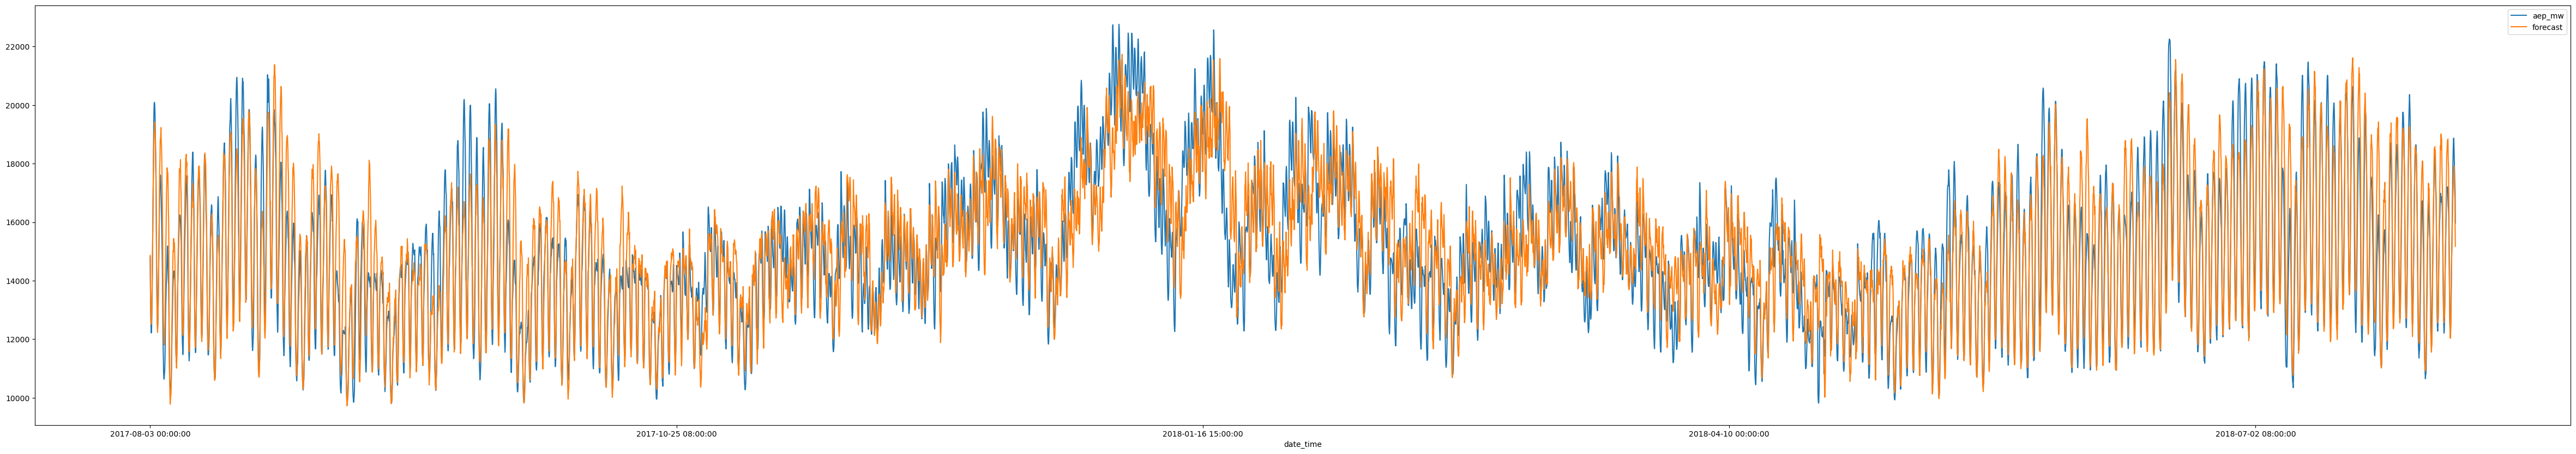

In [35]:
pred_df.plot(figsize=(60,10))